Group 1 project progress

## Question: How does wealth inequality impact crime rates in London’s boroughs?

<p align="center">
    <img src='Images/istockphoto-956966560-612x612.jpg' width="612" height="612">
</p>

# *NOTE TO THE MARKER BEFORE RUNNING*

If running on deepnote, please do not run any code in the pre-processing section / press run notebook. This was ran on a local machine. The tasks cause the deepnote server to crash due to limitations in RAM on the free plan. The code is there to show the work was done. 

**PLEASE** run from the reading and cleaning section. The point to run from is marked. You can run from any block of code onwards by selecting block actions on the right hand side and selecting *Run from this block*


# Project plan

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Setting Research Question", Start='2022-01-31', Finish='2022-02-17'),
    dict(Task="Retreiving Data", Start='2022-01-31', Finish='2022-02-20'),
    dict(Task="Preparing Data", Start='2022-02-07', Finish='2022-02-27'),
    dict(Task="Exploring Data", Start='2022-02-14', Finish='2022-03-06'),
    dict(Task="Modelling Data", Start='2022-02-28', Finish='2022-03-24'),
    dict(Task="Presentation and Automation", Start='2022-03-17', Finish='2022-03-27'),
    dict(Task="Making Final Documents", Start='2022-03-21', Finish='2022-04-03')
])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task",title = "Gantt Chart for Group 1")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

## Pre - Processing Crime Data 
### (1) compile all crime data into 3 files used in integration 'london crime'
Made 3 seperate files to make it more managable due to high memroy of all the crime data. The following code is an example of how the crime data was compiled. By having 3 seperate folders containing the respective crime data of the specified timeframe, this code was run to make the 3 crime datasets.

note: the below code demonstrates how this worked using the 2017 data as an example. 

In [ ]:
import pandas as pd
import numpy as np
import glob 


# get data file names
path =r'/work/Data_Clean_Demo/London 2017'
filenames = glob.glob(path + "/*.csv")
"""takes file names of all csv files in the specified folder path"""


dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
"""loop opens all the files and appends them into a list"""
    
""" Concatenate all data into one DataFrame"""
df = pd.concat(dfs, ignore_index=True)

#df.to_csv(r'/work/Data_Clean_Demo/london_2017.csv', index = False)
"""saves the df as a file in specified file path

use seperate files contain each split of time. 
Then run this code using thoese files as the target to make files compiled
csv files
"""

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
del df

### (2) Creating a crime frequency dataset using all data in the time-frame
The below code demonstrates how the 3 crime datasets were used to create one frequency csv with time series data of the frequency of crime by borough.

In [ ]:
!ls /datasets/london-crime-data



london_2010-2013.csv  london_2014-2016.csv  london_2017-2020.csv


In [ ]:
#df = pd.read_csv('2021-12-metropolitan-street.csv', header = 0)

# get data file names
path =r'/datasets/london-crime-data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    df = pd.read_csv(filename)
    df = df.drop(columns = ['Crime ID','Longitude','Latitude','Falls within', 'LSOA code', 'Last outcome category', 'Context'])
    
    df = df.rename(columns={'Reported by': 'Reported'})
    df = df.drop(df[df.Reported == 'City of London Police'].index)

    df['LSOA name'] = df['LSOA name'].str[:-4]
    df = df.rename(columns={'LSOA name': 'Area'})

    df = df.drop(df[df.Area == 'City of London'].index)
    df['Month'] = df['Month'].str[:4]

    df.drop(df[df.Month == '2010'].index, inplace = True)

    dfs.append(df)
    del df
    
# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

count_crime = df.groupby(['Month', 'Area']).count()

del df
#save memory 

count_crime.drop(count_crime[count_crime.Reported < 1080].index, inplace = True)

#deletes any crimes delt with met outside of london

count_crime = count_crime.reset_index()

#count_crime.drop(count_crime[count_crime.Area == 'City of London '])
#count_crime.drop(count_crime[count_crime.Area == 'City of London'])

#df = pd.DataFrame(zip(count_crime.Month, count_crime.Area, count_crime.Reported))
df = count_crime.filter(['Month', 'Area', 'Reported'], axis = 1)
del count_crime
df = df.rename(columns = {'Month': 'Year', 'Reported': 'Crime Count'})
#rename columns


#df.to_csv('/work/Data_Clean_Demo/crime_count_2011-2020.csv', index = False)

"""
df is saved as a seperate file 

use seperate files contain each split of time. 
Then run this code using thoese files as the target to make files compiled
csv files
"""
df.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (0,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: 

In [ ]:
del df

## Data Cleaning Code for rest of variables 
### (1) Affordable housing suppply 

In [ ]:
!ls /datasets/affordable-housing-supply

dclg-affordable-housing-borough_CLEAN.csv


In [ ]:
df = pd.read_csv('/work/Data_Clean_Demo/dclg-affordable-housing-borough.csv', header = 0)

df.head()

Code                  Area     Year Affordable Housing Supply
0  E09000001        City of London  1991-92                         0
1  E09000002  Barking and Dagenham  1991-92                        53
2  E09000003                Barnet  1991-92                        73
3  E09000004                Bexley  1991-92                       129
4  E09000005                 Brent  1991-92                       423

In [ ]:
#'year' column to only contain first 4 characters, converted to intiger from string
unique_val = pd.unique(df['Year'])
df['Year'] = df['Year'].str[:4]
unique_val = pd.unique(df['Year'])
df['Year'] = df['Year'].astype(int)

#Delete all entrys before 2011 and any areas that are not within the investigated boroghs
df.drop(df[df.Year < 2011].index, inplace = True)

df = df.drop(df[df.Area == 'City of London'].index)
df = df.drop(df[df.Area == 'London'].index)
df = df.drop(df[df.Area == 'England'].index)

#df.to_csv('dclg-affordable-housing-borough_CLEAN.csv', index = False)
df.head()

Code                  Area  Year Affordable Housing Supply
701  E09000002  Barking and Dagenham  2011                       384
702  E09000003                Barnet  2011                       666
703  E09000004                Bexley  2011                       357
704  E09000005                 Brent  2011                       852
705  E09000006               Bromley  2011                       394

### (2) Economic inactivity

The origninal dataset was preprocessed to make serperate files of the economic inactivity data by year. This is because the original file had the years as columns which is not conducive for processing into time series data. So using excel each year was split into seperate csv files.

In [ ]:
# get data file names
path =r'/work/Data_Clean_Demo/Economic inactivity'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

#delete areas not in the invstigated boroughs
df = df.drop(df[df.Area == 'City of London'].index)
df = df.drop(df[df.Area == 'Inner London'].index)
df = df.drop(df[df.Area == 'Outer London'].index)
df = df.drop(df[df.Area == 'North East'].index)
df = df.drop(df[df.Area == 'North West'].index)
df = df.drop(df[df.Area == 'Yorkshire and The Humber'].index)
df = df.drop(df[df.Area == 'East Midlands'].index)
df = df.drop(df[df.Area == 'West Midlands'].index)
df = df.drop(df[df.Area == 'East'].index)
df = df.drop(df[df.Area == 'London'].index)
df = df.drop(df[df.Area == 'South East'].index)
df = df.drop(df[df.Area == 'South West'].index)
df = df.drop(df[df.Area == 'Wales'].index)
df = df.drop(df[df.Area == 'Scotland'].index)
df = df.drop(df[df.Area == 'Northern Ireland'].index)
df = df.drop(df[df.Area == 'England'].index)
df = df.drop(df[df.Area == 'England and Wales'].index)
df = df.drop(df[df.Area == 'Great Britain'].index)
df = df.drop(df[df.Area == 'United Kingdom'].index)


#delete anything before 2011
df.drop(df[df.Year < 2011].index, inplace = True)

#display uniqe values in 'Year' to check if expected years exist
unique_val = pd.unique(df['Year'])
print(unique_val)

# keep certian columns 
df = df.filter(['Area', 'Year', 'Working age', 'Percent'], axis = 1)
df = df.rename(columns={'Working age': 'Working age population'})

#drop any duplicate entrys
df = df.drop_duplicates()

#df.to_csv('economic-inactivity_processed_CLEAN.csv', index = False)

df

[2013 2014 2015 2012 2020 2018 2011 2016 2017 2019]


Area  Year Working age population Percent
52   Barking and Dagenham  2013                121,600    25.3
53                 Barnet  2013                240,000    23.3
54                 Bexley  2013                146,300    20.2
55                  Brent  2013                215,700    24.7
56                Bromley  2013                202,500    19.7
..                    ...   ...                    ...     ...
742                Sutton  2019                131,800    16.5
743         Tower Hamlets  2019                235,600    25.8
744        Waltham Forest  2019                188,900    20.2
745            Wandsworth  2019                235,800    16.1
746           Westminster  2019                172,200    24.9

[320 rows x 4 columns]

### (3) HPI, Average House Price and  House Sales Volume
First all HPI files are concactinated into one df and then cleaned and filtered appropriatly.
note: in this example Sales Volume is not seperated unlike the data in "/work/Data_Clean_Demo/Cleaned Data" as originally Sales Volume was going to be excluded and was later added seperatly.

In [ ]:
#df = pd.read_csv('2021-12-metropolitan-street.csv', header = 0)

# get data file names
path =r'/work/Data_Clean_Demo/HPI'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
    
# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

#all 'City of Westminster' entrys converted to 'Westminster
df.loc[df.Name == 'City of Westminster', 'Name'] = 'Westminster'

#Name column is renamed to 'Area' 
df = df.rename(columns={'Name': 'Area'})
#df.to_csv('HPI_London_Borough_clean.csv', index = False)
df.head()

Area                                                URI  \
0  Havering  http://landregistry.data.gov.uk/id/region/have...   
1  Havering  http://landregistry.data.gov.uk/id/region/have...   
2  Havering  http://landregistry.data.gov.uk/id/region/have...   
3  Havering  http://landregistry.data.gov.uk/id/region/have...   
4  Havering  http://landregistry.data.gov.uk/id/region/have...   

  Region GSS code   Period  Sales volume Reporting period  \
0       E09000016  2011-01         142.0          monthly   
1       E09000016  2011-02         168.0          monthly   
2       E09000016  2011-03         178.0          monthly   
3       E09000016  2011-04         212.0          monthly   
4       E09000016  2011-05         168.0          monthly   

   House price index All property types  Average price All property types  \
0                                 78.50                            217997   
1                                 77.75                            215922   
2                                 77.53                            215325   
3                                 77.81                            216085   
4                                 78.98                            219337   

   Percentage change (monthly) All property types  \
0                                           -1.61   
1                                           -0.95   
2                                           -0.28   
3                                            0.35   
4                                            1.50   

   Percentage change (yearly) All property types  ...  \
0                                           2.40  ...   
1                                          -0.23  ...   
2                                          -0.69  ...   
3                                          -0.80  ...   
4                                           0.36  ...   

   Percentage change (yearly) Semi-detached houses  \
0                                             3.35   
1                                             0.02   
2                                            -0.80   
3                                            -0.92   
4                                             0.49   

   House price index Terraced houses  Average price Terraced houses  \
0                              77.85                         202552   
1                              77.09                         200557   
2                              76.82                         199876   
3                              77.10                         200589   
4                              78.33                         203791   

   Percentage change (monthly) Terraced houses  \
0                                        -1.67   
1                                        -0.98   
2                                        -0.34   
3                                         0.36   
4                                         1.60   

   Percentage change (yearly) Terraced houses  \
0                                        2.01   
1                                       -0.53   
2                                       -1.00   
3                                       -1.11   
4                                        0.02   

   House price index Flats and maisonettes  \
0                                    80.51   
1                                    79.81   
2                                    79.47   
3                                    79.96   
4                                    81.31   

   Average price Flats and maisonettes  \
0                               146499   
1                               145233   
2                               144618   
3                               145505   
4                               147968   

   Percentage change (monthly) Flats and maisonettes  \
0                                              -1.67   
1                                              -0.86   
2                                              -0.42   
3               

In [ ]:
#keep only first 4 characters of each entry in 'perod' 
df['Period'] = df['Period'].str[:4]

#filter to keep important columns
df = df.filter(['Area', 'Period', 'House price index All property types', 'Average price All property types','Sales volume' ], axis = 1)

#rename period column to 'Year'
df = df.rename(columns= {'Period': 'Year'})

#convert all entrys in 'Year' to integer
df['Year'] = df['Year'].astype(int)

#print(df.dtypes)

#delte any entry before 2011 and after 2020
df.drop(df[df.Year < 2011].index, inplace = True)
df.drop(df[df.Year > 2020].index, inplace = True)

print(df.shape)

#group all entrys by year and area as a mean -> keep year and area as columns
df = df.groupby(['Year', 'Area']).mean()
df = df.reset_index()
#print(dfavg)

#filter to keep relevent columns and rename respective columns to 'HPI' and 'Average property price' 
df = df.filter(['Area', 'Year', 'House price index All property types', 'Average price All property types', 'Sales volume'], axis = 1)
df = df.rename(columns= {'House price index All property types': 'HPI', 'Average price All property types': 'Average property price' })
#df.to_csv('HPI_London_clean.csv', index = False)

df.head()

(3840, 5)


Area  Year        HPI  Average property price  Sales volume
0  Barking and Dagenham  2011  74.278333           163465.083333    121.500000
1                Barnet  2011  73.470000           338978.000000    325.666667
2                Bexley  2011  76.665000           200672.083333    212.083333
3                 Brent  2011  70.686667           298964.416667    182.583333
4               Bromley  2011  73.721667           274874.500000    361.250000

### (4) Qualification of working age NVQ
NVQ data is cleaned as followed and sperated into multiple csv files by the type of Qualification (highest one held). This is done so that all each qualificaiton is a column for the later data set that will be made.

In [ ]:
df = pd.read_csv('/work/Data_Clean_Demo/Qualifications-of-working-age-NVQ.csv', header = 0)

#rename respective column to 'Qualifications'
df = df.rename(columns= {'Qualifications of working age population (16-64)': 'Qualifications'})

#check unique values in Qualifications column
unique_val = pd.unique(df['Qualifications'])
print(unique_val)

#remove white space from Qualification 
df.loc[df.Qualifications == ' NVQ4+ ', 'Qualifications'] = 'NVQ4+'
df.loc[df.Qualifications == 'NVQ2 only ', 'Qualifications'] = 'NVQ2 only'

#check if all values in Qualifications are not redundatnt
unique_val = pd.unique(df['Qualifications'])

#delet any entrys not in the investigated area
df = df.drop(df[df.Area == 'City of London'].index)
df = df.drop(df[df.Area == 'Inner London'].index)
df = df.drop(df[df.Area == 'Outer London'].index)
df = df.drop(df[df.Area == 'North East'].index)
df = df.drop(df[df.Area == 'North West'].index)
df = df.drop(df[df.Area == 'Yorkshire and The Humber'].index)
df = df.drop(df[df.Area == 'East Midlands'].index)
df = df.drop(df[df.Area == 'West Midlands'].index)
df = df.drop(df[df.Area == 'East'].index)
df = df.drop(df[df.Area == 'London'].index)
df = df.drop(df[df.Area == 'South East'].index)
df = df.drop(df[df.Area == 'South West'].index)
df = df.drop(df[df.Area == 'Wales'].index)
df = df.drop(df[df.Area == 'Scotland'].index)
df = df.drop(df[df.Area == 'Northern Ireland'].index)
df = df.drop(df[df.Area == 'England'].index)
df = df.drop(df[df.Area == 'England and Wales'].index)
df = df.drop(df[df.Area == 'Great Britain'].index)
df = df.drop(df[df.Area == 'United Kingdom'].index)

df = df.drop(df[df.Qualifications == 'Trade Apprenticeships'].index)
#delete trade apprentiships data because has lots of null values

#Convert year to integer, drop any entry before 2011
df['Year'] = df['Year'].astype(int)
df.drop(df[df.Year < 2011].index, inplace = True)

#rename respective column to 'qualifications'
df = df.rename(columns= {'Qualifications of working age population (16-64)': 'Qualifications'})
unique_val = pd.unique(df['Qualifications'])

#print(df.shape[0]-1)

#rename qualifications to remove insignificant words
df.loc[df.Qualifications == 'NVQ1 only', 'Qualifications'] = 'NVQ1'
df.loc[df.Qualifications == 'NVQ2 only', 'Qualifications'] = 'NVQ2'
df.loc[df.Qualifications == 'NVQ3 only', 'Qualifications'] = 'NVQ3'


unique_val = pd.unique(df['Qualifications'])
#convert year to intieger
df['Year'] = df['Year'].astype(int)


#df.to_csv('Qualifications-of-working-age-NVQ_clean2.csv', index = False)
df.head()


Code                  Area  Year Qualifications   number  \
2416  E09000002  Barking and Dagenham  2011          NVQ4+   31,800   
2417  E09000003                Barnet  2011          NVQ4+  116,400   
2418  E09000004                Bexley  2011          NVQ4+   39,400   
2419  E09000005                 Brent  2011          NVQ4+   65,700   
2420  E09000006               Bromley  2011          NVQ4+   85,600   

     denominator percent confidence  
2416     118,200    26.9        3.6  
2417     230,800    50.4        4.3  
2418     145,000    27.2        3.9  
2419     217,600    30.2        4.3  
2420     197,000    43.5        4.3

In [ ]:
"""Create seperate data frame to only contain 'NVQ4+' entrys"""
dfNVQ = df[(df['Qualifications'] == 'NVQ4+')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent NVQ4+'})
#dfNVQ.to_csv('edu_NVQ4.csv', index = False)
dfNVQ.head()

Code                  Area  Year Qualifications   number  \
2416  E09000002  Barking and Dagenham  2011          NVQ4+   31,800   
2417  E09000003                Barnet  2011          NVQ4+  116,400   
2418  E09000004                Bexley  2011          NVQ4+   39,400   
2419  E09000005                 Brent  2011          NVQ4+   65,700   
2420  E09000006               Bromley  2011          NVQ4+   85,600   

     denominator percent NVQ4+ confidence  
2416     118,200          26.9        3.6  
2417     230,800          50.4        4.3  
2418     145,000          27.2        3.9  
2419     217,600          30.2        4.3  
2420     197,000          43.5        4.3

In [ ]:
"""Create seperate data frame to only contain 'NVQ3' entrys"""
dfNVQ = df[(df['Qualifications'] == 'NVQ3')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent NVQ3'})
#dfNVQ.to_csv('edu_NVQ3.csv', index = False)
dfNVQ.head()

Code                  Area  Year Qualifications  number  \
2465  E09000002  Barking and Dagenham  2011           NVQ3  14,400   
2466  E09000003                Barnet  2011           NVQ3  28,700   
2467  E09000004                Bexley  2011           NVQ3  26,600   
2468  E09000005                 Brent  2011           NVQ3  33,600   
2469  E09000006               Bromley  2011           NVQ3  32,600   

     denominator percent NVQ3 confidence  
2465     118,200         12.2        2.7  
2466     230,800         12.4        2.9  
2467     145,000         18.3        3.4  
2468     217,600         15.4        3.4  
2469     197,000         16.6        3.2

In [ ]:
"""Create seperate data frame to only contain 'NVQ2' entrys"""
dfNVQ = df[(df['Qualifications'] == 'NVQ2')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent NVQ2'})
#dfNVQ.to_csv('edu_NVQ2.csv', index = False)
dfNVQ.head()

Code                  Area  Year Qualifications  number  \
2563  E09000002  Barking and Dagenham  2011           NVQ2  19,700   
2564  E09000003                Barnet  2011           NVQ2  28,600   
2565  E09000004                Bexley  2011           NVQ2  27,100   
2566  E09000005                 Brent  2011           NVQ2  25,500   
2567  E09000006               Bromley  2011           NVQ2  27,900   

     denominator percent NVQ2 confidence  
2563     118,200         16.7          3  
2564     230,800         12.4        2.9  
2565     145,000         18.7        3.4  
2566     217,600         11.7          3  
2567     197,000         14.2          3

In [ ]:
dfNVQ = df[(df['Qualifications'] == 'NVQ1')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent NVQ1'})
#dfNVQ.to_csv('edu_NVQ1.csv', index = False)
dfNVQ.head()

Code                  Area  Year Qualifications  number  \
2612  E09000002  Barking and Dagenham  2011           NVQ1  18,500   
2613  E09000003                Barnet  2011           NVQ1   19100   
2614  E09000004                Bexley  2011           NVQ1  26,100   
2615  E09000005                 Brent  2011           NVQ1  19,400   
2616  E09000006               Bromley  2011           NVQ1  22,200   

     denominator percent NVQ1 confidence  
2612     118,200         15.6        2.9  
2613     230,800          8.3        2.4  
2614     145,000           18        3.3  
2615     217,600          8.9        2.6  
2616     197,000         11.3        2.8

In [ ]:
"""Create seperate data frame to only contain 'other qualifications' entrys"""
dfNVQ = df[(df['Qualifications'] == 'other qualifications')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent other qualifications'})
#dfNVQ.to_csv('edu_other_qualifications.csv', index = False)
dfNVQ.head()

Code                  Area  Year        Qualifications  number  \
2661  E09000002  Barking and Dagenham  2011  other qualifications  13,600   
2662  E09000003                Barnet  2011  other qualifications  21,700   
2663  E09000004                Bexley  2011  other qualifications  10,200   
2664  E09000005                 Brent  2011  other qualifications  45,700   
2665  E09000006               Bromley  2011  other qualifications  10,400   

     denominator percent other qualifications confidence  
2661     118,200                         11.5        2.6  
2662     230,800                          9.4        2.5  
2663     145,000                            7        2.2  
2664     217,600                           21        3.8  
2665     197,000                          5.3        1.9

In [ ]:
"""Create seperate data frame to only contain 'no qualifications' entrys"""
dfNVQ = df[(df['Qualifications'] == 'no qualifications')]
dfNVQ = dfNVQ.rename(columns= {'percent': 'percent no qualifications'})
#dfNVQ.to_csv('edu_no_qualifications.csv', index = False)
dfNVQ.head()

Code                  Area  Year     Qualifications  number  \
2710  E09000002  Barking and Dagenham  2011  no qualifications  16,400   
2711  E09000003                Barnet  2011  no qualifications  14,000   
2712  E09000004                Bexley  2011  no qualifications  12,500   
2713  E09000005                 Brent  2011  no qualifications  24,400   
2714  E09000006               Bromley  2011  no qualifications  14,700   

     denominator percent no qualifications confidence  
2710     118,200                      13.9        2.8  
2711     230,800                       6.1        2.1  
2712     145,000                       8.6        2.4  
2713     217,600                      11.2        2.9  
2714     197,000                       7.5        2.3

### (5) Population data

Data was cleaned in excel by Joe. Only cleaning required was to delete unnecessary columns/rows to fit the time period information that we needed. 

In [ ]:
df = pd.read_csv('/work/Data_Clean_Demo/Population_data_2011-2020.csv', header = 0)

#drop any entry in 'borough' that is 'London (total), then filter useful columns
df.drop(df[df.borough == 'London (total)'].index, inplace = True)
df = df.filter(['borough', 'year', 'population'], axis = 1)

#df.to_csv('Population_data_2011-2020_CLEAN.csv', index = False)

df.head()


borough  year  population
1  Barking and Dagenham  2011      187029
2                Barnet  2011      357538
3                Bexley  2011      232774
4                 Brent  2011      312245
5               Bromley  2011      310554

## Creating Compilation of time series table for every variable by borough
All the cleaned data was pre processed on excel where a uniqe id was provided for every unique combination of Year and Borough. Across all datasets the ID and corresponding year and borough are the same. 
<br /> *All the pre processed data is in >Data_Clean_Demo > Cleaned Data

In [ ]:
"""
'id' is made for every unique combinatio of year and borough for every cleaned 
dataset on excel
"""
df = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/crime_count_2011-2020.csv')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/dclg-affordable-housing-borough_CLEAN.csv', header = 0)
df2 = df2.filter(['id','Affordable Housing Supply'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/economic-inactivity_processed_CLEAN.csv', header = 0)
df2 = df2.filter(['id','Working age population', 'Percent'], axis = 1)
df2 = df2.rename(columns = {'Percent': 'Percent Economically Inactive'})
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_no_qualifications.csv', header = 0)
df2 = df2.filter(['id','percent no qualifications'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_NVQ1.csv', header = 0)
df2 = df2.filter(['id','percent NVQ1'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_NVQ2.csv', header = 0)
df2 = df2.filter(['id','percent NVQ2'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_NVQ3.csv', header = 0)
df2 = df2.filter(['id','percent NVQ3'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_NVQ4.csv', header = 0)
df2 = df2.filter(['id','percent NVQ4+'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/edu_other_qualifications.csv', header = 0)
df2 = df2.filter(['id','percent other qualifications'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/House_sales_vol_London_clean.csv', header = 0)
df2 = df2.filter(['id','House sales volume'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/HPI_London_clean.csv', header = 0)
df2 = df2.filter(['id','HPI', 'Average property price'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/Population_data_2011-2020_CLEAN.csv', header = 0)
df2 = df2.filter(['id','population'], axis = 1)
df = pd.merge(df,df2,on='id')

df2 = pd.read_csv('/work/Data_Clean_Demo/Cleaned Data/WeeklyIncome.csv', header = 0)
df2 = df2.filter(['id','Average Weekly Income'], axis = 1)
df = pd.merge(df,df2,on='id')

df = df.drop(['id'], axis = 1)
#drop id column from dataframe

#df.to_csv('All_Data_2011-2020.csv', index = False)
df

Year                   Area  Crime Count Affordable Housing Supply  \
0    2011  Barking and Dagenham         28875                       384   
1    2011                Barnet         40123                       666   
2    2011                Bexley         20026                       357   
3    2011                 Brent         45232                       852   
4    2011               Bromley         33747                       394   
..    ...                    ...          ...                       ...   
315  2020                Sutton         19113                        97   
316  2020         Tower Hamlets         55021                       804   
317  2020        Waltham Forest         36330                       529   
318  2020            Wandsworth         37494                       423   
319  2020           Westminster         65660                       296   

    Working age population  Percent Economically Inactive  \
0                   119100                           28.6   
1                   234200                           24.7   
2                   146100                           23.2   
3                   218900                           30.8   
4                   199100                           21.9   
..                     ...                            ...   
315                132,400                           17.4   
316                236,200                           21.1   
317                190,000                           20.4   
318                238,200                           12.8   
319                171,500                           23.4   

     percent no qualifications  percent NVQ1  percent NVQ2  percent NVQ3  \
0                         13.9          15.6          16.7          12.2   
1                          6.1           8.3          12.4          12.4   
2                          8.6          18.0          18.7          18.3   
3                         11.2           8.9          11.7          15.4   
4                          7.5          11.3          14.2          16.6   
..                         ...           ...           ...           ...   
315                        6.3           6.2          11.7          14.0   
316                        8.9           5.4           5.3          11.0   
317                        4.5           9.0          11.2          12.9   
318                        2.6           3.1           6.7           9.4   
319                        4.8           2.2           2.6          13.6   

     percent NVQ4+  percent other qualifications  House sales volume  \
0             26.9                          11.5                5832   
1             50.4                           9.4               15632   
2             27.2                           7.0               10180   
3             30.2                          21.0                8764   
4             43.5                           5.3               17340   
..             ...                           ...                 ...   
315           54.9                           5.1                9180   
316           61.8                           7.6               11600   
317           56.9                           4.8                9096   
318           72.6                           5.6               16540   
319           65.3                          11.3                7212   

            HPI  Average property price  population  Average Weekly Income  
0     74.278333             163465.0833      187029                  452.1  
1     73.470000             338978.0000      357538                  498.3  
2     76.665000             200672.0833      232774                  505.1  
3     70.686667             298964.4167      312245                  414.9  
4     73.721667             274874.5000      310554                  551.7  
..          ...                     ...         ...                    ...  
315  123.152500             378749.0000      207707   

**RUN FROM THIS BLOCK** (ctrl + p "run from this block")
# Reading and cleaning the data

First we install and import some required packages

In [ ]:
import pandas as pd
import os, os.path

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


import gc #garbage collecting

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!ls /datasets/noncrime

All_Data_2011-2020.csv


We start by reading the data and having a look at it. First we look at the non-crime related dataset that was compiled by Erik. This is connected through deepnote integrations.

In [ ]:
non_crime_df = pd.read_csv('/datasets/noncrime/All_Data_2011-2020.csv',thousands=',')  # read the csv containing non crime data, use thousands = ',' so it reads values such as "1,000" as int(1000)
non_crime_df = non_crime_df[non_crime_df['Year'] != 2010] # remove some of the years we don't need
non_crime_df = non_crime_df[non_crime_df['Year'] != 2011]
non_crime_df = non_crime_df[non_crime_df['Year'] != 2012]
non_crime_df = non_crime_df[non_crime_df['Year'] != 2013]

In [ ]:
non_crime_df # take a look at the data to check it looks correct

Year                   Area  Crime Count  Affordable Housing Supply  \
96   2014  Barking and Dagenham         21039                       1200   
97   2014                Barnet         31944                        441   
98   2014                Bexley         16783                        387   
99   2014                 Brent         34034                       1316   
100  2014               Bromley         26088                        209   
..    ...                    ...          ...                        ...   
315  2020                Sutton         19113                         97   
316  2020         Tower Hamlets         55021                        804   
317  2020        Waltham Forest         36330                        529   
318  2020            Wandsworth         37494                        423   
319  2020           Westminster         65660                        296   

     Working age population  Percent Economically Inactive  \
96                   125000                           28.1   
97                   242400                           26.1   
98                   150100                           20.2   
99                   214700                           26.5   
100                  202700                           20.6   
..                      ...                            ...   
315                  132400                           17.4   
316                  236200                           21.1   
317                  190000                           20.4   
318                  238200                           12.8   
319                  171500                           23.4   

     percent no qualifications  percent NVQ1  percent NVQ2  percent NVQ3  \
96                        15.5          12.7          14.7          11.4   
97                         7.0           8.0          12.6          16.4   
98                         5.9          14.0          22.0          17.8   
99                         7.8           7.0          11.8          14.4   
100                        3.7          10.7          15.1          16.8   
..                         ...           ...           ...           ...   
315                        6.3           6.2          11.7          14.0   
316                        8.9           5.4           5.3          11.0   
317                        4.5           9.0          11.2          12.9   
318                        2.6           3.1           6.7           9.4   
319                        4.8           2.2           2.6          13.6   

     percent NVQ4+  percent other qualifications  House sales volume  \
96            29.5                          14.1                9036   
97            43.7                          10.9               20232   
98            33.2                           4.0               15776   
99            45.9                          12.3               11936   
100           46.1                           5.6               24676   
..             ...                           ...                 ...   
315           54.9                           5.1                9180   
316           61.8                           7.6               11600   
317           56.9                           4.8                9096   
318           72.6                           5.6               16540   
319           65.3                          11.3                7212   

            HPI  Average property price  population  Average Weekly Income  
96    91.412500             201172.2500      198650                  422.5  
97    93.277500             430363.3333      373745                  479.1  
98    93.393333             244459.5833      240016                  512.6  
99    93.318333             394687.4167      320101                  441.8  
100   93.295833             347857.3333      321602                  578.5  
..          ...                     ...         ...                    ...  
315  123.152500             37

We quickly check that there are the correct number of boroughs and years:

In [ ]:
print(non_crime_df["Area"].unique()) # print unique areas
print(len(non_crime_df["Area"].unique())) 

['Barking and Dagenham ' 'Barnet ' 'Bexley ' 'Brent ' 'Bromley ' 'Camden '
 'Croydon ' 'Ealing ' 'Enfield ' 'Greenwich ' 'Hackney '
 'Hammersmith and Fulham ' 'Haringey ' 'Harrow ' 'Havering ' 'Hillingdon '
 'Hounslow ' 'Islington ' 'Kensington and Chelsea '
 'Kingston upon Thames ' 'Lambeth ' 'Lewisham ' 'Merton ' 'Newham '
 'Redbridge ' 'Richmond upon Thames ' 'Southwark ' 'Sutton '
 'Tower Hamlets ' 'Waltham Forest ' 'Wandsworth ' 'Westminster ']
32


In [ ]:
print(non_crime_df["Year"].unique())

[2014 2015 2016 2017 2018 2019 2020]


Looks correct.

The attributes in the dataset are as follows:

In [ ]:
list(non_crime_df.columns)

['Year',
 'Area',
 'Crime Count',
 'Affordable Housing Supply',
 'Working age population',
 'Percent Economically Inactive',
 'percent no qualifications',
 'percent NVQ1',
 'percent NVQ2',
 'percent NVQ3',
 'percent NVQ4+',
 'percent other qualifications',
 'House sales volume',
 'HPI',
 'Average property price',
 'population',
 'Average Weekly Income']

The crime dataset is much larger. It contains the record of every crime in London in the time period we are looking at. We read in only 4 columns that are necersary to the investigation in order to save memory.

In [ ]:
crime_df = pd.read_csv('BigPoliceDF.csv',usecols=['Year','Month','borough','Crime type']) # read the crime dataset, only read required columns to save memory

In [ ]:
crime_df # take a look

Month                               Crime type         borough  \
0         2010-12                            Vehicle crime          Camden   
1         2010-12  Anit-social behaviour and public orders          Camden   
2         2010-12  Anit-social behaviour and public orders          Camden   
3         2010-12  Anit-social behaviour and public orders  City of London   
4         2010-12                Violent and sexual crimes  City of London   
...           ...                                      ...             ...   
10340364  2020-12                Violent and sexual crimes             NaN   
10340365  2020-12                Violent and sexual crimes             NaN   
10340366  2020-12                Violent and sexual crimes             NaN   
10340367  2020-12                Violent and sexual crimes             NaN   
10340368  2020-12                Violent and sexual crimes             NaN   

          Year  
0         2010  
1         2010  
2         2010  
3         2010  
4         2010  
...        ...  
10340364  2020  
10340365  2020  
10340366  2020  
10340367  2020  
10340368  2020  

[10340369 rows x 4 columns]

We are removing the years 2010-2013 due to inconstistencies in the wat crime was recorded. This is discussed in detail in the report

In [ ]:
crime_df = crime_df[crime_df['Year'] != 2010] 
crime_df = crime_df[crime_df['Year'] != 2011]
crime_df = crime_df[crime_df['Year'] != 2012]
crime_df = crime_df[crime_df['Year'] != 2013]

# rename one of the values in the dataframe to ammend a spelling mistake
crime_df.loc[crime_df["Crime type"] == 'Anit-social behaviour and public orders', "Crime type"] = 'Anti-social behaviour and public orders'


In [ ]:
crime_df["Month"].unique() # view unique months

array(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', 

The crime types that can be observed are as follows:

In [ ]:
crime_df["Crime type"].unique()

array(['All theft types', 'Vehicle crime',
       'Anti-social behaviour and public orders',
       'Criminal damage and arson', 'Drugs', 'Violent and sexual crimes'],
      dtype=object)

Since the data comes from the metropolitan police, the dataset contains arrest made by the force both within and outside London. 

In [ ]:
print(crime_df["borough"].unique())

['Camden' 'City of London' 'Islington' 'Tower Hamlets' 'Westminster' nan
 'Ashford' 'Barking and Dagenham' 'Barnet' 'Bedford' 'Bexley'
 'Bracknell Forest' 'Bradford' 'Brent' 'Broadland' 'Bromley' 'Broxbourne'
 'Calderdale' 'Castle Point' 'Central Bedfordshire' 'Croydon' 'Ealing'
 'Elmbridge' 'Enfield' 'Epping Forest' 'Epsom and Ewell' 'Gravesham'
 'Greenwich' 'Hackney' 'Hammersmith and Fulham' 'Haringey' 'Harrow'
 'Havering' 'Hertsmere' 'Hillingdon' 'Hounslow' 'Kensington and Chelsea'
 'Kingston upon Thames' 'Lambeth' 'Leeds' 'Leicester' 'Lewisham'
 'Liverpool' 'Merton' 'Milton Keynes' 'Newham' 'Northampton' 'Redbridge'
 'Reigate and Banstead' 'Richmond upon Thames' 'Rugby' 'Shepway'
 'Southampton' 'South Bucks' 'Southend-on-Sea' 'Southwark' 'Spelthorne'
 'Sutton' 'Thanet' 'Three Rivers' 'Thurrock' 'Waltham Forest' 'Wandsworth'
 'Watford' 'Winchester' 'Wokingham' 'York' 'Aylesbury Vale' 'Basildon'
 'Bournemouth' 'Braintree' 'Bristol' 'County Durham' 'Coventry' 'Crawley'
 'East Northamp

To fix this, I filtered out every area that was not part of a list of London's boroughs.

In [ ]:
boroughs_list= ['Barking and Dagenham',
'Barnet',
'Bexley',
'Brent',
'Bromley',
'Camden',
'Croydon',
'Ealing',
'Enfield',
'Greenwich',
'Hackney',
'Hammersmith and Fulham',
'Haringey',
'Harrow',
'Havering',
'Hillingdon',
'Hounslow',
'Islington',
'Kensington and Chelsea',
'Kingston upon Thames',
'Lambeth',
'Lewisham',
'Merton',
'Newham',
'Redbridge',
'Richmond upon Thames',
'Southwark',
'Sutton',
'Tower Hamlets',
'Waltham Forest',
'Wandsworth',
'Westminster']
print(len(boroughs_list))

# crime_df is now only equal to any rows where the borough is in my boroughg list
crime_df = crime_df[crime_df['borough'].isin(boroughs_list)]


32


In [ ]:
print("Original:")
print(crime_df.isnull().sum())

crime_df.dropna(inplace=True)  # remove rows with null values

print("\nCleaned:")
print(crime_df.isnull().sum()) 

Original:
Month         0
Crime type    0
borough       0
Year          0
dtype: int64

Cleaned:
Month         0
Crime type    0
borough       0
Year          0
dtype: int64


In [ ]:
crime_df.to_csv("crime_df.csv") # save for use in the dashboard later

# Exploratory analysis

## Time series 

We first started our analysis by looking at how our data changes over time. To do this we have plotted the monthly crime total in London between the years 2011 and 2020. In addition, we also smoothed the data using a 4 month rolling average.

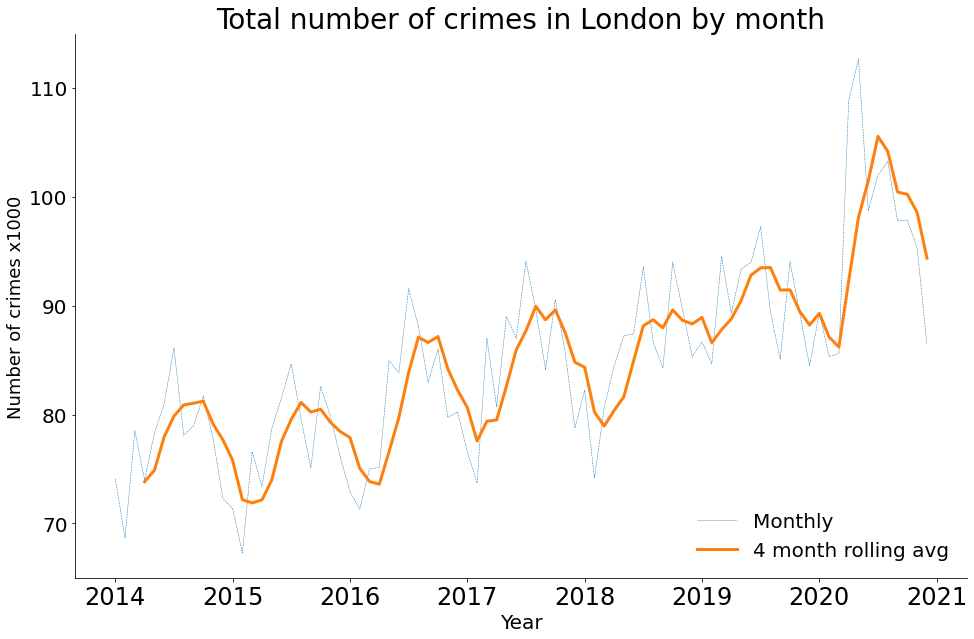

In [ ]:
crime_type = crime_df
'''
The next section groups the crimes together by month and counts how many are in each group

We then have a data frame of every months crime total

Then the crime count is converted to thousands of crimes

And a rolling average is calculated
'''

monthly = crime_type.groupby('Month') # group the dataframe by the month
monthly = monthly.count() # create the values as count
monthly = monthly.reset_index() # reset the index

monthly['countx10^3'] = monthly["Crime type"] / 1000
monthly['rolling average'] = monthly['countx10^3'].rolling(4).mean() # .rolling(4).mean() is the pandas method for creating a 4 month rolling average


'''
A plot of the crime counts and rolling average are created using Seaborn
'''

sns.lineplot(data=monthly, x='Month', y='countx10^3',linewidth = 0.5,linestyle='--')
g = sns.lineplot(data=monthly, x='Month', y='rolling average',linewidth = 3)

# set the title using .format so that the title changes depending on variable
plt.title("Total number of crimes in London by month",fontsize = 28)

# set the tlabel using .format so that the label changes depending on variable
plt.ylabel('Number of crimes x1000', fontsize = 18)
plt.xlabel('Year',fontsize = 20)

'''
Here we set custom tickmarks

Creates a numpy array using arange, between 0 and 96 with a step of 12

We choose this range because there are 8 years with 12 months  = 96 steps, but we want to add ticks every 12th value

We create an array containing strings of the years
'''
x_pos = np.arange(0,96,12)
x_val = ['2014','2015','2016','2017','2018','2019','2020','2021']
plt.xticks(x_pos, x_val, fontsize=24) # manually set ticks
plt.yticks(fontsize=20) 

fig = plt.gcf()
fig.set_size_inches(16, 10) # set the size of the figure


# add a legend with custom labels
g.legend(loc='lower right',labels=["Monthly","4 month rolling avg"],fontsize=20,frameon=False)


g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False) # remove some spines to clean up the look


plt.savefig('ReportImages/TimeSeries=TotalCrime.png',bbox_inches='tight') # for saving purposes
plt.show()

In [ ]:
monthly.tail()

Month  Crime type  borough    Year  countx10^3  rolling average
79  2020-08      103234   103234  103234     103.234        104.13350
80  2020-09       97775    97775   97775      97.775        100.41850
81  2020-10       97850    97850   97850      97.850        100.20675
82  2020-11       95282    95282   95282      95.282         98.53525
83  2020-12       86499    86499   86499      86.499         94.35150


The plot shows that there was a significant reduction in crime in London following 2011 and 2012. Beyond these years, there was a gentle increase in the average number of monthly crime. The year 2020 saw a spike in total crimes per month. Our first thought was that this was caused by the COVID-19 pandemic so we investigated the breakdown by crime type.

Below are the plots for all crime except for theft, and then for all theft (we have defined theft as any crime that involves the stealing of ones possesions. For example, burglary, shoplifting, theft from the person):

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)

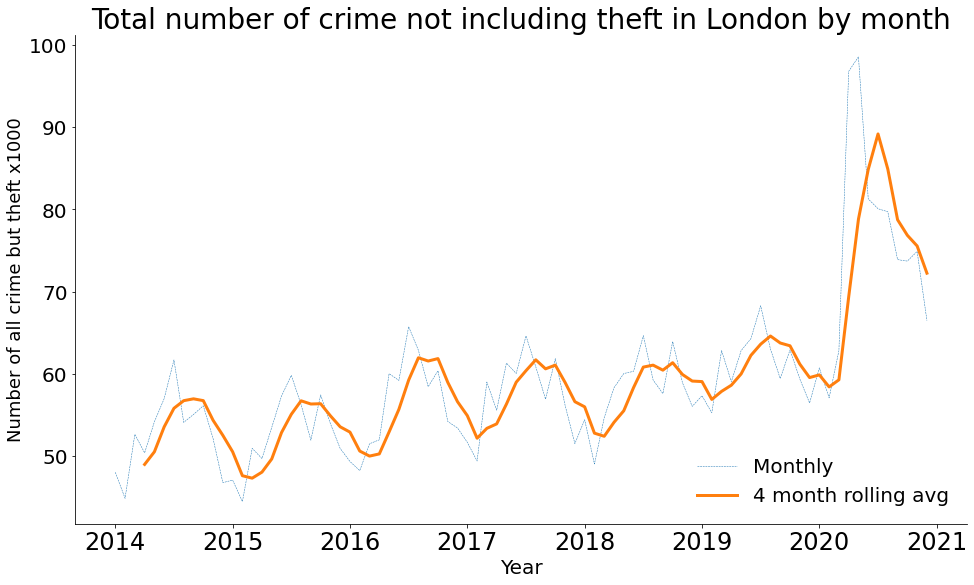

In [ ]:
# select all crime except for theft
crime_type = crime_df[crime_df['Crime type'] !=  "All theft types"]

# below is a repeat of previous code, only the titles and labels are changed
monthly = crime_type.groupby('Month')
monthly = monthly.count()
monthly = monthly.reset_index()

monthly['countx10^3'] = monthly["Crime type"] / 1000
monthly['rolling average'] = monthly['countx10^3'].rolling(4).mean()

sns.lineplot(data=monthly, x='Month', y='countx10^3',linewidth = 0.5,linestyle='--')
g = sns.lineplot(data=monthly, x='Month', y='rolling average',linewidth = 3)


plt.title("Total number of crime not including theft in London by month",fontsize = 28)

plt.ylabel('Number of all crime but theft x1000', fontsize = 18)
plt.xlabel('Year',fontsize = 20)

x_pos = np.arange(0,96,12)
x_val = ['2014','2015','2016','2017','2018','2019','2020','2021']
plt.xticks(x_pos, x_val, fontsize=24)

plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (16,9)

g.legend(loc='lower right',labels=["Monthly","4 month rolling avg"],fontsize=20,frameon=False)


g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)


plt.savefig('ReportImages/TimeSeries=TotalNotTheft.png',bbox_inches='tight')
plt.show()

In [ ]:
monthly.head()

Month  Crime type  borough   Year  countx10^3  rolling average
0  2014-01       48032    48032  48032      48.032              NaN
1  2014-02       44866    44866  44866      44.866              NaN
2  2014-03       52651    52651  52651      52.651              NaN
3  2014-04       50396    50396  50396      50.396         48.98625
4  2014-05       54173    54173  54173      54.173         50.52150

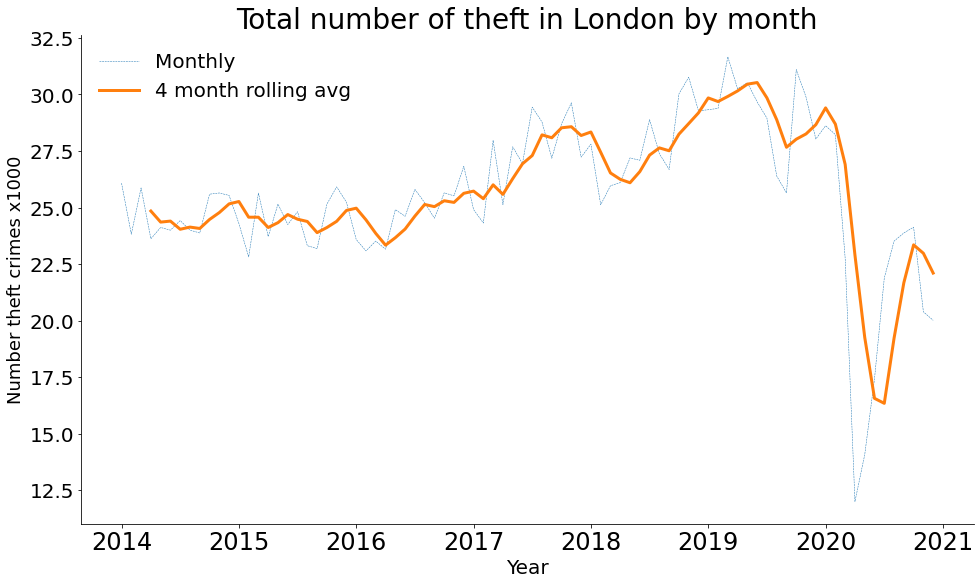

In [ ]:
# select all theft
crime_type = crime_df[crime_df['Crime type'] ==  "All theft types"]

# below is a repeat of previous code, only the titles and labels are changed
monthly = crime_type.groupby('Month')
monthly = monthly.count()
monthly = monthly.reset_index()

monthly['countx10^3'] = monthly["Crime type"] / 1000
monthly['rolling average'] = monthly['countx10^3'].rolling(4).mean()

sns.lineplot(data=monthly, x='Month', y='countx10^3',linewidth = 0.5,linestyle='--')
g = sns.lineplot(data=monthly, x='Month', y='rolling average',linewidth = 3)


plt.title("Total number of theft in London by month",fontsize = 28)


plt.ylabel('Number theft crimes x1000', fontsize = 18)
plt.xlabel('Year',fontsize = 20)

x_pos = np.arange(0,96,12)
x_val = ['2014','2015','2016','2017','2018','2019','2020','2021']
plt.xticks(x_pos, x_val, fontsize=24)

plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (16,9)

g.legend(loc='upper left',labels=["Monthly","4 month rolling avg"],fontsize=20,frameon=False)


g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)


plt.savefig('ReportImages/TimeSeries=TotalOnlyTheft.png',bbox_inches='tight')
plt.show()

In [ ]:
monthly.head()

Month  Crime type  borough   Year  countx10^3  rolling average
0  2014-01       26077    26077  26077      26.077              NaN
1  2014-02       23819    23819  23819      23.819              NaN
2  2014-03       25866    25866  25866      25.866              NaN
3  2014-04       23615    23615  23615      23.615         24.84425
4  2014-05       24117    24117  24117      24.117         24.35425

The resulting time series show quite clearly that theft related crimes were significantly reduced in 2020, while other crimes peaked to the highest point since 2011. (Our suspisicions of 2011 having very high crime rates is due to the 2011 riots across the UK- https://eprints.lse.ac.uk/46297/1/Reading%20the%20riots%28published%29.pdf )


The BBC's investigation into the crime rates during the pandemic is so far alligned with our work (https://www.bbc.co.uk/news/56463680). 

The time series shows clearly that there was a signicficant increase in drug offences in London during 2020. This provides a good sanity check for our data. The parralels between our work and the BBC's give us a good indication that our data is correct.

BBC investigation shows that stop and search rates plummeted in the mid 2010s, which could explain why there is a large decrease in crime on our plots

<p align="center">
    <img src='Images/_117725627_stop_and_search_london-nc.png' width="612" height="612">
</p>

#### Visulisation of Stop and Search data
Data only from April 2015 is avaliable for the Met police force.


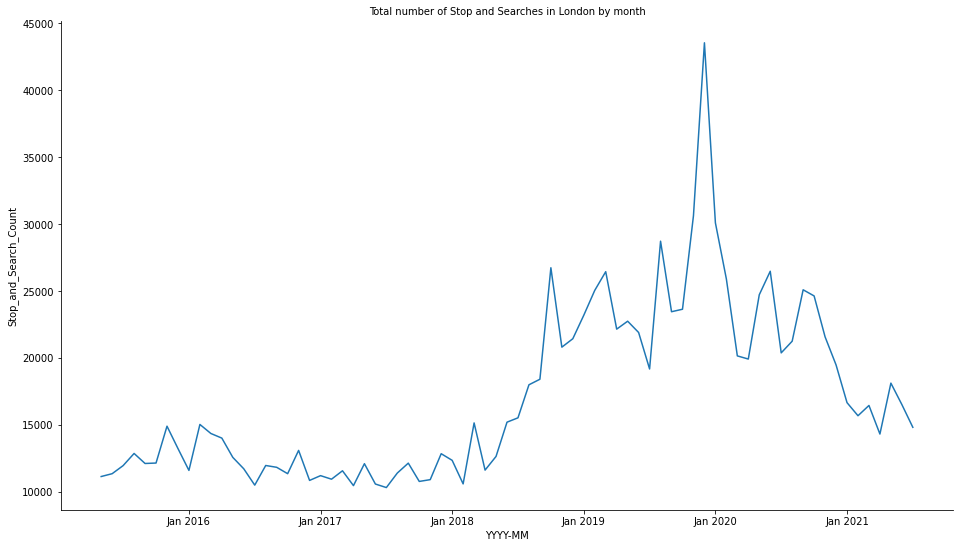

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

data = pd.read_csv('/datasets/stopandsearch/Stop_and_Search_Frequency.csv', header = 0)
sns.lineplot(data=data,x='YYYY-MM', y='Stop_and_Search_Count')
plt.title("Total number of Stop and Searches in London by month",fontsize = 10)
#plt.xscale('log')
#plt.yscale('log')

x_pos = np.arange(8,75,12)
x_val = ['Jan 2016','Jan 2017','Jan 2018','Jan 2019','Jan 2020','Jan 2021']
plt.xticks(x_pos, x_val, fontsize=10)

sns.despine()
plt.savefig('ReportImages/S&S=Total.png',bbox_inches='tight')
plt.show()

When grouped by age there is a simultanious drop  which indicate that for that particular month age groups wern't recorded.

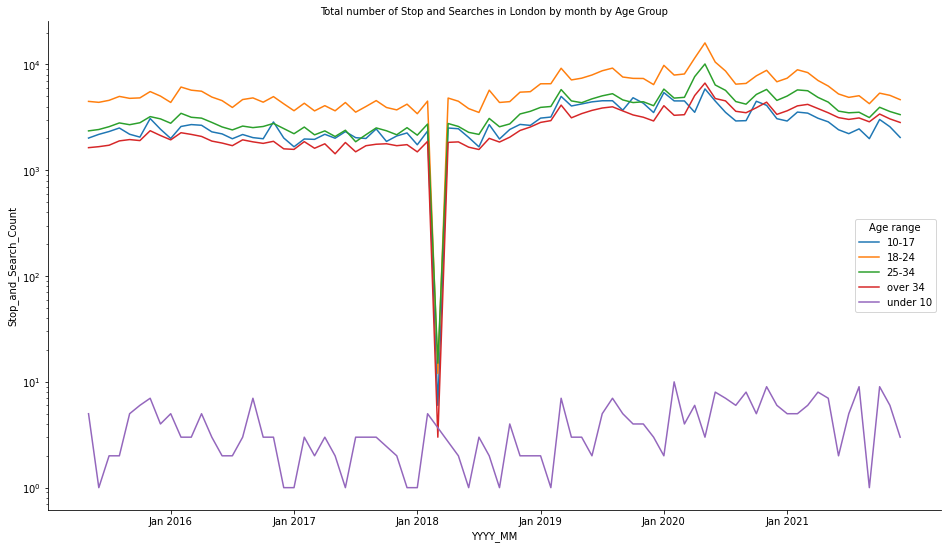

In [ ]:
data = pd.read_csv('/datasets/stopandsearch/Stop_and_Search_byAGE.csv', header = 0)
sns.lineplot(data=data,x='YYYY_MM', y='Stop_and_Search_Count', hue= 'Age range')
#plt.xscale('log')
plt.title("Total number of Stop and Searches in London by month by Age Group",fontsize = 10)
plt.yscale('log')
x_pos = np.arange(8,75,12)
x_val = ['Jan 2016','Jan 2017','Jan 2018','Jan 2019','Jan 2020','Jan 2021']
plt.xticks(x_pos, x_val, fontsize=10)

sns.despine()
plt.savefig('ReportImages/S&S=TotalByAge.png',bbox_inches='tight')
plt.show()

Grouped by Legislation, Fierarm seraches are stagnent over time, police criminal evidence and misuse of drugs act follow same trend as overall results. Noted that stop and searchs for drugs are the most frequent reason for a stop and search.

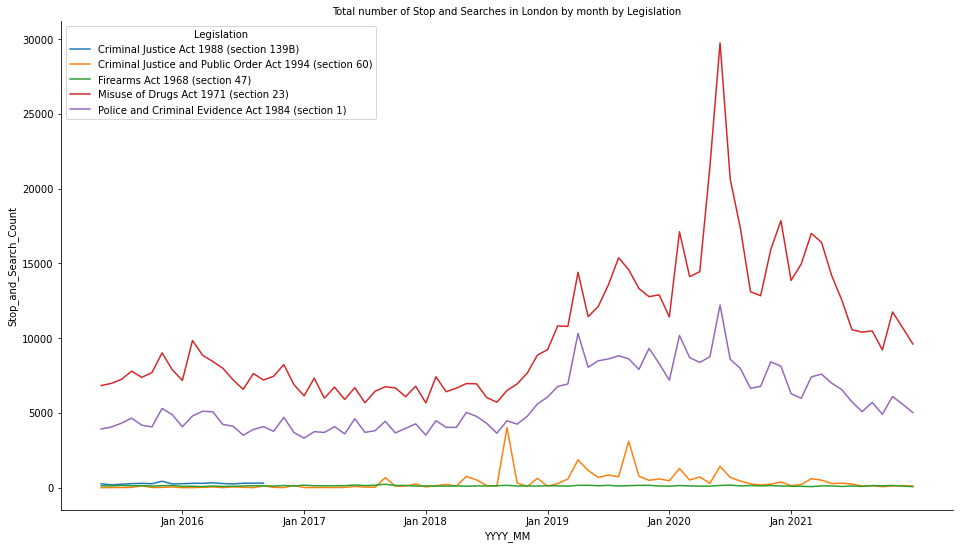

In [ ]:
data = pd.read_csv('/datasets/stopandsearch/Stop_and_Search_byLEGISLATION.csv', header = 0)
sns.lineplot(data=data,x='YYYY_MM', y='Stop_and_Search_Count', hue= 'Legislation')
plt.title("Total number of Stop and Searches in London by month by Legislation",fontsize = 10)
#plt.xscale('log')
#plt.yscale('log')

x_pos = np.arange(8,75,12)
x_val = ['Jan 2016','Jan 2017','Jan 2018','Jan 2019','Jan 2020','Jan 2021']
plt.xticks(x_pos, x_val, fontsize=10)

sns.despine()
plt.savefig('ReportImages/S&S=TotalByLegislation.png',bbox_inches='tight')
plt.show()

Grouped by Search Type shows that each group is characteristic of the overall trend

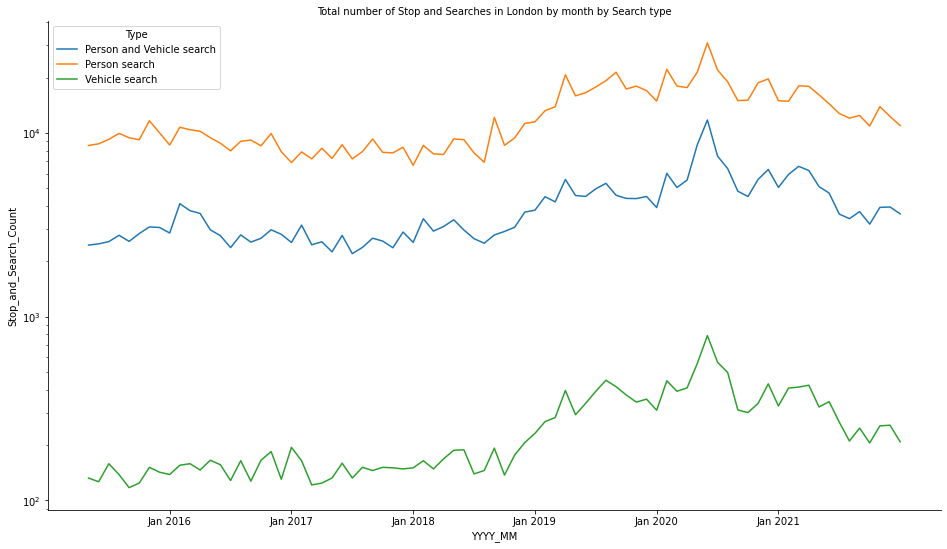

In [ ]:
data = pd.read_csv('/datasets/stopandsearch/Stop_and_Search_bySearchType.csv', header = 0)
sns.lineplot(data=data,x='YYYY_MM', y='Stop_and_Search_Count', hue= 'Type')
#plt.xscale('log')
plt.title("Total number of Stop and Searches in London by month by Search type",fontsize = 10)

x_pos = np.arange(8,75,12)
x_val = ['Jan 2016','Jan 2017','Jan 2018','Jan 2019','Jan 2020','Jan 2021']
plt.xticks(x_pos, x_val, fontsize=10)

plt.yscale('log')
sns.despine()
plt.savefig('ReportImages/S&S=TotalByType.png',bbox_inches='tight')
plt.show()

#### Stop and Search across london and its relation to Crime

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
#create 2 data frames, one with stop and serach data and the other with all crime data
dfsas = pd.read_csv('/datasets/stopandsearch/Stop_and_Search_Frequency.csv', header = 0)
dfall = pd.read_csv('/datasets/noncrime/All_Data_2011-2020.csv', header = 0)

#year column is first 4 characters of 'YYYY-MM' column,
dfsas['Year'] = dfsas['YYYY-MM'].str[:4]
#convert all values to be numeric
dfsas['Year'] = pd.to_numeric(dfsas['Year'])

#group by Year as sums, set year as a feild
dfsas = dfsas.groupby(['Year']).sum()
dfsas = dfsas.reset_index()


#print('\n',dfall.shape)
#group by Year as sums, set year as a feild, filter for spesific 
dfall = dfall.groupby(['Year']).sum()
#print(dfall.shape)
dfall = dfall.reset_index()
dfall = dfall.filter(['Year', 'Crime Count', 'population'])

#merge all data frames inner join by year
df = pd.merge(dfall, dfsas, on = 'Year')

#create pp attribute for per person by dividing by population
df['Crime Count pp']= df['Crime Count']/df['population']
df['Stop and Search pp'] = df['Stop_and_Search_Count']/df['population']

There is a trend between stop and searches and crime over time with anomaly in 2017

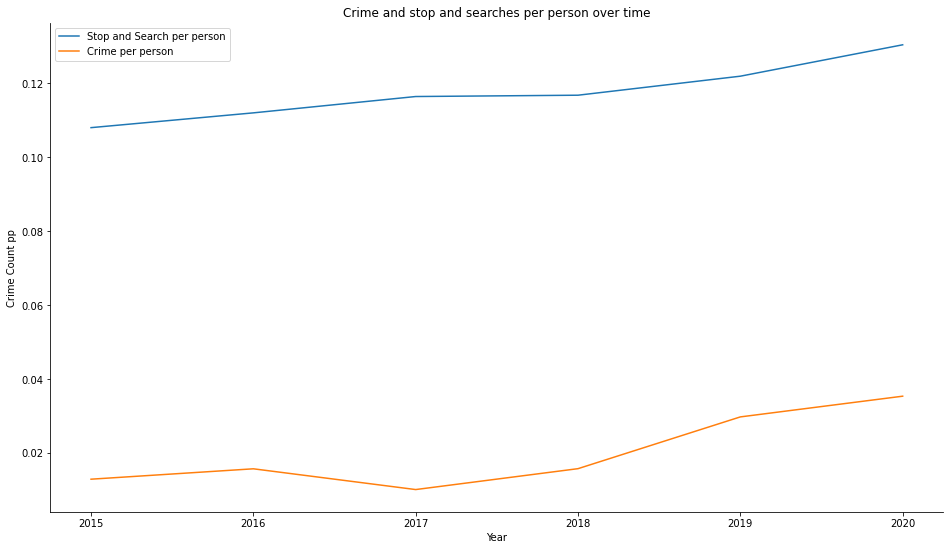

In [ ]:
#plot line plot
sns.lineplot(data=df,x='Year', y='Crime Count pp').set(title='Crime and stop and searches per person over time')
sns.lineplot(data=df,x='Year', y='Stop and Search pp')
sns.despine()
#plt.legend(labels=["Stop and Search per person","Crime per person"], title = "Title_Legend")
plt.legend(labels=["Stop and Search per person","Crime per person"])

plt.savefig('ReportImages/S&S=Crime+S&SoverTime.png',bbox_inches='tight')
plt.show()

When stop and search and crime per person is plotted as a scatter there is a clear trend showing that more stop an searches are related to more crime. However, there isnt enough data for this to present for a model only for insight.

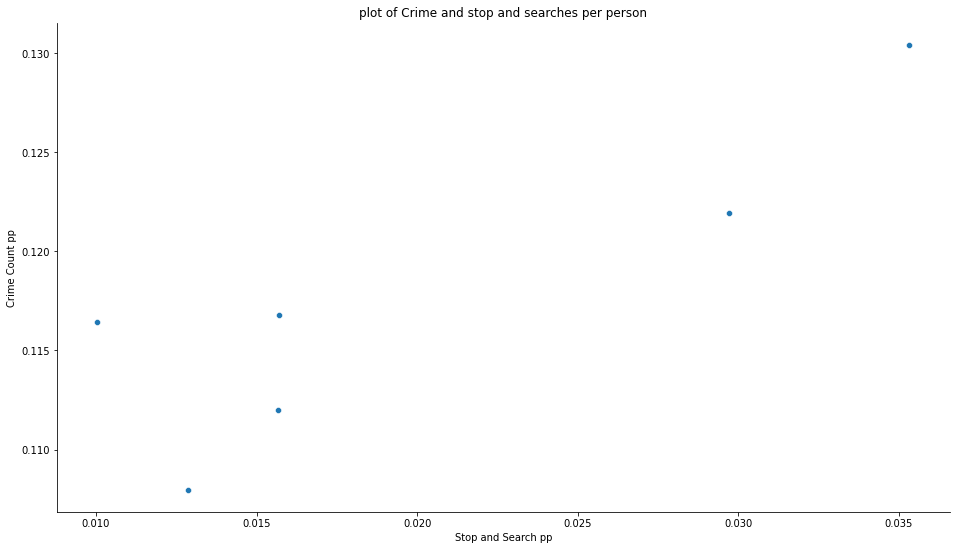

In [ ]:
#plot scatter plot
sns.scatterplot(data = df, x = 'Stop and Search pp', y = 'Crime Count pp').set(title='plot of Crime and stop and searches per person')
#sns.scatterplot(data = df, x = 'Stop_and_Search_Count', y = 'Crime Count').set(title='plot of Crime and stop and searches per person')

sns.despine()
#plt.legend(labels=["Stop and Search per person","Crime per person"], title = "Title_Legend")

plt.savefig('ReportImages/S&S=CrimeAgainstS&S.png',bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Mean squared error: 1.2679429045872377e-05


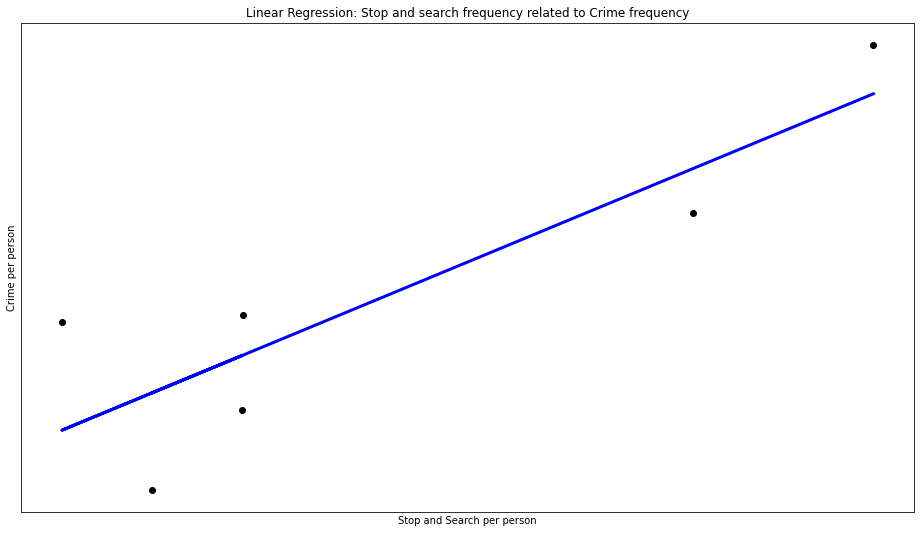

In [ ]:
#create numpy array X_t, y_t from columns 'Stop and Search pp', 'Crime Count pp'
X_t = df['Stop and Search pp'].to_numpy()
#X = X.reshape(1,-1)
y_t = df['Crime Count pp'].to_numpy()
#y = y.reshape(1, -1)

#for loop used to create X array and y array to train model
X = []
for i in X_t:
    t = [i]
    X.append(t)
X = np.array(X)

y = []
for i in y_t:
    t = [i]
    y.append(t)
y = np.array(y)

#use X, y to train model. with model predict each value of y and calcuate mean squared error
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)
print("Mean squared error:" ,mean_squared_error(y, y_pred))


# plot scatter with line of best fit
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Stop and Search per person")
plt.ylabel("Crime per person")
plt.title("Linear Regression: Stop and search frequency related to Crime frequency")

plt.savefig('ReportImages/S&S=Crime+S&SoverTimeRegression.png',bbox_inches='tight')
plt.show()
plt.show()



There is a clear seasonality within the time series, which could be quantified further.

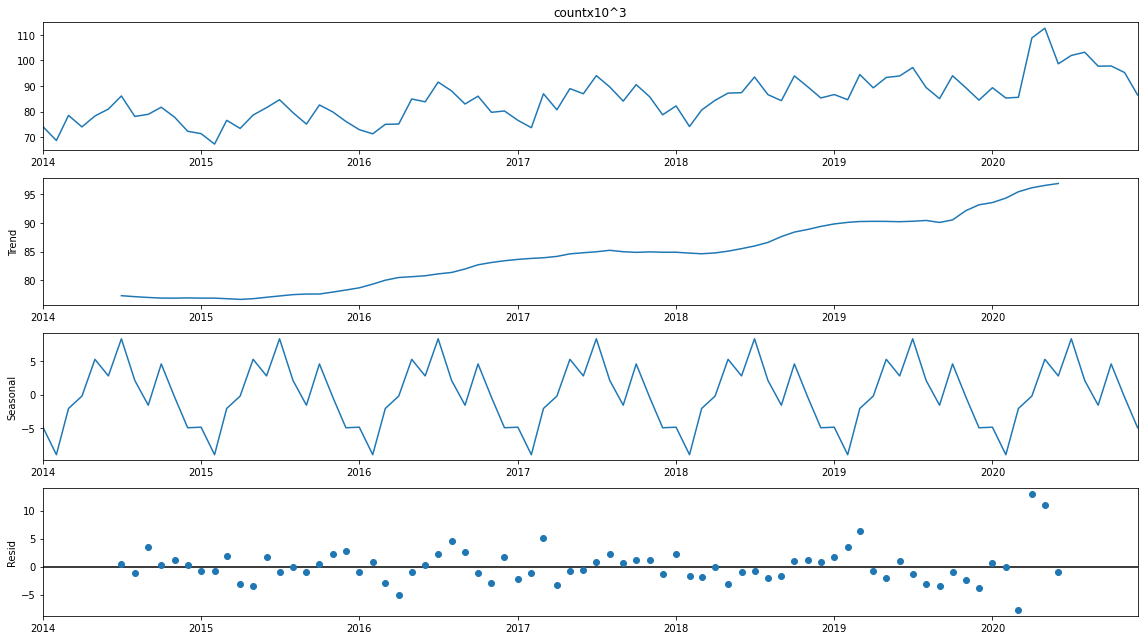

In [ ]:
"""
Code to produce a breakdown of seasonality for the crime count timeseries, using seasonal_decompose from the statsmoels package.
"""

# create df to group crime count by month
crime_type = crime_df
monthly = crime_type.groupby('Month')
monthly = monthly.count()
monthly = monthly.reset_index()

monthly['countx10^3'] = monthly["Crime type"] / 1000
monthly['rolling average'] = monthly['countx10^3'].rolling(4).mean()  # Not sure if can be removed or required for later use

# Understand seasonality of data
from statsmodels.tsa.seasonal import seasonal_decompose

monthly["Month"] = pd.to_datetime(monthly["Month"])

monthly.set_index("Month", inplace=True)

decomposed = seasonal_decompose(x=monthly["countx10^3"], model="additive")
# Additive: f(x) = Level + Trend + Seasonality + Noise

trend = decomposed.trend  # six month rolling average
seasonal = decomposed.seasonal  # high pass filter
residual = decomposed.resid

decomposed.plot()

plt.savefig('ReportImages/Seasonality=Trend-Seasonal-Residuals.png',bbox_inches='tight')
plt.show()


There is a strong seasonality present in the data coinciding with each year, with more crime occuring in the summer months than during the winter period. This may be due to people being out of the house more - leading to a general increase in crime rates.

*Explore what crime most common each month?*

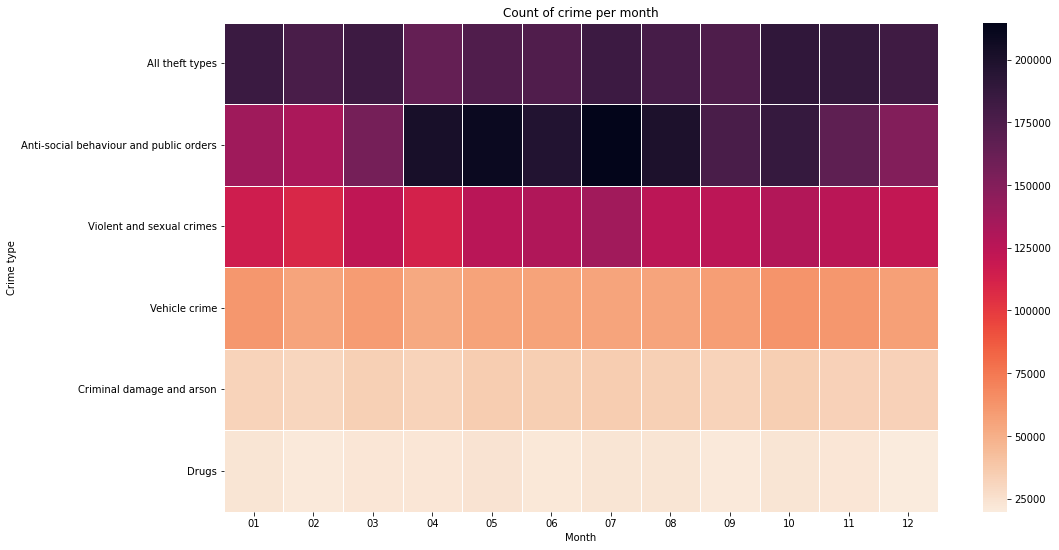

In [ ]:
"""
Plot a heatmap that shows the count of crime types per borough over the year.
"""

# Create df for heatmap grouping by month
x = crime_df[["Month", "Crime type"]]
x["Month"] = x["Month"].astype("string")
x["Month"] = crime_df["Month"].str[5:]

heatmap = x.value_counts(["Month", "Crime type"])
heatmap_df = heatmap.to_frame().reset_index()
heatmap_df.rename({0: "count"}, axis=1, inplace=True)

heatmap_df = heatmap_df.pivot_table(values="count", index="Crime type", columns="Month")  # pivot table required for heatmap plot

# Order crimes by sum of counts per crime type

heatmap_df["sum"] = heatmap_df.sum(axis=1) 
heatmap_df = heatmap_df.sort_values(by="sum", ascending=False)
heatmap_df.drop("sum", axis=1, inplace=True)

# Plot heatmap of crime count per month

heat = sns.heatmap(heatmap_df, linewidth=1, cmap="rocket_r")

plt.title("Count of crime per month")
plt.rcParams["figure.figsize"] = (9,16)

plt.savefig('ReportImages/Heatmaps=CrimeCountPerMonth.png',bbox_inches='tight')
plt.show()

Upon initial inspection, it seems that the number of anti-social behaviour and public order crimes are more prevalent over summer, with the majority of other crimes staying relatively constant throughout the year.

It is interesting that there is a distinct drop in 'Other crime' from September to the end of the year - perhaps due to combining multiple crime types into a single group.

In [ ]:
monthly.reset_index(inplace=True)

monthly.head()

Month  Crime type  borough   Year  countx10^3  rolling average
0 2014-01-01       74109    74109  74109      74.109              NaN
1 2014-02-01       68685    68685  68685      68.685              NaN
2 2014-03-01       78517    78517  78517      78.517              NaN
3 2014-04-01       74011    74011  74011      74.011         73.83050
4 2014-05-01       78290    78290  78290      78.290         74.87575

## Feature engineering
In order to analyse the crime data, we need to group it such that we can see the total number of crime in a year for each borough. We will then be able to join it to our non-crime dataframe.

In [ ]:
'''
Using the crime_type dataframe,
We group by year and borough, then take a count of the groups

This results in a a yearly total, split by borough

For example, City of Westminster 2017 or Camden 2015

We then drop some columns that aren't needed for clarity

We create a new column in the non_crime_df for the crime count

non_crime_df is grouped the same as yearly

The dataframe is copied to a new dataframe named df
'''

yearly = crime_type.groupby(['Year','borough'])
yearly = yearly.count()
yearly = yearly.reset_index()

In [ ]:
yearly = yearly.reset_index()
yearly = yearly.drop(columns=["index","Month"])

In [ ]:
yearly = yearly.rename(columns={"Crime type": "Total crime"})

In [ ]:
non_crime_df = non_crime_df.reset_index()
non_crime_df = non_crime_df.drop(columns="index")

In [ ]:
non_crime_df["Total crime of type"] = yearly["Total crime"]

In [ ]:
non_crime_df

Year                   Area  Crime Count  Affordable Housing Supply  \
0    2014  Barking and Dagenham         21039                       1200   
1    2014                Barnet         31944                        441   
2    2014                Bexley         16783                        387   
3    2014                 Brent         34034                       1316   
4    2014               Bromley         26088                        209   
..    ...                    ...          ...                        ...   
219  2020                Sutton         19113                         97   
220  2020         Tower Hamlets         55021                        804   
221  2020        Waltham Forest         36330                        529   
222  2020            Wandsworth         37494                        423   
223  2020           Westminster         65660                        296   

     Working age population  Percent Economically Inactive  \
0                    125000                           28.1   
1                    242400                           26.1   
2                    150100                           20.2   
3                    214700                           26.5   
4                    202700                           20.6   
..                      ...                            ...   
219                  132400                           17.4   
220                  236200                           21.1   
221                  190000                           20.4   
222                  238200                           12.8   
223                  171500                           23.4   

     percent no qualifications  percent NVQ1  percent NVQ2  percent NVQ3  \
0                         15.5          12.7          14.7          11.4   
1                          7.0           8.0          12.6          16.4   
2                          5.9          14.0          22.0          17.8   
3                          7.8           7.0          11.8          14.4   
4                          3.7          10.7          15.1          16.8   
..                         ...           ...           ...           ...   
219                        6.3           6.2          11.7          14.0   
220                        8.9           5.4           5.3          11.0   
221                        4.5           9.0          11.2          12.9   
222                        2.6           3.1           6.7           9.4   
223                        4.8           2.2           2.6          13.6   

     percent NVQ4+  percent other qualifications  House sales volume  \
0             29.5                          14.1                9036   
1             43.7                          10.9               20232   
2             33.2                           4.0               15776   
3             45.9                          12.3               11936   
4             46.1                           5.6               24676   
..             ...                           ...                 ...   
219           54.9                           5.1                9180   
220           61.8                           7.6               11600   
221           56.9                           4.8                9096   
222           72.6                           5.6               16540   
223           65.3                          11.3                7212   

            HPI  Average property price  population  Average Weekly Income  \
0     91.412500             201172.2500      198650                  422.5   
1     93.277500             430363.3333      373745                  479.1   
2     93.393333             244459.5833      240016                  512.6   
3     93.318333             394687.4167      320101                  441.8   
4     93.295833             347857.3333      321602                  578.5   
..          ...                     ...         ...                    ...   
219  123.152500        

In [ ]:
full_df = non_crime_df

In [ ]:
full_df

Year                   Area  Crime Count  Affordable Housing Supply  \
0    2014  Barking and Dagenham         21039                       1200   
1    2014                Barnet         31944                        441   
2    2014                Bexley         16783                        387   
3    2014                 Brent         34034                       1316   
4    2014               Bromley         26088                        209   
..    ...                    ...          ...                        ...   
219  2020                Sutton         19113                         97   
220  2020         Tower Hamlets         55021                        804   
221  2020        Waltham Forest         36330                        529   
222  2020            Wandsworth         37494                        423   
223  2020           Westminster         65660                        296   

     Working age population  Percent Economically Inactive  \
0                    125000                           28.1   
1                    242400                           26.1   
2                    150100                           20.2   
3                    214700                           26.5   
4                    202700                           20.6   
..                      ...                            ...   
219                  132400                           17.4   
220                  236200                           21.1   
221                  190000                           20.4   
222                  238200                           12.8   
223                  171500                           23.4   

     percent no qualifications  percent NVQ1  percent NVQ2  percent NVQ3  \
0                         15.5          12.7          14.7          11.4   
1                          7.0           8.0          12.6          16.4   
2                          5.9          14.0          22.0          17.8   
3                          7.8           7.0          11.8          14.4   
4                          3.7          10.7          15.1          16.8   
..                         ...           ...           ...           ...   
219                        6.3           6.2          11.7          14.0   
220                        8.9           5.4           5.3          11.0   
221                        4.5           9.0          11.2          12.9   
222                        2.6           3.1           6.7           9.4   
223                        4.8           2.2           2.6          13.6   

     percent NVQ4+  percent other qualifications  House sales volume  \
0             29.5                          14.1                9036   
1             43.7                          10.9               20232   
2             33.2                           4.0               15776   
3             45.9                          12.3               11936   
4             46.1                           5.6               24676   
..             ...                           ...                 ...   
219           54.9                           5.1                9180   
220           61.8                           7.6               11600   
221           56.9                           4.8                9096   
222           72.6                           5.6               16540   
223           65.3                          11.3                7212   

            HPI  Average property price  population  Average Weekly Income  \
0     91.412500             201172.2500      198650                  422.5   
1     93.277500             430363.3333      373745                  479.1   
2     93.393333             244459.5833      240016                  512.6   
3     93.318333             394687.4167      320101                  441.8   
4     93.295833             347857.3333      321602                  578.5   
..          ...                     ...         ...                    ...   
219  123.152500        

In [ ]:
full_df = full_df.drop(columns="Crime Count")

Now we have one dataframe containing the all the data we would like to investigate.

The next step will be to engineer some features and to remove some outliers.

We use the area data from the datset that was used for the maps later on to calculate a population density.


In [ ]:
'''
Important
This code is borrowed from another section in the document, it has been repeated here as it ensures consistency when appending the
area data to the dataframe when creating a population density variables

This section groups the df by areas amd calculates the mean values

A value for city of London is appended for crime rate / 1000 as 0
This is because its required when creating a map later. It is set to zero as we do not include it's data in this investgation

Some feature engineering also takes place

'''

year_averages_df = full_df.groupby('Area',as_index=False).mean()
year_averages_df = year_averages_df.append({'Area': 'City of London', 'crime rate / 1000': 0},ignore_index=True)

filepath = "Boroughs/London_Borough_Excluding_MHW.shp" # set the filepath for the map data

map_df = gpd.read_file(filepath) # read map data

map_df['NAME'] = map_df['NAME'].replace('City of Westminster','Westminster') # keep consistent

map_df = map_df.sort_values('NAME')
map_df = map_df.reset_index()
map_df = map_df.drop(columns="index") # sort the values alphabetically and reset the index


year_averages_df = year_averages_df.sort_values('Area') # repeat for the yearly dataframe
year_averages_df = year_averages_df.reset_index()

size_df = map_df.join(year_averages_df)  # join the dataframes on index

size_df = size_df[size_df['NAME'] != 'City of London'] # remove city of london as this isn't in the other 

In [ ]:
# here we create the population density variable

area = size_df['HECTARES'] / 100 # convert hectares km^2

area = [area] * 7 # repeat the list seven times, creates a list of 7 lists containing the sizes of broughs

# this section essentially creates a new list of the items contained in the list of lists
area_list = []
for small_list in area:
    for item in small_list:
        area_list.append(item) # area_list is now a 1xN list of borough sizes

print(len(area_list))

full_df['Size'] = area_list

224


In [ ]:
full_df['population density'] = full_df['population'] / full_df['Size'] # create population density feature

The second attribute that needs creating is crime rate. We calculate this by dividing the population by 1000, then dividing the total number of crimes by this number.

In [ ]:
full_df['crime rate / 1000'] = (full_df['Total crime of type'] / (full_df['population']/1000)) # create crime rate per 100 residents feature

Using the same method, we convert affordable housing supply into a rate.

In [ ]:
full_df['Affordable Housing / 1000'] = (full_df['Affordable Housing Supply']  / (full_df['population']/1000))

The education data provides the percentage of the population that are educated to level at maximum. For example, if you have achieved a maximum of an NVQ3, you are included in the NVQ3 percentage, but not in the NVQ1 and NVQ2 percentage, despite having achieved it. Therefore, we accumulate the percentages togther so that they include the levels below it also.

In [ ]:
'''
This section adds percentages in a certain NVQ level together

The problem with the original data is that once someone graduates from one NVQ level to a higher one, they are then only counted in the new NVQ level

For example, someone who is NVQ3 educated is only counted in the percentage of NVQ3 residents, despite the fact that to be NVQ3 they are also NVQ1 and 2 educated

This resulted in it appearing that many more people went to NVQ4+ than actually would have and so would throw off any models created
To fix this, they are added together
'''

full_df['NVQ1 educated'] = full_df['percent NVQ1'] + full_df['percent NVQ2'] + full_df['percent NVQ3'] + full_df['percent NVQ4+']

full_df['NVQ2 educated'] = full_df['percent NVQ2'] + full_df['percent NVQ3'] + full_df['percent NVQ4+']

full_df['NVQ3 educated'] = full_df['percent NVQ3'] + full_df['percent NVQ4+']

full_df['NVQ4+ educated'] = full_df['percent NVQ4+']

full_df = full_df.drop(columns=['percent NVQ1', 'percent NVQ2','percent NVQ3','percent NVQ4+']) # the original dataframe features are dropped

In [ ]:
full_df

Year                   Area  Affordable Housing Supply  \
0    2014  Barking and Dagenham                        1200   
1    2014                Barnet                         441   
2    2014                Bexley                         387   
3    2014                 Brent                        1316   
4    2014               Bromley                         209   
..    ...                    ...                        ...   
219  2020                Sutton                          97   
220  2020         Tower Hamlets                         804   
221  2020        Waltham Forest                         529   
222  2020            Wandsworth                         423   
223  2020           Westminster                         296   

     Working age population  Percent Economically Inactive  \
0                    125000                           28.1   
1                    242400                           26.1   
2                    150100                           20.2   
3                    214700                           26.5   
4                    202700                           20.6   
..                      ...                            ...   
219                  132400                           17.4   
220                  236200                           21.1   
221                  190000                           20.4   
222                  238200                           12.8   
223                  171500                           23.4   

     percent no qualifications  percent other qualifications  \
0                         15.5                          14.1   
1                          7.0                          10.9   
2                          5.9                           4.0   
3                          7.8                          12.3   
4                          3.7                           5.6   
..                         ...                           ...   
219                        6.3                           5.1   
220                        8.9                           7.6   
221                        4.5                           4.8   
222                        2.6                           5.6   
223                        4.8                          11.3   

     House sales volume         HPI  Average property price  ...  \
0                  9036   91.412500             201172.2500  ...   
1                 20232   93.277500             430363.3333  ...   
2                 15776   93.393333             244459.5833  ...   
3                 11936   93.318333             394687.4167  ...   
4                 24676   93.295833             347857.3333  ...   
..                  ...         ...                     ...  ...   
219                9180  123.152500             378749.0000  ...   
220               11600  114.445833             466055.9167  ...   
221                9096  133.218333             451232.6667  ...   
222               16540  110.166667             610148.4167  ...   
223                7212   98.470000             961711.7500  ...   

     Average Weekly Income  Total crime of type       Size  \
0                    422.5                20836   37.79934   
1                    479.1                31696   86.74837   
2                    512.6                16640   64.28649   
3                    441.8                33795   43.23270   
4                    578.5                25881  150.13487   
..                     ...                  ...        ...   
219                  543.3                18912   43.84698   
220                  690.6                54783   21.57501   
221                  598.3                36014   38.80793   
222                  752.6                37201   35.22022   
223                  703.5                65381   22.03005   

     population density  crime rate / 1000  Affordable Housing / 1000  \
0           5255.382766         104.887994                   6.040775   
1           4308.380665   

## A geographic breakdown (maps need comments)

In [ ]:
year_averages_df = full_df.groupby('Area',as_index=False).mean() # group the year averages by area so that we can have a mean value of attributes across the date range

In [ ]:
year_averages_df.head()

Area    Year  Affordable Housing Supply  \
0  Barking and Dagenham   2017.0                 409.000000   
1                Barnet   2017.0                 312.857143   
2                Bexley   2017.0                 186.000000   
3                 Brent   2017.0                 474.857143   
4               Bromley   2017.0                 106.857143   

   Working age population  Percent Economically Inactive  \
0           132514.285714                      26.485714   
1           251185.714286                      24.042857   
2           155485.714286                      19.757143   
3           218957.142857                      25.357143   
4           205328.571429                      19.228571   

   percent no qualifications  percent other qualifications  \
0                  11.385714                     12.528571   
1                   5.242857                      9.700000   
2                   6.485714                      5.528571   
3                   7.171429                     11.571429   
4                   3.742857                      6.300000   

   House sales volume         HPI  Average property price  ...  \
0         7947.428571  122.721548           270073.630943  ...   
1        17298.857143  110.027738           507648.309529  ...   
2        13378.285714  120.004524           314114.095243  ...   
3         9545.714286  110.383452           466861.154771  ...   
4        20501.142857  111.780595           416779.821429  ...   

   Average Weekly Income  Total crime of type       Size  population density  \
0             461.828571         22640.571429   37.79934         5516.555127   
1             510.214286         34620.714286   86.74837         4466.310351   
2             519.728571         18791.714286   64.28649         3818.771698   
3             483.142857         37109.857143   43.23270         7558.405691   
4             604.857143         27779.428571  150.13487         2188.565521   

   crime rate / 1000  Affordable Housing / 1000  NVQ1 educated  NVQ2 educated  \
0         108.492059                   1.990825      74.314286      63.200000   
1          89.245190                   0.805540      84.242857      78.585714   
2          76.455077                   0.760807      85.014286      72.828571   
3         113.512467                   1.461602      80.457143      73.442857   
4          84.499579                   0.326401      87.842857      79.585714   

   NVQ3 educated  NVQ4+ educated  
0      47.300000       33.657143  
1      66.914286       52.728571  
2      54.157143       36.414286  
3      60.585714       44.814286  
4      65.557143       49.314286  

[5 rows x 21 columns]

In [ ]:
year_averages_df.shape

(32, 21)

The following barplot shows the average yearly crime rate of London's borough's between the years 2011 and 2020:




In [ ]:
import plotly.express as px #import plotly express to make a bar chart


bar_df = year_averages_df.sort_values('crime rate / 1000') # create new dataframe of sorted values by crime rate


# create bar chart, x is crime rate, each bar is an area and the colour represents the pop. density
#add in hover data and labels, other style choces
fig = px.bar(bar_df, x='crime rate / 1000', y='Area',
             hover_data=['crime rate / 1000', 'crime rate / 1000','population'], color='population density',
             labels={'Area':'Borough of London',
             'crime rate / 1000':'Crime rate per 1000 residents (year average)',
             'population density':'Residents per square kilometere'
             },
              height=1000,color_continuous_scale='purples',
              title="Yearly average crime rate of London Boroughs, 2014-2020",
              text_auto='.3s',)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False) # have values appear at end of the bar


fig.write_html("ReportImages/Geographical=BarChart.html")
fig.show()

In [ ]:
import plotly.express as px #import plotly express to make a bar chart


bar_df = year_averages_df.sort_values('crime rate / 1000') # create new dataframe of sorted values by crime rate


# create bar chart, x is crime rate, each bar is an area and the colour represents the pop. density
#add in hover data and labels, other style choces
fig = px.bar(bar_df, y='crime rate / 1000', x='Area',
             hover_data=['crime rate / 1000', 'crime rate / 1000','population'], color='population density',
             labels={'Area':'Borough of London',
             'crime rate / 1000':'Crime rate per 1000 residents (year average)',
             'population density':'Residents per square kilometere'
             },
              height=1000,color_continuous_scale='deep',
              title="Yearly average crime rate of London Boroughs, 2014-2020",
              text_auto='.3s',)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False) # have values appear at end of the bar


fig.write_html("ReportImages/Geographical=BarChart.html")
fig.show()

What surprised us the most from the visualisation is just how much more crime there was in the City of Westminster, compared to the other borough's. On reflection though, this does actually seem to make intuitive sense, since many of London's shops, leisure, tourism, nightlife etc. is centered around this borough.


In [ ]:
year_averages_df = year_averages_df.append({'Area': 'City of London', 'crime rate / 1000': 0},ignore_index=True)  
#A value for city of London is appended for crime rate / 1000 as 0

In [ ]:
year_averages_df

Area    Year  Affordable Housing Supply  \
0     Barking and Dagenham   2017.0                 409.000000   
1                   Barnet   2017.0                 312.857143   
2                   Bexley   2017.0                 186.000000   
3                    Brent   2017.0                 474.857143   
4                  Bromley   2017.0                 106.857143   
5                   Camden   2017.0                 202.857143   
6                  Croydon   2017.0                 449.000000   
7                   Ealing   2017.0                 480.857143   
8                  Enfield   2017.0                 255.142857   
9                Greenwich   2017.0                 487.000000   
10                 Hackney   2017.0                 354.714286   
11  Hammersmith and Fulham   2017.0                  98.428571   
12                Haringey   2017.0                 182.714286   
13                  Harrow   2017.0                 129.142857   
14                Havering   2017.0                 185.714286   
15              Hillingdon   2017.0                 153.857143   
16                Hounslow   2017.0                 350.714286   
17               Islington   2017.0                 258.428571   
18  Kensington and Chelsea   2017.0                  90.000000   
19    Kingston upon Thames   2017.0                  90.714286   
20                 Lambeth   2017.0                 367.142857   
21                Lewisham   2017.0                 356.714286   
22                  Merton   2017.0                 102.428571   
23                  Newham   2017.0                 658.428571   
24               Redbridge   2017.0                 136.428571   
25    Richmond upon Thames   2017.0                  53.714286   
26               Southwark   2017.0                 594.857143   
27                  Sutton   2017.0                 170.285714   
28           Tower Hamlets   2017.0                 941.428571   
29          Waltham Forest   2017.0                 433.428571   
30              Wandsworth   2017.0                 410.285714   
31             Westminster   2017.0                 299.000000   
32           City of London     NaN                        NaN   

    Working age population  Percent Economically Inactive  \
0            132514.285714                      26.485714   
1            251185.714286                      24.042857   
2            155485.714286                      19.757143   
3            218957.142857                      25.357143   
4            205328.571429                      19.228571   
5            177814.285714                      26.928571   
6            247528.571429                      20.028571   
7            225985.714286                      22.000000   
8            214842.857143                      26.200000   
9            189471.428571                      21.642857   
10           199928.571429                      25.228571   
11           128700.000000                      19.671429   
12           192271.428571                      23.300000   
13           156642.857143                      22.200000   
14           159271.428571                      18.785714   
15           197100.000000                      21.714286   
16           179814.285714                      21.100000   
17           173200.000000                      22.185714   
18           106171.428571                      28.042857   
19           116214.285714                      21.171429   
20           241571.428571                      15.600000   
21           210371.428571                      17.400000   
22           138357.142857                      17.442857   
23           242800.000000                      26.485714   
24           197428.571429                      25.257143   
25           125014.285714                      18.400000   
26           228257.142857                      17.600000   
27           129900.000000                      16.842857   
28       

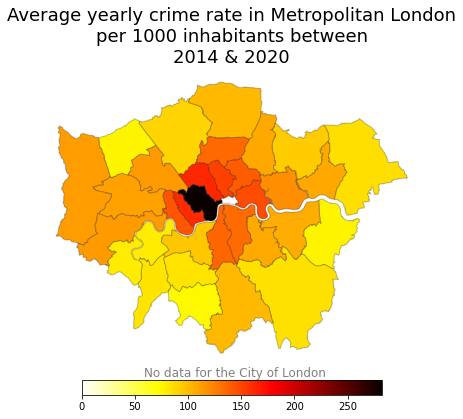

In [ ]:
filepath = "Boroughs/London_Borough_Excluding_MHW.shp" # set the filepath for the map data

map_df = gpd.read_file(filepath) # read map data

map_df['NAME'] = map_df['NAME'].replace('City of Westminster','Westminster') # update name for consitency

map_df = map_df.sort_values('NAME')
map_df = map_df.reset_index()
map_df = map_df.drop(columns="index") # sort the map data alpahabetically and reset index


year_averages_df = year_averages_df.sort_values('Area')
year_averages_df = year_averages_df.reset_index() # repeat for the year averages data


merged_df = map_df.join(year_averages_df) # merge the dataframes


# Heatmap of violent crimes per 1000 inhabitants

color = 'hot_r' # select a colormap that fits the attribute

fig, ax = plt.subplots(1, figsize = (8,6)) # create a subplot of size 8,6

vmin, vmax = merged_df['crime rate / 1000'].min(), merged_df['crime rate / 1000'].max() # create a minimum and maximum value for the color bar

merged_df.plot(column='crime rate / 1000', cmap=color, ax=ax, edgecolor=(0, 0, 0, 0.25)) # plot the geodataframe
ax.axis('off') # show no axis
ax.set_title('Average yearly crime rate in Metropolitan London\nper 1000 inhabitants between\n2014 & 2020', fontsize=18)

sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, location='bottom',fraction=0.046, pad=0.04) # create a colour bar normalised the min and max values

ax.annotate('No data for the City of London',xy=(0.25, 0.12),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, color='grey'); # create an annotation for city of london

plt.savefig('ReportImages/Geographic=CrimeMap.png',bbox_inches='tight',dpi=800)
plt.show()

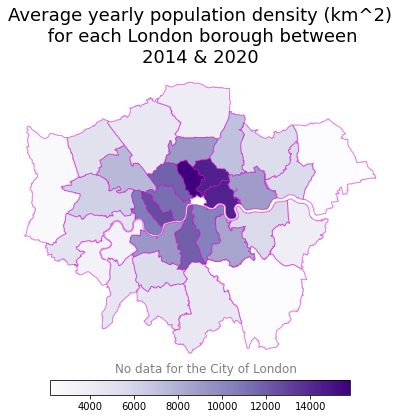

In [ ]:
color = 'Purples'

fig, ax = plt.subplots(1, figsize = (8,6))

vmin, vmax = merged_df['population density'].min(), merged_df['population density'].max()

merged_df.plot(column='population density', cmap=color, ax=ax, edgecolor=(0.8, 0, 0.8, 0.5))
ax.axis('off')
ax.set_title('Average yearly population density (km^2)\n for each London borough between\n2014 & 2020', fontsize=18)

sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, location='bottom',fraction=0.046, pad=0.04)

ax.annotate('No data for the City of London',xy=(0.2, 0.13),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, color='grey');

plt.savefig('ReportImages/Geographic=PopDensityMap.png',bbox_inches='tight',dpi=800)
plt.show()

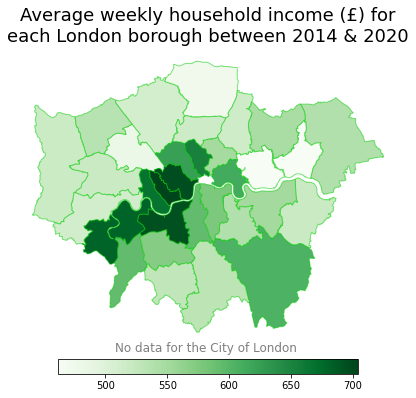

In [ ]:
# Heatmap of violent crimes per 1000 inhabitants

color = 'Greens'

fig, ax = plt.subplots(1, figsize = (8,6))

vmin, vmax = merged_df['Average Weekly Income'].min(), merged_df['Average Weekly Income'].max()

merged_df.plot(column='Average Weekly Income', cmap=color, ax=ax, edgecolor=(0, 0.8, 0, 0.5))
ax.axis('off')
ax.set_title('Average weekly household income (£) for\neach London borough between 2014 & 2020', fontsize=18)

sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, location='bottom',fraction=0.046, pad=0.04)

ax.annotate('No data for the City of London',xy=(0.2, 0.13),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, color='grey');


plt.savefig('ReportImages/Geographic=IncomeMap.png',bbox_inches='tight',dpi=800)
plt.show()

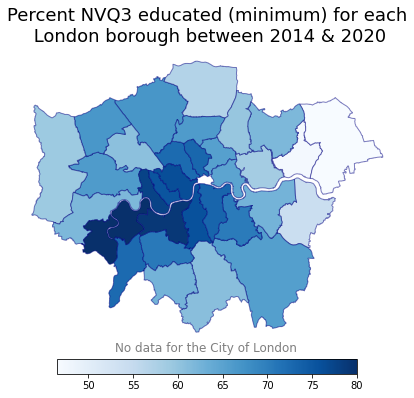

In [ ]:
# Heatmap of violent crimes per 1000 inhabitants

color = 'Blues'

fig, ax = plt.subplots(1, figsize = (8,6))

vmin, vmax = merged_df['NVQ3 educated'].min(), merged_df['NVQ3 educated'].max()

merged_df.plot(column='NVQ3 educated', cmap=color, ax=ax, edgecolor=(0, 0, 0.5, 0.5))
ax.axis('off')
ax.set_title('Percent NVQ3 educated (minimum) for each\n London borough between 2014 & 2020', fontsize=18)

sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, location='bottom',fraction=0.046, pad=0.04)

ax.annotate('No data for the City of London',xy=(0.2, 0.13),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=12, color='grey');


plt.savefig('ReportImages/Geographic=EducationMap.png',bbox_inches='tight',dpi=800)
plt.show()

Heat maps were generated to visualise how crime types were spread across the boroughs, to provide unseen information about the variance of crimes occuring across London. The log of the crime counts were taken for the second two heatmaps, to account for the large differences between the most common crimes and crimes that were less frequent.

The crime type 'public disorder and weapons' and 'posession of weapons' may be combined in the future.

The first heat map is the count of the number of times the crime had occurred within the borough.

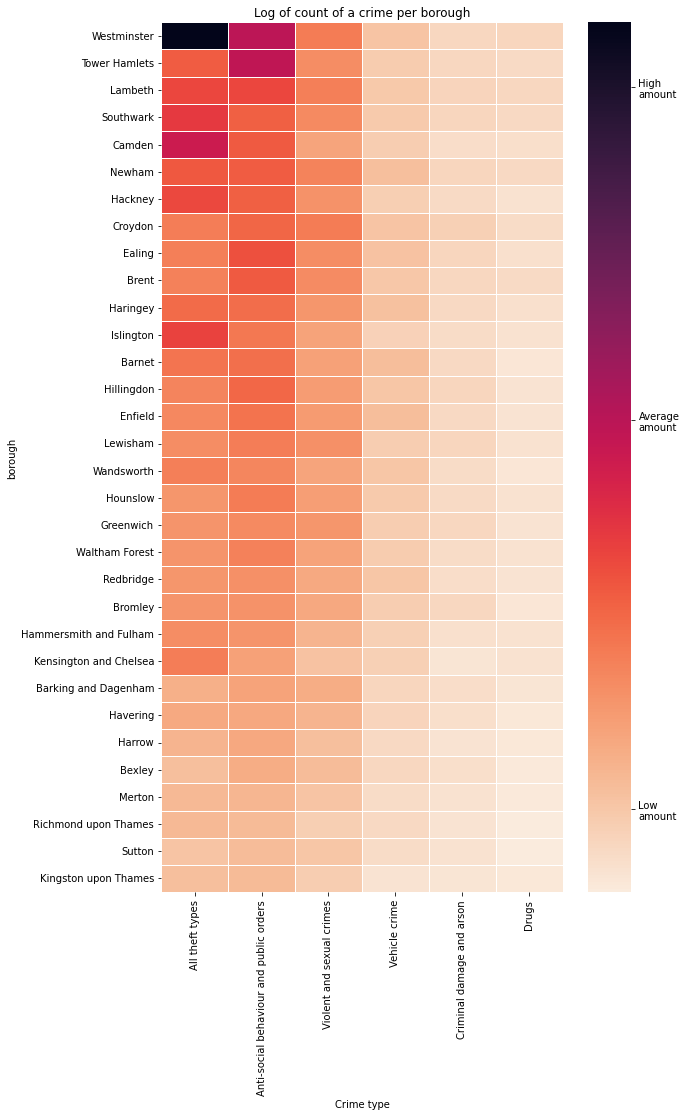

In [ ]:
"""
Heatmap of the log of the crime counts for each crime per borough,
log used to improve contrast in colours of crimes with low counts to allow better comparison.
"""

# Make new df for heatmap

borough_crime_df = crime_df[["borough", "Crime type"]]
borough_crime_df = borough_crime_df[borough_crime_df['borough'].isin(boroughs_list)]

heatmap = borough_crime_df.value_counts(["borough", "Crime type"])
heatmap_df = heatmap.to_frame().reset_index()
heatmap_df.rename({0: "count"}, axis=1, inplace=True)
heatmap_df.set_index("borough")

heatmap_df = heatmap_df.pivot_table(values="count", index="borough", columns="Crime type")  # Pivot table for plotting

# Order borough and crime type by total count

heatmap_df = heatmap_df[heatmap_df.sum(axis=0).sort_values(axis=0, ascending=False).index]
heatmap_df["sum"] = heatmap_df.sum(axis=1)
heatmap_df = heatmap_df.sort_values(by="sum", ascending=False)
heatmap_df.drop("sum", axis=1, inplace=True)

heat = sns.heatmap(heatmap_df, linewidth=1, cmap="rocket_r")

cbar = heat.collections[0].colorbar
cbar.set_ticks([25000, 130000, 220000])
cbar.set_ticklabels(['Low\namount', 'Average\namount', 'High\namount'])

plt.title("Log of count of a crime per borough")
plt.rcParams["figure.figsize"] = (9,16)

plt.savefig('ReportImages/Heatmaps=logCrimeCountPerBorough.png',bbox_inches='tight')
plt.show()

The graph highlights the large discrepancy between the most common and least common crimes, with anti-social behaviour and public order cirmes the greatest, closely followed by theft, and possession of weapons the lowest. The Boroughs have also been sorted based on total crime occured in the borough.

The second heat map is the log of the count of a crime in a borough / total count of that specific crime. This was used to understand the spread of each crime over the London boroughs to visualise any hidden patterns.

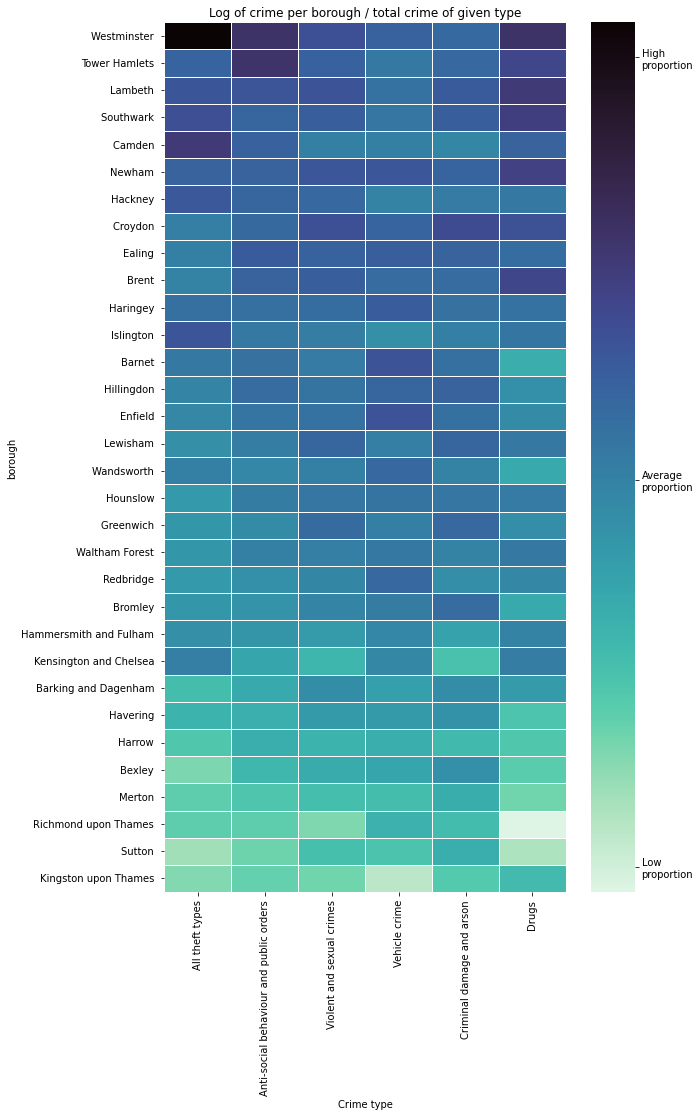

In [ ]:
"""
Heatmap of the log of the crime counts for each borough as a proportion of total crime count of a given crime.
Visualises the distribution of a given crime over the London boroughs.
"""

# Repeat code to stop cell crashing 

borough_crime_df = crime_df[["borough", "Crime type"]]
borough_crime_df = borough_crime_df[borough_crime_df['borough'].isin(boroughs_list)]

heatmap = borough_crime_df.value_counts(["borough", "Crime type"])
heatmap_df = heatmap.to_frame().reset_index()
heatmap_df.rename({0: "count"}, axis=1, inplace=True)
heatmap_df.set_index("borough")

heatmap_df = heatmap_df.pivot_table(values="count", index="borough", columns="Crime type")

heatmap_df = heatmap_df[heatmap_df.sum(axis=0).sort_values(axis=0, ascending=False).index]
heatmap_df["sum"] = heatmap_df.sum(axis=1)
heatmap_df = heatmap_df.sort_values(by="sum", ascending=False)
heatmap_df.drop("sum", axis=1, inplace=True)


# use total of a crime in that borough / total of specific crime

count_df = heatmap_df.sum()  # Count of each crime type
count_df = count_df.to_frame().reset_index()
count_df.rename({0: "count"}, axis=1, inplace=True)

count_df = count_df.pivot_table(values="count", columns="Crime type")

for borough in heatmap_df.index:

    rowName = borough + " "  # REMEMBER THE BLANK SPACE IF USED FURTHER !!!
    heatmap_df.loc[rowName] = heatmap_df.loc[borough, :] / count_df.loc["count", :]  # Generate the proportion of crime for a borough / total given crime count

heatmap_df.drop(boroughs_list, axis=0, inplace=True)

heat = sns.heatmap(np.log(heatmap_df*100), linewidth=1, cmap="mako_r")

cbar = heat.collections[0].colorbar
cbar.set_ticks([0, 1.1, 2.3])
cbar.set_ticklabels(['Low\nproportion', 'Average\nproportion', 'High\nproportion'])

plt.title("Log of crime per borough / total crime of given type")
plt.rcParams["figure.figsize"] = (9,16)

plt.savefig('ReportImages/Heatmaps=logCrimePerBoroughperTotalCrimeOfType.png',bbox_inches='tight')
plt.show()

It seems that the proportion of a given crime relates closely to the overall crime committed in that borough.

The final heatmap is the log of the count of a given crime in a borough / total crime in the borough. This was plotted to see if any cirme dominated a given borough.

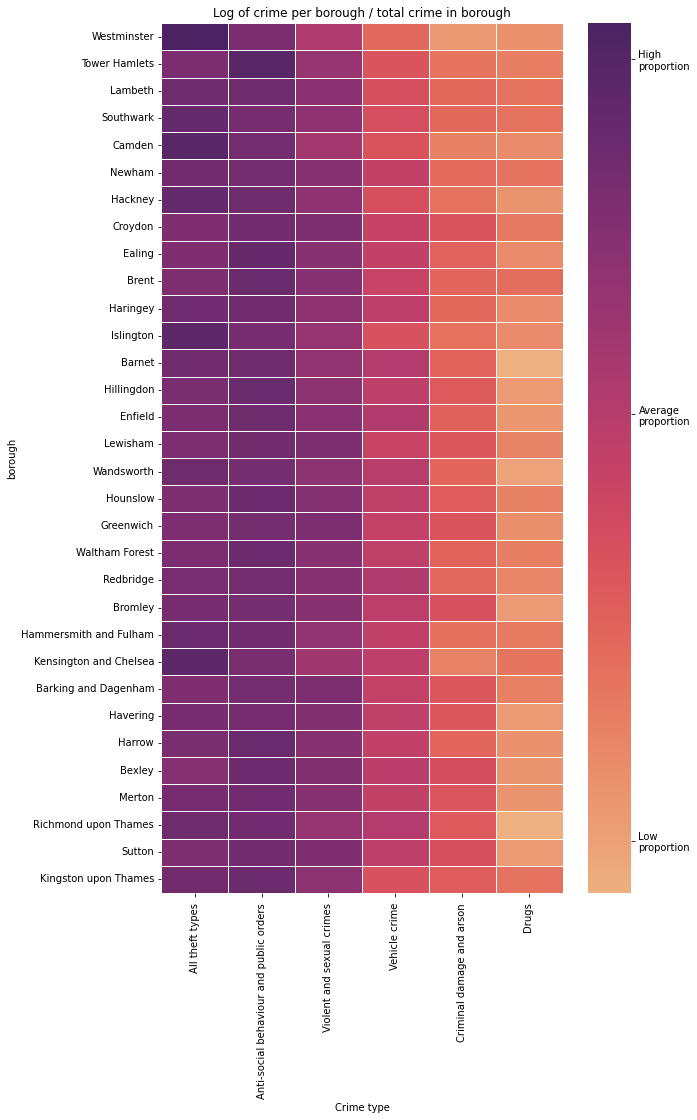

In [ ]:
"""
Heatmap of the log of the crime counts for each borough as a proportion of total crime in the borough.
Visualises the distribution of what crime occurs in an indvidual borough.
"""
crime_df = crime_df

# Make new df for crime in borough / total crime in borough

borough_crime_df = crime_df[["borough", "Crime type"]]
borough_crime_df = borough_crime_df[borough_crime_df['borough'].isin(boroughs_list)]

heatmap = borough_crime_df.value_counts(["borough", "Crime type"])
heatmap_df = heatmap.to_frame().reset_index()
heatmap_df.rename({0: "count"}, axis=1, inplace=True)
heatmap_df.set_index("borough")

heatmap_df = heatmap_df.pivot_table(values="count", index="borough", columns="Crime type")

heatmap_df = heatmap_df[heatmap_df.sum(axis=0).sort_values(axis=0, ascending=False).index]
heatmap_df["sum"] = heatmap_df.sum(axis=1)
heatmap_df = heatmap_df.sort_values(by="sum", ascending=False)
heatmap_df.drop("sum", axis=1, inplace=True)

count_df = heatmap_df.sum(axis=1)  # Count of all crime in each borough
count_df = count_df.to_frame().reset_index()
count_df.set_index("borough", inplace=True)
count_df.rename({0: "count"}, axis=1, inplace=True)

for col in heatmap_df.columns:

    colName = col + " "  # DONT FORGET !!!

    heatmap_df[colName] = heatmap_df[col] / count_df["count"]  # Produce proportion of crime count / total crime in a borough

    heatmap_df.drop(col, axis=1, inplace=True)

heat = sns.heatmap(np.log(heatmap_df*100), linewidth=1, cmap="flare")

cbar = heat.collections[0].colorbar
cbar.set_ticks([1.0, 2.5, 3.75])
cbar.set_ticklabels(['Low\nproportion', 'Average\nproportion', 'High\nproportion'])

plt.title("Log of crime per borough / total crime in borough")
plt.rcParams["figure.figsize"] = (9,16)

plt.savefig('ReportImages/Heatmaps=logCrimeCountPerBoroughPerTotalCrimeInBorough.png',bbox_inches='tight')
plt.show()

Again, the proportions of the crime strongly follow the order of overall crimes committed in London. The heatmaps could imply that there is no targeted crime within London, and that perhaps the movement of people between boroughs results in an even distribution of crime over every borough.

# Correlation of variables

Removing outliers using the 3 sigma rule

In [ ]:
# most outliers in this dataset come from Westminster - the problem with Westminster is that we felt that the high crime rate is't indicative of the
# the people that live there, but the nature of the borough being an administrative hub, tourism hub, business hub. 

from scipy import stats # import scipy for 3 sigma rule

full_df = full_df[(np.abs(stats.zscore(full_df['Total crime of type'])) < 3)]  #only select values less then 3 sigma
full_df = full_df[(np.abs(stats.zscore(full_df['crime rate / 1000'])) < 3)]

In [ ]:
pca = full_df # run from this block

In [ ]:
pca['Percent Economically Active'] = 100 - pca['Percent Economically Inactive'] # create inverse feature


pca['Un-affordable Housing / 1000'] = 100 - pca['Affordable Housing / 1000'] # create inverse feature



pca['Difference from average income'] = pca['Average Weekly Income'] - pca['Average Weekly Income'].median() # calculate the difference from average income

difference = pca['Difference from average income']

population = pca['population'] # create variables from the features

In [ ]:
list(pca) # lets look at all the features we have

['Year',
 'Area',
 'Affordable Housing Supply',
 'Working age population',
 'Percent Economically Inactive',
 'percent no qualifications',
 'percent other qualifications',
 'House sales volume',
 'HPI',
 'Average property price',
 'population',
 'Average Weekly Income',
 'Total crime of type',
 'Size',
 'population density',
 'crime rate / 1000',
 'Affordable Housing / 1000',
 'NVQ1 educated',
 'NVQ2 educated',
 'NVQ3 educated',
 'NVQ4+ educated',
 'Percent Economically Active',
 'Un-affordable Housing / 1000',
 'Difference from average income']

In [ ]:
pca = pca[['crime rate / 1000','Year',
 'Area',
 'Affordable Housing Supply',
 'Working age population',
 'Percent Economically Inactive',
 'percent no qualifications',
 'percent other qualifications',
 'House sales volume',
 'HPI',
 'Average property price',
 'population',
 'Average Weekly Income',
 'Total crime of type',
 'Size',
 'population density',
 'Affordable Housing / 1000',
 'NVQ1 educated',
 'NVQ2 educated',
 'NVQ3 educated',
 'NVQ4+ educated',
 'Percent Economically Active',
 'Un-affordable Housing / 1000',
 'Difference from average income']] # select a few features to investigate

In [ ]:
corr = pca.corr()
corr.style.background_gradient(cmap='coolwarm') # create a correlation plot to see which variables correlate best

In [ ]:
# educated variables are a cumulative sum

pca['Total NVQ1 educated'] = pca['NVQ1 educated'] * pca['population']

pca['Total NVQ2 educated'] = pca['NVQ2 educated'] * pca['population']

pca['Total NVQ3 educated'] = pca['NVQ3 educated'] * pca['population']

pca['Total NVQ4+ educated'] = pca['NVQ4+ educated'] * pca['population']

pca['Total not educated'] = pca['percent no qualifications'] * pca['population']

# now we have an estimated number for the total in each group as well as a percentage

In [ ]:
list(pca)

['crime rate / 1000',
 'Year',
 'Area',
 'Affordable Housing Supply',
 'Working age population',
 'Percent Economically Inactive',
 'percent no qualifications',
 'percent other qualifications',
 'House sales volume',
 'HPI',
 'Average property price',
 'population',
 'Average Weekly Income',
 'Total crime of type',
 'Size',
 'population density',
 'Affordable Housing / 1000',
 'NVQ1 educated',
 'NVQ2 educated',
 'NVQ3 educated',
 'NVQ4+ educated',
 'Percent Economically Active',
 'Un-affordable Housing / 1000',
 'Difference from average income',
 'Total NVQ1 educated',
 'Total NVQ2 educated',
 'Total NVQ3 educated',
 'Total NVQ4+ educated',
 'Total not educated']

In [ ]:
pca = pca[['crime rate / 1000',
'Total crime of type',
 'Year',
 'Area',
 'Affordable Housing Supply',
 'Working age population',
 'Percent Economically Inactive',
 'percent no qualifications',
 'percent other qualifications',
 'House sales volume',
 'HPI',
 'Average property price',
 'population',
 'Average Weekly Income',
 'Size',
 'population density',
 'Affordable Housing / 1000',
 'NVQ1 educated',
 'NVQ2 educated',
 'NVQ3 educated',
 'NVQ4+ educated',
 'Percent Economically Active',
 'Un-affordable Housing / 1000',
 'Difference from average income',
 'Total NVQ1 educated',
 'Total NVQ2 educated',
 'Total NVQ3 educated',
 'Total NVQ4+ educated',
 'Total not educated']]

In [ ]:
year_data = pca # for later use

In [ ]:
corr = pca.corr()
corr.style.background_gradient(cmap='coolwarm') # repeat the process


In [ ]:
'''
fig, ax = plt.subplots()
sns.heatmap(pca.corr(), annot=True, fmt='.1f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.rcParams["figure.figsize"] = (16,9)
plt.savefig('ReportImages/Correlation=CorrelationMatrixPreSelection.png', bbox_inches='tight', pad_inches=0.0)
plt.show()
'''

'\nfig, ax = plt.subplots()\nsns.heatmap(pca.corr(), annot=True, fmt=\'.1f\', \n            cmap=plt.get_cmap(\'coolwarm\'), cbar=False, ax=ax)\nax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")\nplt.rcParams["figure.figsize"] = (16,9)\nplt.savefig(\'ReportImages/Correlation=CorrelationMatrixPreSelection.png\', bbox_inches=\'tight\', pad_inches=0.0)\nplt.show()\n'

In [ ]:

columns = ['Total crime of type',
'Affordable Housing Supply',
'Working age population',
 'Total NVQ3 educated',
 'Total not educated',
 'Average property price',
 'population density',
 'Percent Economically Inactive'
]
# these values seem to have the best positive correlation with total crime


columns_for_report = [
'Affordable Housing Supply',
'Working age population',
 'Total NVQ3 educated',
 'Total not educated',
 'Average property price',
 'population density',
 'Percent Economically Inactive',
 'Total crime of type',
]

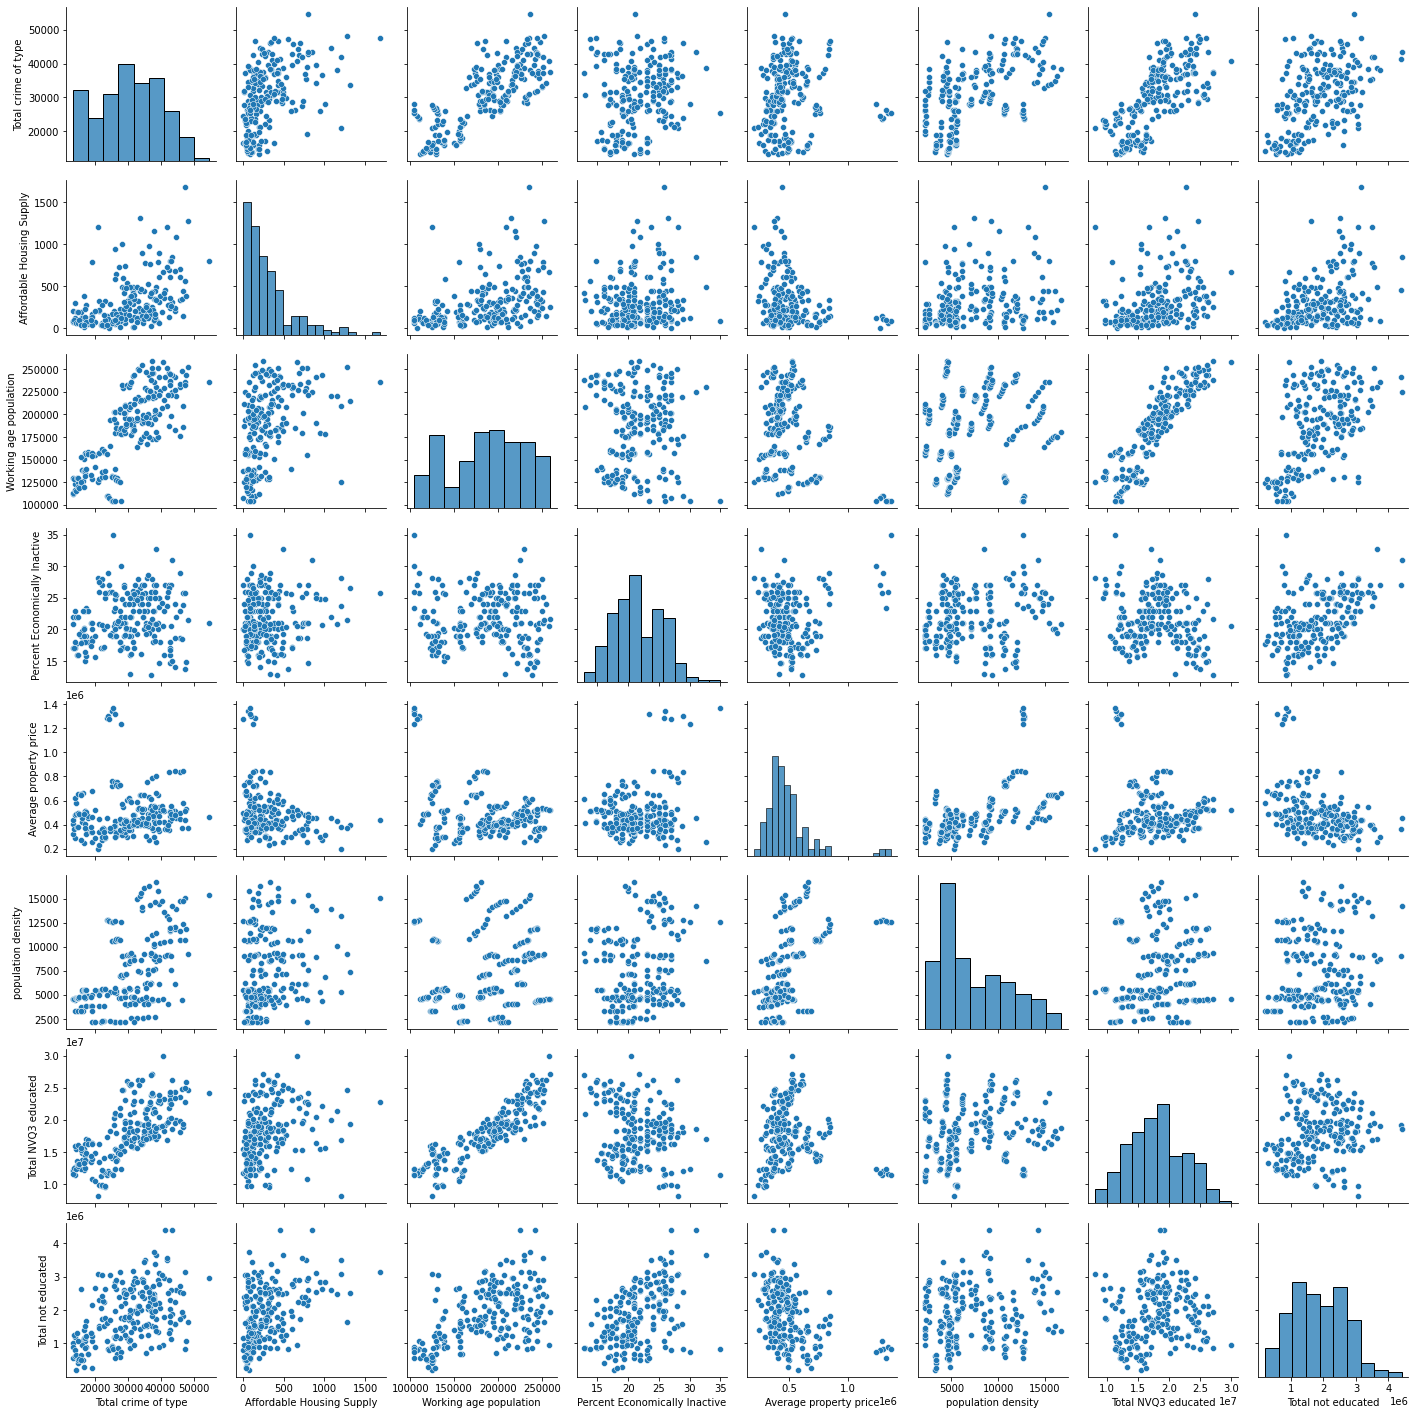

In [ ]:
pairs = pca.drop(pca.columns.difference(columns), 1)
sns.pairplot(pairs) # create a pairplor
plt.show()


In [ ]:
pca = pca.drop(pca.columns.difference(columns), 1) # drop all the columns excep for the ones in columns list

In [ ]:
pca = pca[columns] # reset the order of the dataframe to match columns list

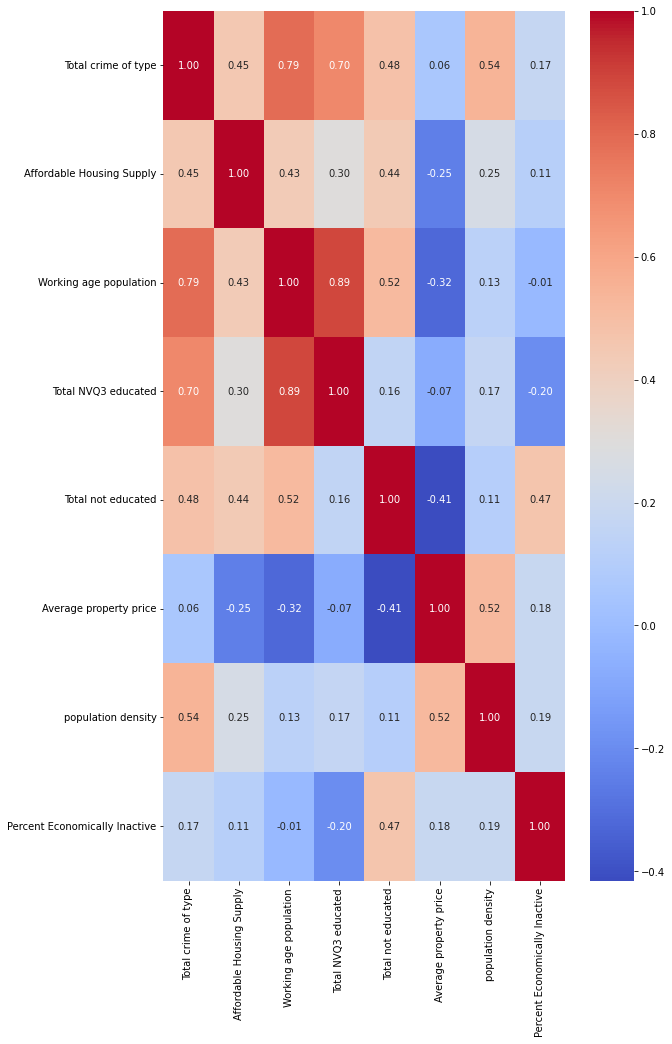

In [ ]:

fig, ax = plt.subplots()
sns.heatmap(pca.corr(), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.rcParams["figure.figsize"] = (9,16)
plt.savefig('ReportImages/Correlation=CorrelationMatrixFinal.png', bbox_inches='tight', pad_inches=0.0)
plt.show()


# Prototype models

To visualise the data better, I will create a PCA model with linear regression. This will allow us to better understand our data and how we could create a final model

In [ ]:
'''
Here we use sklearn to scale the values we want
Y is the crime, x is the remaining values are our x values
'''

from sklearn.preprocessing import MinMaxScaler


values = pca.loc[:,].values

values = MinMaxScaler().fit_transform(values)


x = values[:,1:]
y_values = values[:,0]

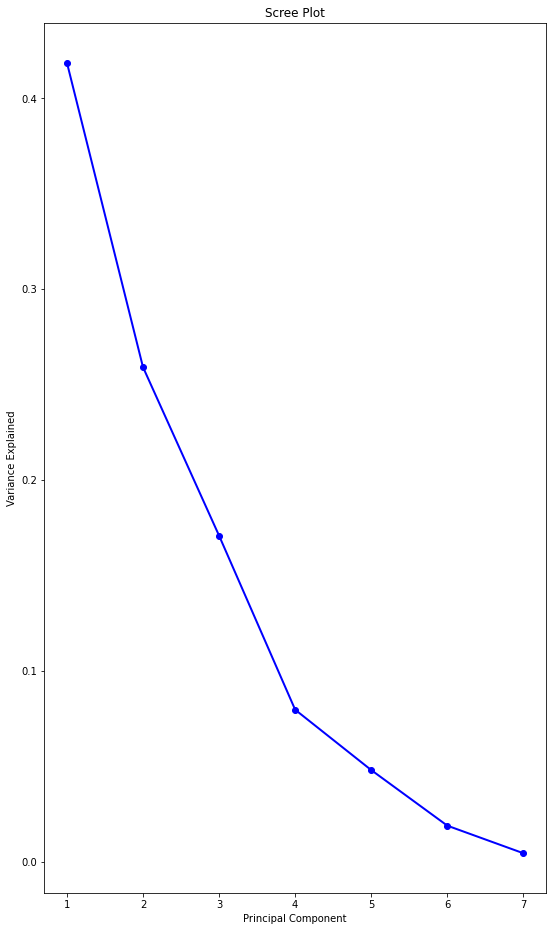

Explained variance:  [0.13007781 0.08050817 0.05307545 0.02474694 0.01492362 0.00587453
 0.00138575]
Explained variance ratio:  [0.41880569 0.25920853 0.17088464 0.07967662 0.0480489  0.01891397
 0.00446164]


In [ ]:
'''
This code shows us how important each component is in the PCA
'''

from sklearn.decomposition import PCA


pca_model = PCA(n_components=7)
pca_model.fit(x)

pca_x= pca_model.transform(x)


PC_values = np.arange(pca_model.n_components_) + 1
plt.plot(PC_values, pca_model.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()



#print("Variables: ",columns[1:])
components = pd.DataFrame(pca_model.components_,index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'], columns=columns[1:])

print("Explained variance: ",pca_model.explained_variance_)
print("Explained variance ratio: ",pca_model.explained_variance_ratio_)

In [ ]:
from tabulate import tabulate
print(tabulate(components, headers = 'keys', tablefmt = 'simple'))

       Affordable Housing Supply    Working age population    Total NVQ3 educated    Total not educated    Average property price    population density    Percent Economically Inactive
---  ---------------------------  ------------------------  ---------------------  --------------------  ------------------------  --------------------  -------------------------------
PC1                    0.279369                   0.726735              0.458458            0.345661                    -0.133117             0.211292                         0.0421866
PC2                    0.0598083                 -0.150532             -0.0492221          -0.0422688                    0.445109             0.854467                         0.203266
PC3                    0.195598                  -0.155418             -0.418294            0.615614                    -0.202769            -0.0673849                        0.581361
PC4                    0.637573                  -0.207368             -0.230

In [ ]:
crime = pca.values
crime = crime[:,0]

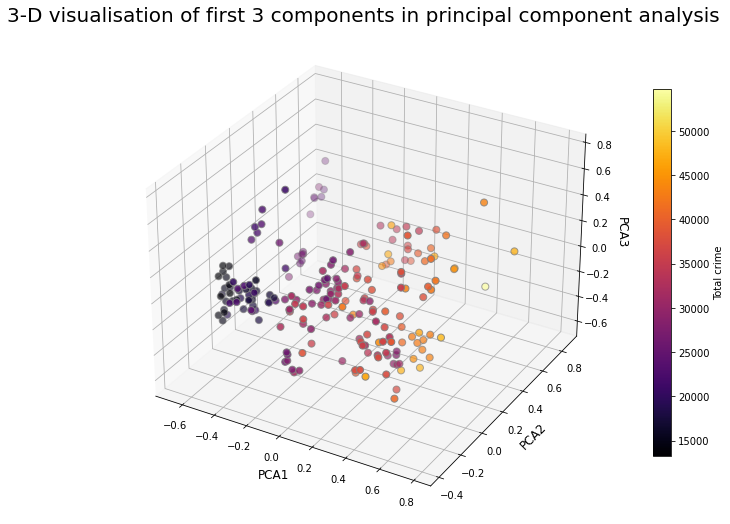

''

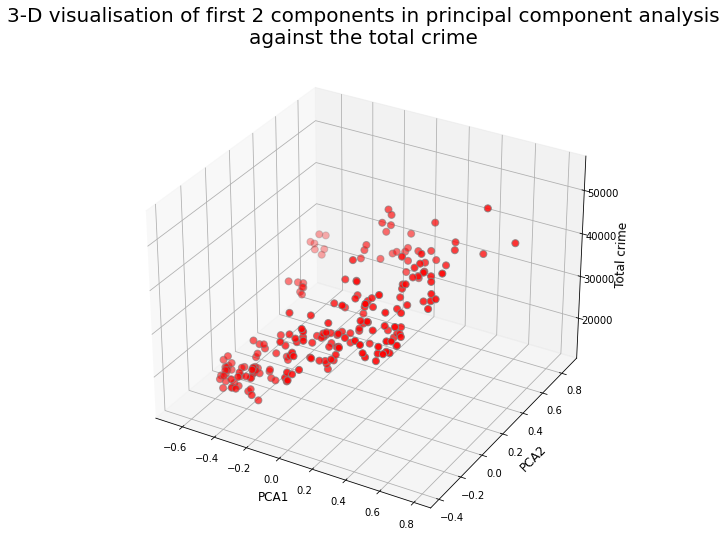

In [ ]:
from mpl_toolkits import mplot3d

cmap = plt.cm.get_cmap('inferno')


fig = plt.figure()
ax = plt.axes(projection='3d')

im = ax.scatter3D(pca_x[:,0], pca_x[:,1], pca_x[:,2], c = crime, cmap=cmap, edgecolor='grey', s =50)

ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12, rotation = 45)
ax.set_zlabel('PCA3', fontsize=12, rotation = -90)

ax.set_title("3-D visualisation of first 3 components in principal component analysis", fontsize = 20)


fig.colorbar(im, ax=ax,shrink=0.75, label="Total crime")
plt.rcParams["figure.figsize"] = (16,9)
plt.savefig('ReportImages/PCA_1', bbox_inches='tight', pad_inches=0.0)
plt.show();


fig = plt.figure()
ax = plt.axes(projection='3d')

im = ax.scatter3D(pca_x[:,0], pca_x[:,1], crime,edgecolor='grey', s =50 , color="r")

ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12, rotation = 45)
ax.set_zlabel('Total crime', fontsize=12, rotation = -90)

ax.set_title("3-D visualisation of first 2 components in principal component analysis\nagainst the total crime", fontsize = 20)
plt.rcParams["figure.figsize"] = (8,8)
plt.savefig('ReportImages/PCA_2', bbox_inches='tight', pad_inches=0.0)
;





In [ ]:
'''
We then use PCA on the x values
This code was created by following the sklearn documentation
'''

from sklearn.decomposition import PCA


pca_model = PCA(n_components=1)
pca_model.fit(x)

pca_x= pca_model.transform(x)

In [ ]:
pca_x = pca_x.reshape(-1)
y_values = y_values.reshape(-1) # reshape the values after scaling so that they can be plotted

In [ ]:

#poly curve fit
from scipy import optimize

#define some models
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

def polynomial(x, a, b, c):
    return (a*x*x) + (b*x) + c

def linear(x, a, b): # decided that linear fit best
    return (a*x) + b


params, params_covariance = optimize.curve_fit(linear, pca_x, y_values, maxfev=5000) # find the best params

x_space = np.linspace(-1,1,217) # create a linear space for feeding into model

y_fit = linear(x_space, params[0], params[1]) # create list of y values from x space and parameters

correlation_matrix = np.corrcoef(pca_x, y_values)

r_squared = correlation_matrix[0,1]**2 # use correlation matrix to get r squared value


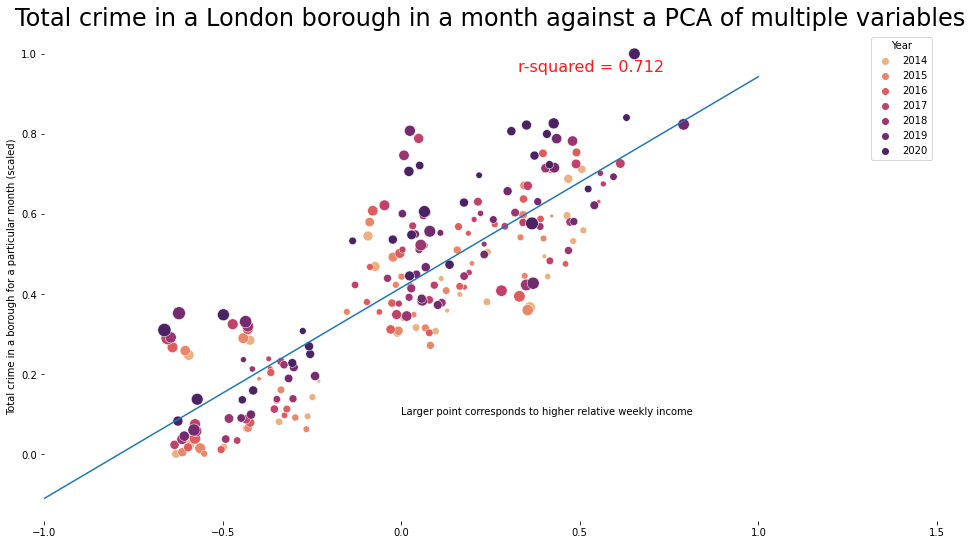

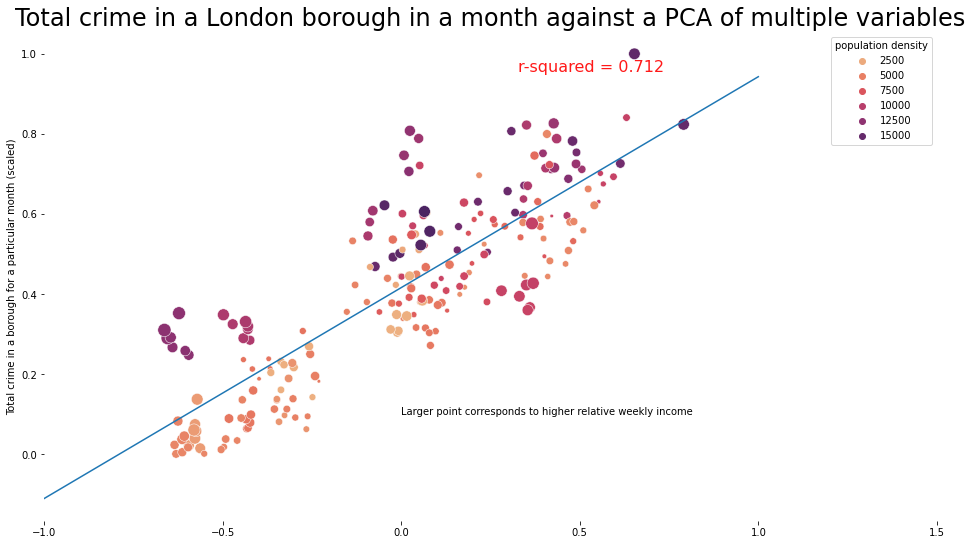

In [ ]:
# use the min max scaler to get a scaled average weekly income (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

scaled_income = full_df['Average Weekly Income'].values.reshape(-1,1)

scaled_income = MinMaxScaler().fit_transform(scaled_income)

# create a plot of the y_values and the pca x values, color them based on year, size based on the income
plt.rcParams["figure.figsize"] = (16,9)
g = sns.scatterplot(y=y_values, x=pca_x, hue=full_df['Year'], s=scaled_income*175, palette = "flare")

plt.plot(x_space, y_fit) # plot the model line

annotation = "r-squared = {:.3f}\n".format(r_squared)
g.annotate(annotation,xy=(0.45, 0.75),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=16, color="red",alpha = 0.9) # annotate the plot

# add a title and change the size
plt.title("Total crime in a London borough in a month against a PCA of multiple variables",fontsize = 24)
plt.rcParams["figure.figsize"] = (16,9)

plt.ylabel("Total crime in a borough for a particular month (scaled)")

g.spines['top'].set_visible(False) # remove all spines
g.spines['right'].set_visible(False)
g.spines['bottom'].set_visible(False)
g.spines['left'].set_visible(False)

plt.xlim([-1,1.5]) # set an x limit

g.annotate("Larger point corresponds to higher relative weekly income",xy=(0, 0.1))

plt.savefig('ReportImages/PCA=Plot1.png', bbox_inches='tight')
plt.show()

# repeat the previous process but colour is density

g = sns.scatterplot(y=y_values, x=pca_x,hue=full_df['population density'], s=scaled_income*175, palette ="flare")

plt.plot(x_space, y_fit)

g.annotate(annotation,xy=(0.45, 0.75),  
xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', 
fontsize=16, color="red",alpha = 0.9)
plt.title("Total crime in a London borough in a month against a PCA of multiple variables",fontsize = 24);
plt.rcParams["figure.figsize"] = (16,9)

plt.ylabel("Total crime in a borough for a particular month (scaled)")

g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['bottom'].set_visible(False)
g.spines['left'].set_visible(False)

plt.xlim([-1,1.5])

g.annotate("Larger point corresponds to higher relative weekly income",xy=(0, 0.1))

plt.savefig('ReportImages/PCA=Plot2.png', bbox_inches='tight')
plt.show()


The prototype models demonstrate that we can predict crime using some linear model and a collection of variables. This information will be used to create a formal model later in the document.



# Building a linear model with Sci-Kit Learn

To create the model, I will first scale the values (as we did in previous sections)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


values = pca.loc[:,].values

values = MinMaxScaler().fit_transform(values)


X = values[:,1:]
y = values[:,0]

In [ ]:
X

array([[0.71479928, 0.13642214, 0.        , ..., 0.        , 0.21384689,
        0.68918919],
       [0.26003595, 0.89189189, 0.65645004, ..., 0.1971316 , 0.14879895,
        0.5990991 ],
       [0.22768125, 0.2979408 , 0.18845743, ..., 0.03723226, 0.10931394,
        0.33333333],
       ...,
       [0.47753146, 0.85199485, 0.73452782, ..., 0.22783147, 0.90975209,
        0.37387387],
       [0.31276213, 0.55469755, 0.51306311, ..., 0.21508171, 0.34303494,
        0.34234234],
       [0.24925105, 0.86486486, 0.86597666, ..., 0.35176817, 0.49592977,
        0.        ]])

In [ ]:
# For the final model, we use the 3 components for 70% explained variance

from sklearn.decomposition import PCA


pca_model = PCA(n_components=3)
pca_model.fit(X)

pca_x_2= pca_model.transform(X)


In [ ]:
pca_x_2

array([[-2.30567907e-01, -6.94713290e-02,  7.61999549e-01],
       [ 4.10406933e-01, -2.24184694e-01,  1.25096969e-01],
       [-3.42077803e-01, -2.60504789e-01,  1.11139829e-01],
       [ 4.00924058e-01,  1.40291511e-02,  3.00692595e-01],
       [-1.10391794e-02, -3.83714377e-01, -1.48724505e-01],
       [-9.30776386e-02,  3.90163829e-01,  7.03018774e-02],
       [ 5.09955489e-01, -3.12082306e-01,  8.03843962e-02],
       [ 4.81623596e-01, -1.11255447e-01,  3.19497312e-01],
       [ 1.63914907e-01, -2.52201545e-01,  2.59936853e-01],
       [ 9.63500536e-02, -1.32882707e-01,  3.97846079e-01],
       [ 2.42172704e-01,  4.20613779e-01,  2.71939687e-01],
       [-4.23609232e-01,  3.28984718e-01, -1.35888224e-01],
       [ 1.12106362e-01,  1.08746407e-01,  3.54182705e-01],
       [-2.61987139e-01, -1.36882373e-01, -1.76272798e-02],
       [-2.48479882e-01, -3.56392231e-01,  2.51673564e-01],
       [-1.34560132e-03, -3.48143227e-01,  2.54223483e-01],
       [ 4.74053178e-03, -2.05556068e-01

### Multi-variate linear regression with train/test split

Firstly, I will attempt to create a linear regression model using a train/test split size of 0.2.

Accuracy = 0.83
Co: 
 [ 0.06318254  0.72177841 -0.14479934  0.05853063  0.22819998  0.2838852
  0.03767701]
Intercept: 
 -0.10955597356964047


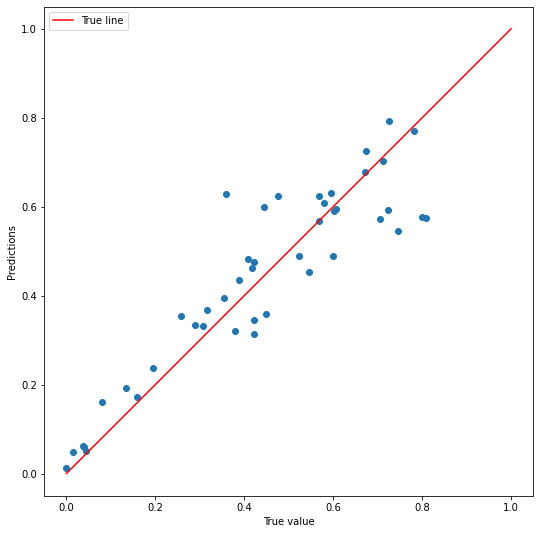

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)  # create a 20/80 split of the data

from sklearn.linear_model import LinearRegression # import the model

linear = LinearRegression().fit(X_train, y_train) # fit the model to the training sets

acc = linear.score(X_test,y_test) # get an accuracy score from the test sets

print("Accuracy = {:.2f}".format(acc))
print("Co: \n", linear.coef_)
print("Intercept: \n", linear.intercept_) # print the important values

predictions = linear.predict(X_test) # predict the X_test values

# plot the true values vs predictions
plt.scatter(y_test, predictions);
plt.ylabel("Predictions")
plt.xlabel("True value")
plt.plot([0, 1], [0, 1], c = "r", label="True line");
plt.legend()
plt.axis('scaled')

plt.savefig('ReportImages/LinearReg=MultiVariate-20-80-split.png', bbox_inches='tight')
plt.show();

This model performs fairly well at 0.82 accuracy. Since the data is quite noisy this is quite a good score and was better than expected.

### Linear regression using PCA values with train/test split

Next we will try the same, using the PCA values

Accuracy = 0.81
Co: 
 [[ 0.52681218  0.2449847  -0.04858637]]
Intercept: 
 [0.41511056]


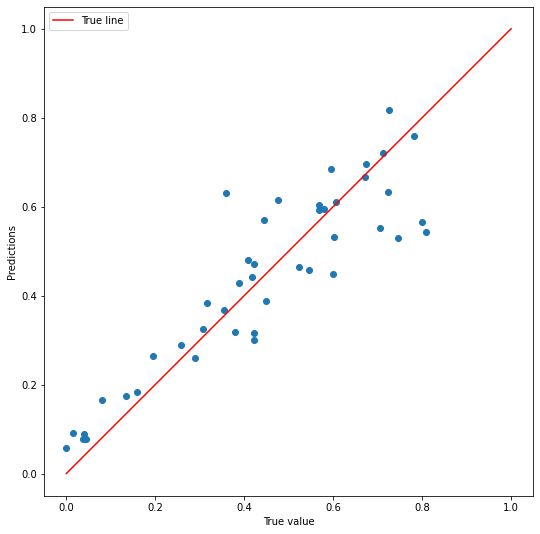

In [ ]:
from sklearn.model_selection import train_test_split

#pca_x_2 = pca_x_2.reshape(-1,1)
y_values = y_values.reshape(-1, 1) # reshape the data otherwise it will not work

X_train, X_test, y_train, y_test = train_test_split(pca_x_2 , y_values, test_size=0.2,random_state = 10) # create a 20/80 split of the data

from sklearn.linear_model import LinearRegression # import the model

linear = LinearRegression().fit(X_train, y_train) # fit the model to the training sets

acc = linear.score(X_test,y_test) # get an accuracy score from the test sets

print("Accuracy = {:.2f}".format(acc))
print("Co: \n", linear.coef_)
print("Intercept: \n", linear.intercept_) # print the important values

predictions = linear.predict(X_test) # predict the X_test values

# plot the true values vs predictions
plt.scatter(y_test, predictions);
plt.ylabel("Predictions")
plt.xlabel("True value")
plt.plot([0, 1], [0, 1], c = "r", label="True line");
plt.legend()
plt.axis('scaled')

plt.savefig('ReportImages/LinearReg=PCA-20-80-split.png', bbox_inches='tight')
plt.show();


Clearly, this model performs a little worse than the previous model.

### Mulit-variate linear regression with cross validation

In order to better improve our model, we will use a 10 fold cross validation.

In [ ]:
folds = 10 # define number of folds to use

CV scores:  [0.78756011 0.80323563 0.806616   0.88612379 0.75117564 0.88737599
 0.9270829  0.72586903 0.73984927 0.70269995]
Median CV score:  0.7953978673365816
Mean CV score:  0.8017588290536709
Standard deviation:  0.07234958070096704


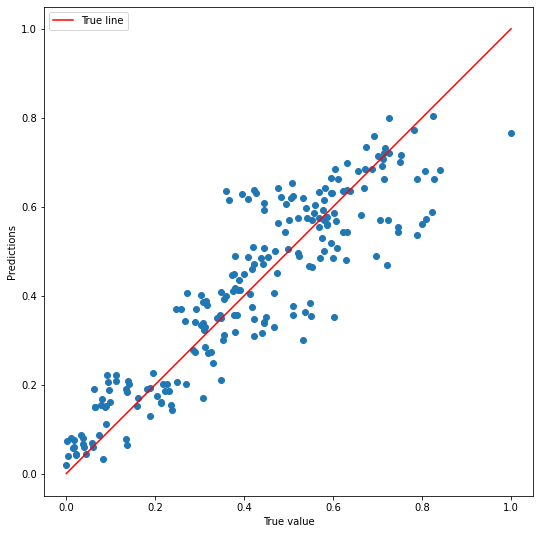

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression() # import and create model

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics # import cross validation requirements

scores = cross_val_score(linear, X, y, cv = folds) # score the model using CV

print("CV scores: " , scores)
print("Median CV score: ", np.median(scores))
print("Mean CV score: ", scores.mean())
print("Standard deviation: ",scores.std()) # print important values


predictions = cross_val_predict(linear, X, y, cv = folds) # predict values of cross validation

# plot the true values vs predictions
plt.scatter(y, predictions);
plt.ylabel("Predictions")
plt.xlabel("True value")
plt.plot([0, 1], [0, 1], c = "r", label="True line");
plt.legend()
plt.axis('scaled')

plt.savefig('ReportImages/LinearReg=MultiVariate-CV.png', bbox_inches='tight')
plt.show();

While the average score is lower than the previous train/test split model, we feel that this is a truer representation.

### Linear regression using PCA values with cross validation
We complete the same task using the PCA values.

CV scores:  [0.71790326 0.7784977  0.79884616 0.8517409  0.72614606 0.88151277
 0.90605454 0.67740959 0.7527199  0.75467642]
Median CV score:  0.766587062605431
Mean CV score:  0.7845507298643765
Standard deviation:  0.0708224681852986


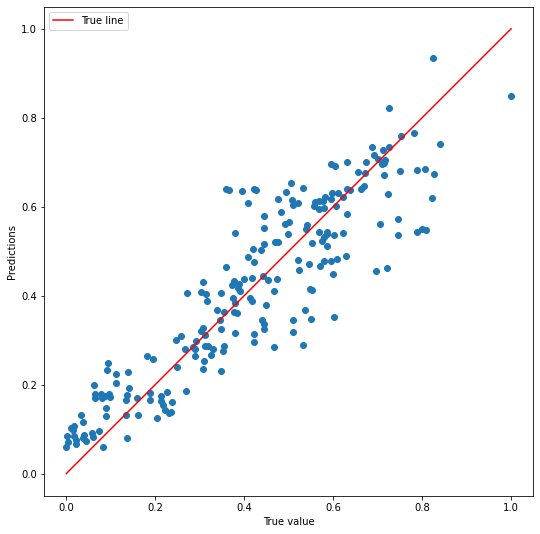

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()# import and create model

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics# import cross validation requirements

scores_2 = cross_val_score(linear, pca_x_2 , y_values, cv = folds)# score the model using CV

print("CV scores: " , scores_2)
print("Median CV score: ", np.median(scores_2))
print("Mean CV score: ", scores_2.mean())
print("Standard deviation: ",scores_2.std()) # print important values

predictions = cross_val_predict(linear, pca_x_2 , y_values, cv = folds) # predict values of cross validation

# plot the true values vs predictions
plt.scatter(y_values, predictions);
plt.ylabel("Predictions")
plt.xlabel("True value")
plt.plot([0, 1], [0, 1], c = "r", label="True line");
plt.legend()
plt.axis('scaled')

plt.savefig('ReportImages/LinearReg=PCA-CV.png', bbox_inches='tight')
plt.show();

This model performs quite a bit worse than the other model, and considerably worse than the train/test split version.  
  
  

Let us now investigate the scores using a boxplot.

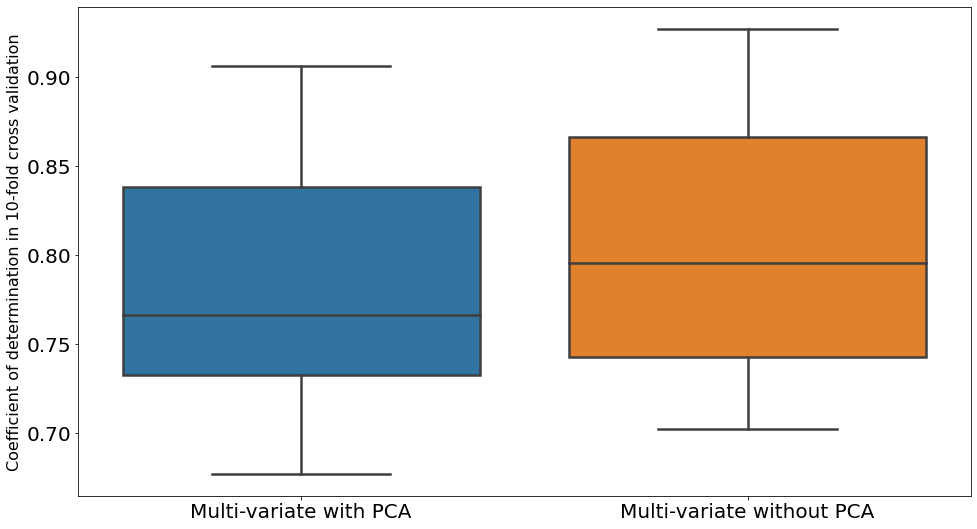

In [ ]:
#plot the cv scores as a boxplot

cv_scores = {'Multi-variate with PCA': scores_2, 'Multi-variate without PCA': scores,}#create dictionary of the two scores with labels
cv_scores = pd.DataFrame(data=cv_scores) # convert to a dataframe

#plot the data
box = sns.boxplot(data=cv_scores, linewidth=2.5)
box.tick_params(labelsize=20)
box.set_ylabel("Coefficient of determination in 10-fold cross validation", fontsize = 16)

plt.savefig('ReportImages/LinearReg=CV-scores', bbox_inches='tight')
plt.show();

The boxplots show clearly that we should select the multi-variate model over the PCA model. The PCA model has a similar range than the multi-variate model. In addition, we see that the multi-variate scores are higher, on average and has the highest maximum score- close to 93%.

Therefore, we would choose to utilise the multi-variate model, which has a mean score of 80% accuracy.

In [ ]:
from scipy import stats

print(stats.ttest_ind(a=scores_2, b=scores, equal_var=True))


Ttest_indResult(statistic=-0.509901406480881, pvalue=0.6163157630214436)


# Building a forecasting model with statsmodels

Implementation of code found here: https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb

https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

* Decompose to check for seasonality - Done earlier in EDA
* Check for stationarity: Augmented Dickey-Fuller Test
    * Make data stationary

* Build model
    * Seasonal auto-regressive integrated moving average (SARIMA)

In [ ]:
# Create df for forecasting model

monthly = crime_df.groupby('Month')
monthly = monthly.count()
monthly = monthly.reset_index()

monthly['countx10^3'] = monthly["Crime type"] / 1000

monthly["Month"] = pd.to_datetime(monthly["Month"])

forecast_df = monthly[["Month", "countx10^3"]]

forecast_df.set_index("Month", inplace=True)
forecast_df = forecast_df["2014-01-01":"2021-12-01"].resample("M").sum()

forecast_df.head()

countx10^3
Month                 
2014-01-31      74.109
2014-02-28      68.685
2014-03-31      78.517
2014-04-30      74.011
2014-05-31      78.290

In [ ]:
y = forecast_df["countx10^3"]

y.head()

Month
2014-01-31    74.109
2014-02-28    68.685
2014-03-31    78.517
2014-04-30    74.011
2014-05-31    78.290
Freq: M, Name: countx10^3, dtype: float64

In [ ]:
"""
Test for stationarity with Augmented Dickey-Fuller Test - not needed for SARIMA model, deals with seasonality itself.
"""

from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries):
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))


ADF_test(y)

Test statistic = 1.020
P-value = 0.994
Critical values :
	1%: -3.526004646825607 - The data is not stationary with 99% confidence
	5%: -2.9032002348069774 - The data is not stationary with 95% confidence
	10%: -2.5889948363419957 - The data is not stationary with 90% confidence


In [ ]:
"""
To stationarise data, first detrend by removing underlying trend with subtracting the 12 month rolling average from the data.
Then remove the seasonal pattern by by subtracting value from 12 months ago (12 month lag).
"""

# Stationarise data with detrending and differencing

y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

ADF_test(y_12lag_detrend)  # Stationary with 99 % confidence

Test statistic = -4.251
P-value = 0.001
Critical values :
	1%: -3.5714715250448363 - The data is  stationary with 99% confidence
	5%: -2.922629480573571 - The data is  stationary with 95% confidence
	10%: -2.5993358475635153 - The data is  stationary with 90% confidence


In [ ]:
# Split data into train and test at the end of 2018.

y_to_train = y[:'2018-12-31'] # dataset to train
y_to_test = y['2019-01-31':] # Months for test  
predict_date = len(y) - len(y[:'2019-01-31']) # the number of data points for the test set

In [ ]:
y_to_train.tail(2)

Month
2018-11-30    89.686
2018-12-31    85.327
Freq: M, Name: countx10^3, dtype: float64

In [ ]:
y_to_test.head(2)

Month
2019-01-31    86.670
2019-02-28    84.648
Freq: M, Name: countx10^3, dtype: float64

In [ ]:
"""
A grid search is conducted to find the best parameters for the SARIMA model.

Returns variables (p, d, q)x(P, D, Q, m) where:
    Lower case letters are trend elements, capital letters for seasonal elements
    p and P = Number of autoregressive terms (lags)
    d and D = Differencing to stationarise data
    q and Q = Number of moving averge terms
    m = Seasonal length
    
Evaluation metric is the Akaike Information Criterion (AIC) - used when there's no out-of-sample data.
    https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced

To improve model, could extend grid search to include p, d, q = 2.
"""

# Grid search for SARIMA model
import itertools
import statsmodels.api as sm

params = []
params_seasonal = []
AICs = []

def sarima_grid_search(y,seasonal_period):

    p = d = q = range(0, 2)  # Increase to (0, 3) ? - doesn't converge
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
        
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                params.append(param)
                params_seasonal.append(param_seasonal)
                AICs.append(results.aic)

            except:
                results = mod.fit()
    print('The set of parameters with the minimum AIC {} is: SARIMA{}x{}'.format(results.aic, param, param_seasonal))

    return param, param_seasonal

param, param_seasonal = sarima_grid_search(y, 12)

/root/venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/root/venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

The set of parameters with the minimum AIC 340.51717704381 is: SARIMA(1, 1, 1)x(1, 1, 1, 12)


In [ ]:
info = pd.DataFrame(list(zip(params, params_seasonal, AICs)), columns = ["(p, d, q)", "(P, D, Q, m)", "AIC"])

In [ ]:
info.sort_values(by=["AIC"], inplace=True)

In [ ]:
info.head()

(p, d, q)   (P, D, Q, m)         AIC
63  (1, 1, 1)  (1, 1, 1, 12)  340.517177
59  (1, 1, 1)  (0, 1, 1, 12)  341.929238
31  (0, 1, 1)  (1, 1, 1, 12)  343.386535
27  (0, 1, 1)  (0, 1, 1, 12)  344.531023
62  (1, 1, 1)  (1, 1, 0, 12)  346.321477

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4426      0.133      3.338      0.001       0.183       0.703
ma.L1         -1.0000    206.262     -0.005      0.996    -405.267     403.267
ar.S.L12      -0.5305      0.342     -1.549      0.121      -1.202       0.141
ma.S.L12      -0.3513      0.330     -1.065      0.287      -0.998       0.295
sigma2        17.8217   3677.722      0.005      0.996   -7190.382    7226.025


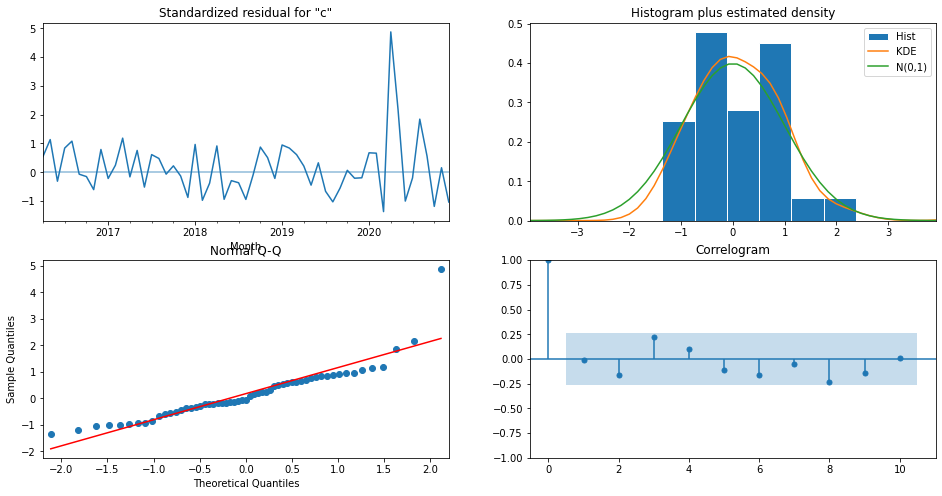

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 5.7


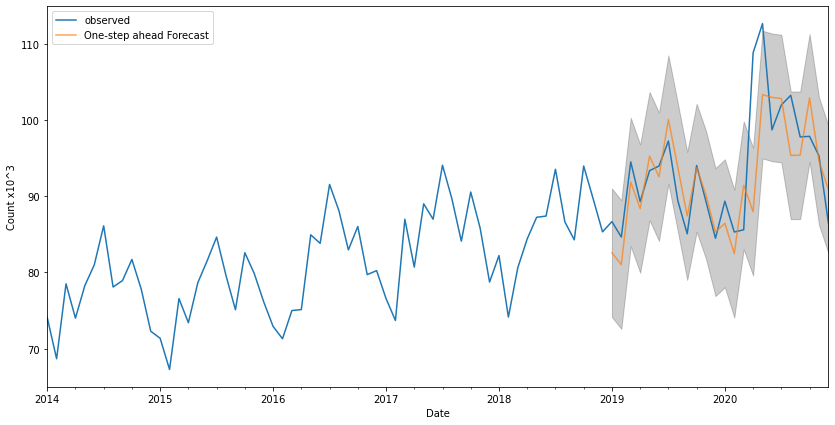

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 6.69


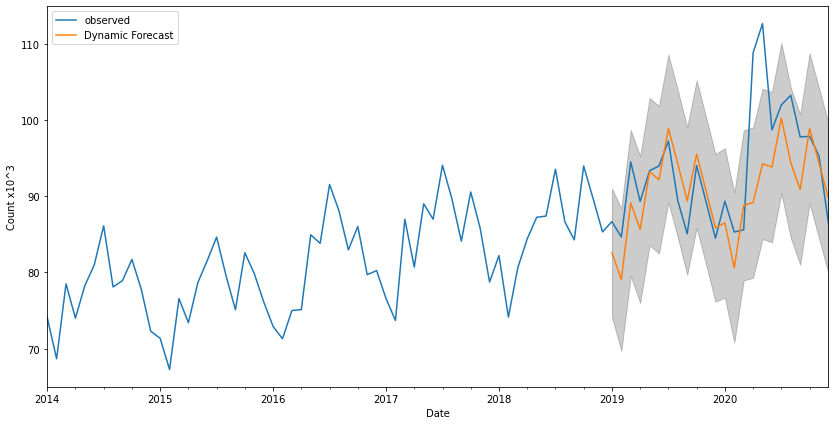

In [ ]:
"""
Once parameters found, build SARIMA models to compare dynamic = True and Falase.
    https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

True gives a dynamic forecast model
    Model predicts value (t+1), then for next step, t+2, the t+1 value is appended to the dataset,
    re-fits the model on the new expanded data and makes the t+2 step prediction. This continues.
        out-of-sample prediction
False gives a one-step-ahead model
    Model predicts one step ahead using the true value from the previous step rather than the
    forecasted time step.
        In-sample prediction
    Therefore expect to give better accuracy

Function returns four plots to analyse input:
    Residual plot
        Do not want to see seasonality in plot
    KDE histogram
        Want normally distributed residuals
    Quantile-quantile (Q-Q) plot
        Ordered distribution of residuals
        Would follow line exactly if data followed N(0, 1) distribution
        Our plot may have slight right scew, due to COVID
    Correlogram
        Correltion between the time series residuals and the lagged version of themselves
"""

# Build models

import statsmodels.api as sm

def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    
    # Fit model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    diagnostics = results.plot_diagnostics(figsize=(16, 8))

    plt.savefig('ReportImages/Forecast=ResultsDiagnostics.png', bbox_inches='tight')
    plt.show()
    
    # Dynamic=False argument ensures that we produce one-step ahead forecast
    # Forecasts at each point is generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()  # MSE used to compare models
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Count x10^3')
    plt.legend()

    plt.savefig('ReportImages/Forecast=OneStepAhead.png', bbox_inches='tight')
    plt.show()

    # Dynamic forecast 
    # Only use information from the time series up to a certain point, 
    # After that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Count x10^3')

    plt.legend()
    
    plt.savefig('ReportImages/Forecast=Dynamic.png', bbox_inches='tight')
    plt.show()
    
    return (results)

model = sarima_eva(y, param, param_seasonal, 12, "2019-01-31", y_to_test)

Standardised residual (top left) shows residuals over time - less seasonality seen here the better, should have all been removed.

Kernel Density Estimation (top right) is the distribution of residuals plotted against a normal distribution of mean 0 and s.d 1. Would like the residuals to be normally distributed and centered around zero. Our data is slightly shifted, perhaps due to the COVID spike in crime count.

Q-Q plot (bottom left) is the ordered distribution of residuals - highlights issue with COVID crime count.

Correlogram (bottom right) visualises autocorrelation, showing that the residuals have a low correlation with the lagged data.

In [ ]:
"""
Build forecast model using Dynamic=True, as will not have in-sample datapoints in the future.
Grey area is 95 % confidence interval based upon the normal distribution of the results
"""

def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()

    plt.savefig('ReportImages/Forecast=24MonthPredictions.png', bbox_inches='tight')
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    #return (final_table)  # Hash out if table not wanted

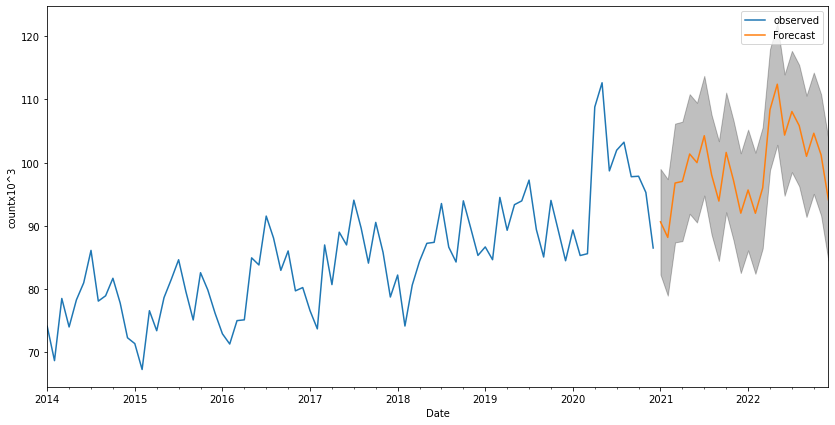

In [ ]:
forecast(model, 24, y)  # Number = number of predictive steps into the future

# KNN classifier 

## KNN - No Normalization

first calculate mean and standard deviation of the crime counts. using this the boundarys for our classes can by made by addinng/ subtracting the standard deviation from the mean

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/datasets/noncrime/All_Data_2011-2020.csv')
df.head()

Year                   Area  Crime Count Affordable Housing Supply  \
0  2011  Barking and Dagenham         28875                       384   
1  2011                Barnet         40123                       666   
2  2011                Bexley         20026                       357   
3  2011                 Brent         45232                       852   
4  2011               Bromley         33747                       394   

  Working age population  Percent Economically Inactive  \
0                 119100                           28.6   
1                 234200                           24.7   
2                 146100                           23.2   
3                 218900                           30.8   
4                 199100                           21.9   

   percent no qualifications  percent NVQ1  percent NVQ2  percent NVQ3  \
0                       13.9          15.6          16.7          12.2   
1                        6.1           8.3          12.4          12.4   
2                        8.6          18.0          18.7          18.3   
3                       11.2           8.9          11.7          15.4   
4                        7.5          11.3          14.2          16.6   

   percent NVQ4+  percent other qualifications  House sales volume        HPI  \
0           26.9                          11.5                5832  74.278333   
1           50.4                           9.4               15632  73.470000   
2           27.2                           7.0               10180  76.665000   
3           30.2                          21.0                8764  70.686667   
4           43.5                           5.3               17340  73.721667   

   Average property price  population  Average Weekly Income  
0             163465.0833      187029                  452.1  
1             338978.0000      357538                  498.3  
2             200672.0833      232774                  505.1  
3             298964.4167      312245                  414.9  
4             274874.5000      310554                  551.7

In [ ]:
#calcuate standard deviaion and find boundry 1sd above and below the mean
crime = df['Crime Count']
s = np.std(crime)
m = np.mean(crime)
m, s 

low_bound = m - s
high_bound = m + s
m, s, low_bound, high_bound

(32863.2, 12146.910780009048, 20716.289219990947, 45010.11078000905)

In [ ]:
#Crime Group is labled accrodign to what boundary the crime count fits
#Low = below 1sd of mean, Average = between 1sd and -1sd around teh mean 
#High = above 1sd of mean
df.loc[df['Crime Count'] <= low_bound, 'Crime Group'] = 'Low'
df.loc[df['Crime Count'] > low_bound, 'Crime Group'] = 'Average'
df.loc[df['Crime Count'] >= high_bound, 'Crime Group'] = 'High'
df['Crime Group'].head()

0    Average
1    Average
2        Low
3       High
4    Average
Name: Crime Group, dtype: object

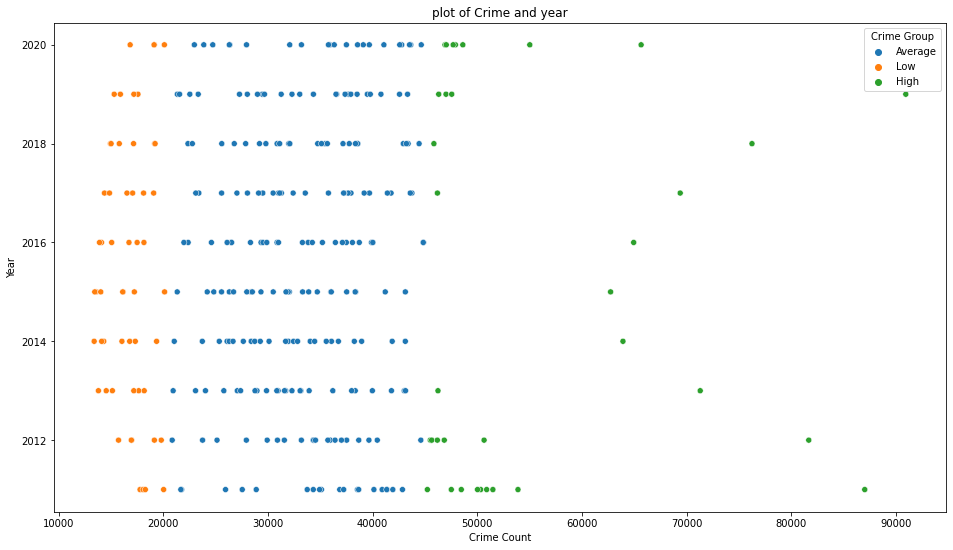

In [ ]:
"""scatter plot of year and crime count, and points coloured according to crime group"""

#plot scatter plot
sns.scatterplot(data = df, x = 'Crime Count', y = 'Year', hue = 'Crime Group').set(title='plot of Crime and year')

plt.savefig('Crime_year_split.png',bbox_inches='tight')

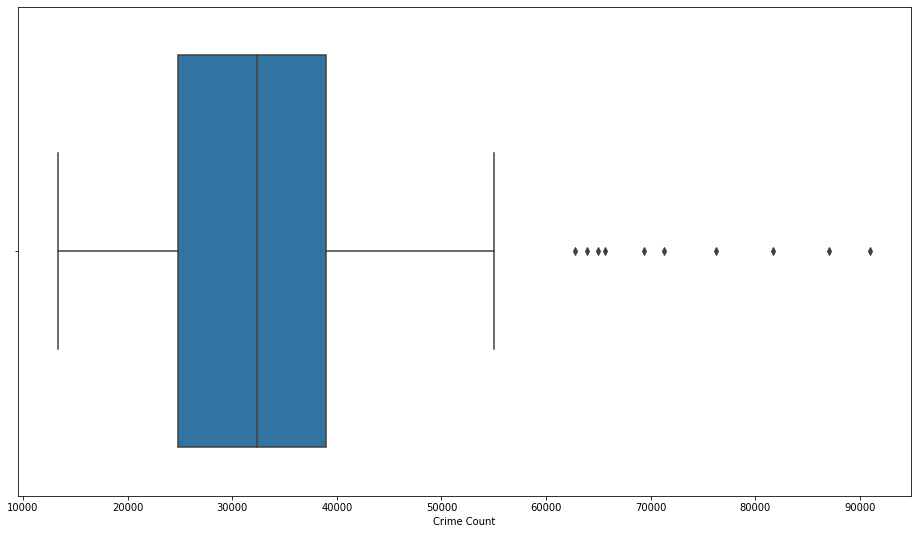

[Text(0.5, 1.0, 'plot of Crime and year')]

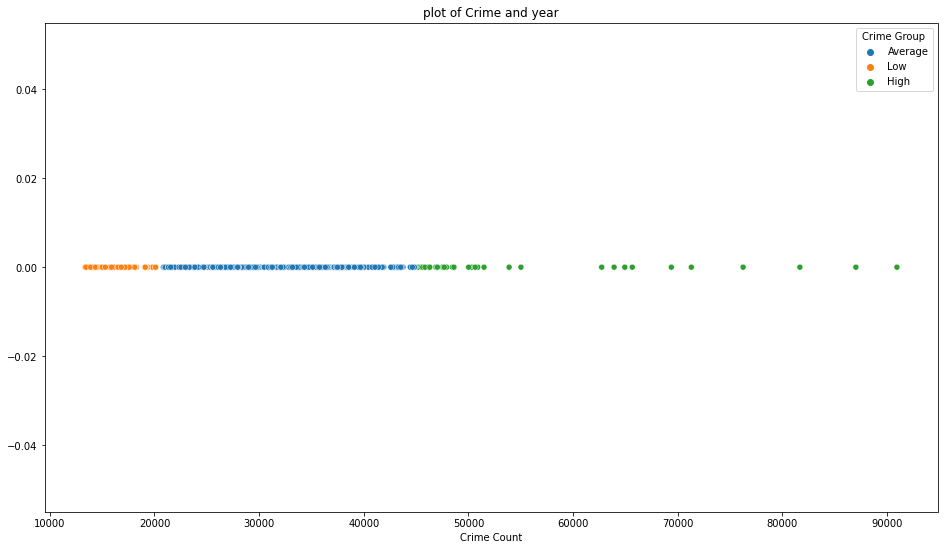

In [ ]:
sns.boxplot(data=df,x = 'Crime Count',  orient="h")
plt.show()
sns.scatterplot(data = df, x = 'Crime Count', y = 0, hue = 'Crime Group').set(title='plot of Crime and year')
#plt.savefig('crime_spread.png',bbox_inches='tight')

In [ ]:
"""crime count given value according Crime Group so classfication algorithm can be performed"""
df.loc[df['Crime Group'] == 'Low', 'Crime Count'] = 1
df.loc[df['Crime Group'] == 'Average', 'Crime Count'] = 2
df.loc[df['Crime Group'] == 'High', 'Crime Count'] = 3
df[['Crime Count','Crime Group']].head()

Crime Count Crime Group
0            2     Average
1            2     Average
2            1         Low
3            3        High
4            2     Average

In [ ]:
#more data cleaning to remove commas from values
df['Affordable Housing Supply'] = df['Affordable Housing Supply'].str.replace(',', '').astype(float)
df['Working age population'] = df['Working age population'].str.replace(',', '').astype(float)

In [ ]:

df = df.drop('Year', 1)
df = df.drop('Crime Group', 1)
df = df.drop('Area', 1)

In [ ]:
#create y as crime group and X all other features
X = df.iloc[:,1:].values
X = X.astype(np.float)
y = df['Crime Count'].values

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#fit X and y to knn and us 10-fold cross validation
from sklearn.model_selection import cross_val_score
knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')

print("mean accuracy of knn classifier:", knn_acc.mean())
knn_acc

mean accuracy of knn classifier: 0.803125


array([0.71875, 0.71875, 0.71875, 0.78125, 0.78125, 0.90625, 0.875  ,
       0.84375, 0.84375, 0.84375])

In [ ]:
from sklearn.model_selection import cross_val_score

knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
knn_f1 = cross_val_score(knn, X, y, cv=10, scoring = 'f1_weighted')
knn_roc_ovr = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovr_weighted')
knn_roc_ovo = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovo_weighted')



print("accuracy array:", knn_acc)
print("mean accuracy of knn classifier:", knn_acc.mean())
print("\n")
print("f1 score array:", knn_f1)
print("mean f1 score of knn classifier:", knn_f1.mean())
print("\n")
print("knn ROC-AUC (ovr) array:", knn_roc_ovr)
print("mean ROC-AUC (ovr) of knn classifier:", knn_roc_ovr.mean())
print("\n")
print("knn ROC-AUC (ovo) array:", knn_roc_ovo)
print("mean ROC-AUC (ovo) of knn classifier:", knn_roc_ovo.mean())


accuracy array: [0.71875 0.71875 0.71875 0.78125 0.78125 0.90625 0.875   0.84375 0.84375
 0.84375]
mean accuracy of knn classifier: 0.803125


f1 score array: [0.71778846 0.71964286 0.66691176 0.73259804 0.73728554 0.89696712
 0.86177083 0.81547181 0.82249557 0.8218254 ]
mean f1 score of knn classifier: 0.7792757393260087


knn ROC-AUC (ovr) array: [0.833483   0.81292367 0.74053198 0.78871251 0.88303985 0.89382854
 0.95858135 0.95287698 0.82721561 0.85895433]
mean ROC-AUC (ovr) of knn classifier: 0.8550147811758804


knn ROC-AUC (ovo) array: [0.86401721 0.83950408 0.74776381 0.82532269 0.87796365 0.89359715
 0.96409647 0.95721807 0.8261464  0.84327652]
mean ROC-AUC (ovo) of knn classifier: 0.8638906044137024


KNN Classifier has <b>80.3% accuracy</b>  with 10- fold cross validation with lowest accuracy being 71.8% and highest accuracy reaching 90.6%. This is under the following classifications:
* <b>Low Crime</b>: Crime Count <= 20716.289219990947
* <b>Average Crime</b>: 20716.289219990947 < Crime Count< 45010.11078000905
* <b>High Crime</b>: 45010.11078000905 < Crime Count





## KNN - Normalized
all features are normalied by mean normalization 

In [ ]:
#normalise all features in crime data set and save as normalised_df
normalized_df=(df-df.mean())/df.std()
#drop crime count as this doesnt need to be normalised
normalized_df = normalized_df.drop('Crime Count', 1) 
normalized_df.head()

Affordable Housing Supply  Working age population  \
0                   0.200790               -1.577766   
1                   1.171397                1.246289   
2                   0.107860               -0.915303   
3                   1.811584                0.870894   
4                   0.235209                0.385087   

   Percent Economically Inactive  percent no qualifications  percent NVQ1  \
0                       1.385199                   2.355829      2.447235   
1                       0.467372                  -0.393832      0.168287   
2                       0.114361                   0.487470      3.196479   
3                       1.902949                   1.404023      0.355598   
4                      -0.191582                   0.099697      1.104841   

   percent NVQ2  percent NVQ3  percent NVQ4+  percent other qualifications  \
0      1.437277     -0.391356      -2.199356                      1.130254   
1      0.296870     -0.319855      -0.048481                      0.414188   
2      1.967699      1.789422      -2.171898                     -0.404172   
3      0.111223      0.752659      -1.897318                      4.369596   
4      0.774250      1.181665      -0.680014                     -0.983844   

   House sales volume       HPI  Average property price  population  \
0           -1.623465 -1.420997               -1.381952   -1.425267   
1            0.838624 -1.462786               -0.554713    1.489764   
2           -0.531102 -1.297612               -1.206585   -0.643208   
3           -0.886848 -1.606678               -0.743308    0.715432   
4            1.267731 -1.449775               -0.856850    0.686523   

   Average Weekly Income  
0              -1.318285  
1              -0.726181  
2              -0.639031  
3              -1.795044  
4              -0.041801

In [ ]:
# X = normalised features, y = crime count
X = normalized_df.values
y = df['Crime Count'].values

#import knn classifier fit X and y to knn and us 10-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')

print("mean accuracy of knn classifier:", knn_acc.mean())
knn_acc

original_acc = knn_acc.mean()

knn_acc

mean accuracy of knn classifier: 0.86875


array([0.8125 , 0.8125 , 0.90625, 0.875  , 0.84375, 0.90625, 0.90625,
       0.90625, 0.875  , 0.84375])

In [ ]:
from sklearn.model_selection import cross_val_score

knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
knn_f1 = cross_val_score(knn, X, y, cv=10, scoring = 'f1_weighted')
knn_roc_ovr = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovr_weighted')
knn_roc_ovo = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovo_weighted')


print("accuracy array:", knn_acc)
print("mean accuracy of knn classifier:", knn_acc.mean())
print("\n")
print("f1 score array:", knn_f1)
print("mean f1 score of knn classifier:", knn_f1.mean())
print("\n")
print("knn ROC-AUC (ovr) array:", knn_roc_ovr)
print("mean ROC-AUC (ovr) of knn classifier:", knn_roc_ovr.mean())
print("\n")
print("knn ROC-AUC (ovo) array:", knn_roc_ovo)
print("mean ROC-AUC (ovo) of knn classifier:", knn_roc_ovo.mean())


accuracy array: [0.8125  0.8125  0.90625 0.875   0.84375 0.90625 0.90625 0.90625 0.875
 0.84375]
mean accuracy of knn classifier: 0.86875


f1 score array: [0.80078125 0.80673077 0.89787234 0.83193109 0.7871732  0.90055091
 0.89696712 0.8809949  0.85089962 0.8218254 ]
mean f1 score of knn classifier: 0.847572660004648


knn ROC-AUC (ovr) array: [0.90095878 0.94760813 0.91648707 0.88104185 0.97284226 0.92373512
 0.95506779 0.99193948 0.86177249 0.90531422]
mean ROC-AUC (ovr) of knn classifier: 0.9256767182171277


knn ROC-AUC (ovo) array: [0.90636322 0.95105865 0.88736979 0.84516531 0.9795856  0.92032948
 0.96180367 0.9931216  0.85556216 0.89970999]
mean ROC-AUC (ovo) of knn classifier: 0.9200069478754941


KNN Classifier has <b>86.8% accuracy</b>  with 10- fold cross validation with lowest accuracy being 81.2% and highest accuracy reaching 90.6%.

### Normalized KNN feature analysis

the 10 fold cross validation is tested for the abcence of each feature. the accuracy for each missing feature is compared with the original accuracy (with all features) to see how each feature influences the model. Thus contribution < 0 means the feature reduces accuracy of model and contribution > 0 means the feature increases the model accuracy.

contribution is calulated as accuracy(all features) - accuracy(withough feature)

In [ ]:
"""
Creates empty list with pred determined header at acc[0], list of all feature
names is created.
"""
acc = [['Feature Missing','accuracy (%)', 'Contribution (%)']]
features = normalized_df.columns

"""
by iterating every features name, a tempory df is created by droping that 
feature. knn classificatin is then performend and the accuracy (from cross validation)
as well as contribution is calculated and stored in acc
"""
for i in features:
    temp_df = normalized_df
    
    temp_df = temp_df.drop(i, 1)
    
    X = temp_df.values

    y = df['Crime Count'].values
    
    
    l = [i]
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()


    from sklearn.model_selection import cross_val_score
    knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    
    l.append(knn_acc.mean()*100)
    knn_acc = original_acc - knn_acc.mean()
    l.append(knn_acc*100)
    
    acc.append(l)

#display data frame orderd by contribtuion
df = pd.DataFrame(acc, columns = ['Feature Missing','accuracy (%)', 'Contribution (%)'])
df = df.iloc[1: , :]
df = df.sort_values(by = ['Contribution (%)'], ascending = False)
df


Feature Missing accuracy (%) Contribution (%)
14          Average Weekly Income       85.625             1.25
12         Average property price      85.9375           0.9375
7                    percent NVQ3        86.25            0.625
13                     population        86.25            0.625
2          Working age population       86.875              0.0
4       percent no qualifications       86.875              0.0
5                    percent NVQ1       86.875              0.0
8                   percent NVQ4+       86.875              0.0
3   Percent Economically Inactive      87.1875          -0.3125
6                    percent NVQ2      87.1875          -0.3125
1       Affordable Housing Supply      87.8125          -0.9375
9    percent other qualifications      87.8125          -0.9375
10             House sales volume      87.8125          -0.9375
11                            HPI      87.8125          -0.9375

a bar chart to display how each feature contributes to the accuracy of the KNN model. can see that average weekly income had the greatest positive contribution to the accuracy of the model. 

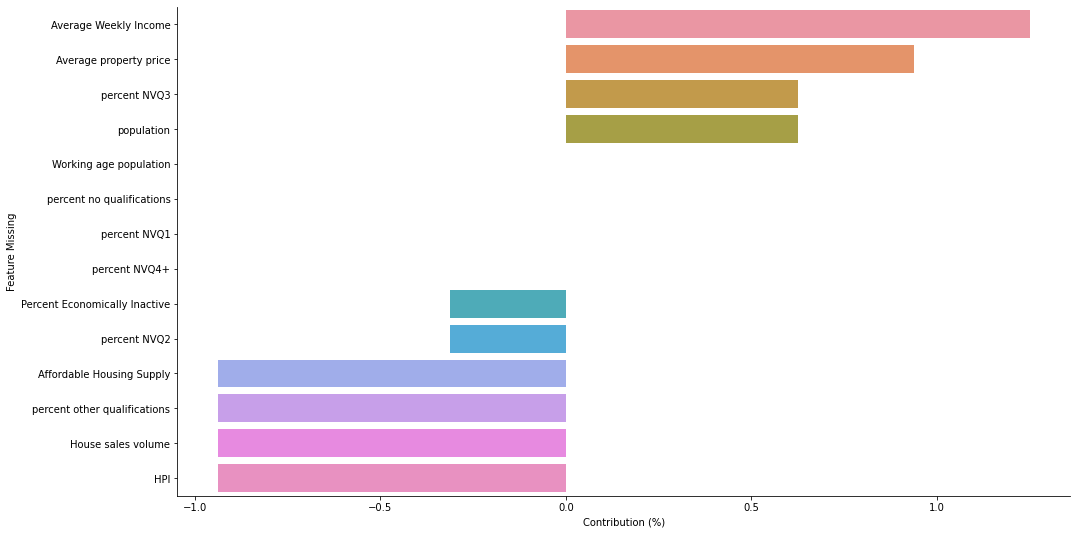

In [ ]:
#plot bar plot of contribution
sns.barplot( x='Contribution (%)',y='Feature Missing', data = df, orient = 'h')
sns.despine()
#plt.savefig('KNN_feature_analysis.png',bbox_inches='tight')

##### Improving features
when only using features that had a contribution (%) > - 0.5, the model acuracy was improved to 88.1 % 

In [ ]:
df = pd.read_csv('/datasets/noncrime/All_Data_2011-2020.csv')

#remove commas from features prone to error
df['Affordable Housing Supply'] = df['Affordable Housing Supply'].str.replace(',', '').astype(float)
df['Working age population'] = df['Working age population'].str.replace(',', '').astype(float)

#create df by filtering for disired features
df = df.filter(['Crime Count', 'Average Weekly Income', 'Average property price', 'percent NVQ3', 'population', 'Working age population', 'percent NVQ1', 'percent NVQ4+', 'percent no qualifications', 'Percent Economically Inactive', 'percent NVQ2'])

df.head()

Crime Count  Average Weekly Income  Average property price  percent NVQ3  \
0        28875                  452.1             163465.0833          12.2   
1        40123                  498.3             338978.0000          12.4   
2        20026                  505.1             200672.0833          18.3   
3        45232                  414.9             298964.4167          15.4   
4        33747                  551.7             274874.5000          16.6   

   population  Working age population  percent NVQ1  percent NVQ4+  \
0      187029                119100.0          15.6           26.9   
1      357538                234200.0           8.3           50.4   
2      232774                146100.0          18.0           27.2   
3      312245                218900.0           8.9           30.2   
4      310554                199100.0          11.3           43.5   

   percent no qualifications  Percent Economically Inactive  percent NVQ2  
0                       13.9                           28.6          16.7  
1                        6.1                           24.7          12.4  
2                        8.6                           23.2          18.7  
3                       11.2                           30.8          11.7  
4                        7.5                           21.9          14.2

In [ ]:

"""
previous normaliseation and grouping technique is applyed
"""
crime = df['Crime Count']
s = (np.std(crime))
m = np.mean(crime)
m, s  

low_bound = m - s
high_bound = m + s

df.loc[df['Crime Count'] <= low_bound, 'Crime Group'] = 'Low'
df.loc[df['Crime Count'] > low_bound, 'Crime Group'] = 'Average'
df.loc[df['Crime Count'] >= high_bound, 'Crime Group'] = 'High'

df.loc[df['Crime Group'] == 'Low', 'Crime Count'] = 1
df.loc[df['Crime Group'] == 'Average', 'Crime Count'] = 2
df.loc[df['Crime Group'] == 'High', 'Crime Count'] = 3

df = df.drop('Crime Group', 1)

normalized_df=(df-df.mean())/df.std()
normalized_df = normalized_df.drop('Crime Count', 1) 

In [ ]:
#y is Crime Count, and X is disierd normalised features
X = normalized_df.values
y = df['Crime Count'].values

#import knn classifier fit X and y to knn and us 10-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')

print("mean accuracy of knn classifier:", knn_acc.mean())
knn_acc

original_acc = knn_acc.mean()

knn_acc

mean accuracy of knn classifier: 0.88125


array([0.8125 , 0.8125 , 0.875  , 0.90625, 0.875  , 0.90625, 0.90625,
       0.96875, 0.875  , 0.875  ])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

knn_acc = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
knn_f1 = cross_val_score(knn, X, y, cv=10, scoring = 'f1_weighted')
knn_roc_ovr = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovr_weighted')
knn_roc_ovo = cross_val_score(knn, X, y, cv=10, scoring = 'roc_auc_ovo_weighted')


print("accuracy array:", knn_acc)
print("mean accuracy of knn classifier:", knn_acc.mean())
print("\n")
print("f1 score array:", knn_f1)
print("mean f1 score of knn classifier:", knn_f1.mean())
print("\n")
print("knn ROC-AUC (ovr) array:", knn_roc_ovr)
print("mean ROC-AUC (ovr) of knn classifier:", knn_roc_ovr.mean())
print("\n")
print("knn ROC-AUC (ovo) array:", knn_roc_ovo)
print("mean ROC-AUC (ovo) of knn classifier:", knn_roc_ovo.mean())
print("\n")


accuracy array: [0.8125  0.8125  0.875   0.90625 0.875   0.90625 0.90625 0.96875 0.875
 0.875  ]
mean accuracy of knn classifier: 0.88125


f1 score array: [0.76886364 0.80673077 0.86680871 0.8622449  0.85013889 0.90662879
 0.90055091 0.9668503  0.85089962 0.86904762]
mean f1 score of knn classifier: 0.8648764148507689


knn ROC-AUC (ovr) array: [0.81780043 0.87929423 0.93408304 0.92103688 0.97982804 0.9150959
 0.89725942 0.92776538 0.88349454 0.90435268]
mean ROC-AUC (ovr) of knn classifier: 0.9060010543415716


knn ROC-AUC (ovo) array: [0.77972147 0.86016757 0.93339561 0.89260643 0.98397588 0.91269531
 0.89740149 0.92357337 0.88344939 0.89905895]
mean ROC-AUC (ovo) of knn classifier: 0.8966045475131754




# Naive Bayes classifier

In [ ]:
df = pd.read_csv('/datasets/noncrime/All_Data_2011-2020.csv')

#remove commas from uncleaned feature
df['Affordable Housing Supply'] = df['Affordable Housing Supply'].str.replace(',', '').astype(float)
df['Working age population'] = df['Working age population'].str.replace(',', '').astype(float)
df.head()

#normalise all fetures and remove crime count from normalsied df
normalized_df=(df-df.mean())/df.std()
normalized_df = normalized_df.drop('Crime Count', 1) 
normalized_df

Affordable Housing Supply Area  Average Weekly Income  \
0                     0.200790  NaN              -1.318285   
1                     1.171397  NaN              -0.726181   
2                     0.107860  NaN              -0.639031   
3                     1.811584  NaN              -1.795044   
4                     0.235209  NaN              -0.041801   
..                         ...  ...                    ...   
315                  -0.787026  NaN              -0.149456   
316                   1.646374  NaN               1.738356   
317                   0.699861  NaN               0.555430   
318                   0.335023  NaN               2.532955   
319                  -0.102094  NaN               1.903684   

     Average property price       HPI  House sales volume  \
0                 -1.381952 -1.420997           -1.623465   
1                 -0.554713 -1.462786            0.838624   
2                 -1.206585 -1.297612           -0.531102   
3                 -0.743308 -1.606678           -0.886848   
4                 -0.856850 -1.449775            1.267731   
..                      ...       ...                 ...   
315               -0.367262  1.105685           -0.782335   
316                0.044239  0.655570           -0.174350   
317               -0.025627  1.626065           -0.803439   
318                0.723385  0.434347            1.066744   
319                2.380396 -0.170344           -1.276763   

     Percent Economically Inactive  Working age population      Year  \
0                         1.385199               -1.577766 -1.564249   
1                         0.467372                1.246289 -1.564249   
2                         0.114361               -0.915303 -1.564249   
3                         1.902949                0.870894 -1.564249   
4                        -0.191582                0.385087 -1.564249   
..                             ...                     ...       ...   
315                      -1.250614               -1.251442  1.564249   
316                      -0.379854                1.295361  1.564249   
317                      -0.544593                0.161813  1.564249   
318                      -2.333180                1.344432  1.564249   
319                       0.161429               -0.292097  1.564249   

     percent NVQ1  percent NVQ2  percent NVQ3  percent NVQ4+  \
0        2.447235      1.437277     -0.391356      -2.199356   
1        0.168287      0.296870     -0.319855      -0.048481   
2        3.196479      1.967699      1.789422      -2.171898   
3        0.355598      0.111223      0.752659      -1.897318   
4        1.104841      0.774250      1.181665      -0.680014   
..            ...           ...           ...            ...   
315     -0.487301      0.111223      0.252152       0.363389   
316     -0.737049     -1.586127     -0.820361       0.994923   
317      0.386816     -0.021383     -0.141103       0.546442   
318     -1.455073     -1.214832     -1.392369       1.983410   
319     -1.736040     -2.302196      0.109151       1.315266   

     percent no qualifications  percent other qualifications  population  
0                     2.355829                      1.130254   -1.425267  
1                    -0.393832                      0.414188    1.489764  
2                     0.487470                     -0.404172   -0.643208  
3                     1.404023                      4.369596    0.715432  
4                     0.099697                     -0.983844    0.686523  
..                         ...                           ...         ...  
315                  -0.323327                     -1.052040   -1.071754  
316                   0.593226                     -0.199582    1.052635  
317                  -0.957865                     -1.154335    0.111856  
318                  -1.627654                     -0.881549    1.014442  
319                  -0.852108                      1.062057   -0.00

In [ ]:
"""
Split crime count according to low, average and high classification in accordance
to 1 standard devtion above and below the mean.
"""
crime = df['Crime Count']
s = (np.std(crime))
m = np.mean(crime)
m, s  

low_bound = m - s
high_bound = m + s

df.loc[df['Crime Count'] <= low_bound, 'Crime Group'] = 'Low'
df.loc[df['Crime Count'] > low_bound, 'Crime Group'] = 'Average'
df.loc[df['Crime Count'] >= high_bound, 'Crime Group'] = 'High'

print(df['Crime Group'].head() )
print("mean = ", m)
low_bound, high_bound

0    Average
1    Average
2        Low
3       High
4    Average
Name: Crime Group, dtype: object
mean =  32863.2


(20716.289219990947, 45010.11078000905)

[Text(0.5, 1.0, 'plot of Crime and year')]

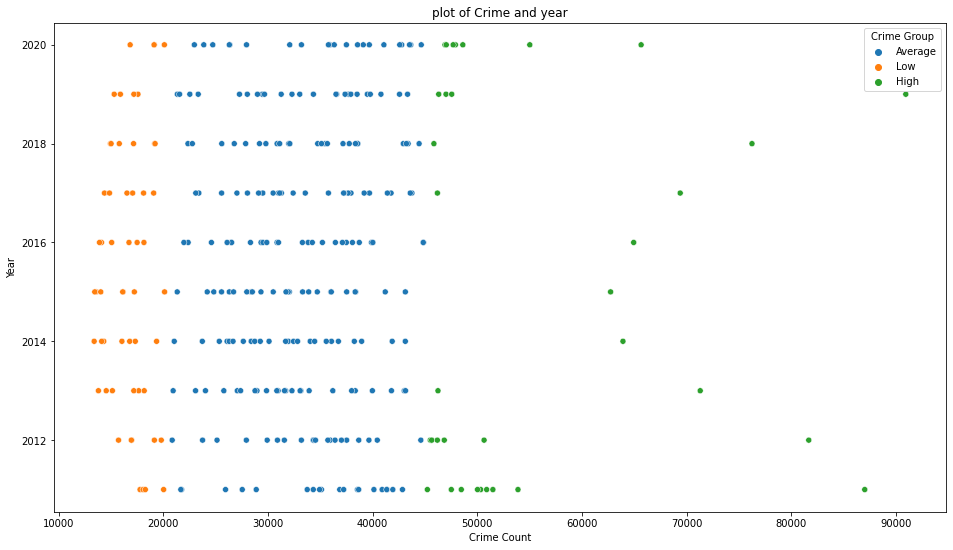

In [ ]:
#plot scatter plot with coloring by crime group
sns.scatterplot(data = df, x = 'Crime Count', y = 'Year', hue = 'Crime Group').set(title='plot of Crime and year')

In [ ]:
#assign number to crime group to allow classification
df.loc[df['Crime Group'] == 'Low', 'Crime Count'] = 1
df.loc[df['Crime Group'] == 'Average', 'Crime Count'] = 2
df.loc[df['Crime Group'] == 'High', 'Crime Count'] = 3
df[['Crime Count','Crime Group']].head()

Crime Count Crime Group
0            2     Average
1            2     Average
2            1         Low
3            3        High
4            2     Average

In [ ]:
#remove year and area and display all names of features used
normalized_df = normalized_df.drop('Year', 1)
normalized_df = normalized_df.drop('Area', 1)
normalized_df.columns

Index(['Affordable Housing Supply', 'Average Weekly Income',
       'Average property price', 'HPI', 'House sales volume',
       'Percent Economically Inactive', 'Working age population',
       'percent NVQ1', 'percent NVQ2', 'percent NVQ3', 'percent NVQ4+',
       'percent no qualifications', 'percent other qualifications',
       'population'],
      dtype='object')

In [ ]:
# X = normalised features, y = crime count
X = normalized_df.values
y = df['Crime Count'].values

#import nave bayes classifier fit X and y to knn and us 10-fold cross validation
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
from sklearn.model_selection import cross_val_score
NB_acc = cross_val_score(NB, X, y, cv=10, scoring = 'accuracy')

print("mean accuracy of NB classifier:", NB_acc.mean())
NB_acc

original_acc = NB_acc.mean()

NB_acc

mean accuracy of NB classifier: 0.79375


array([0.75   , 0.8125 , 0.78125, 0.71875, 0.84375, 0.8125 , 0.8125 ,
       0.84375, 0.78125, 0.78125])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

NB_acc = cross_val_score(NB, X, y, cv=10, scoring = 'accuracy')
NB_f1 = cross_val_score(NB, X, y, cv=10, scoring = 'f1_weighted')
NB_roc_ovr = cross_val_score(NB, X, y, cv=10, scoring = 'roc_auc_ovr_weighted')
NB_roc_ovo = cross_val_score(NB, X, y, cv=10, scoring = 'roc_auc_ovo_weighted')


print("accuracy array:", NB_acc)
print("mean accuracy of Naive Bayes classifier:", NB_acc.mean())
print("\n")
print("f1 score array:", NB_f1)
print("mean f1 score of Naive Bayes classifier:", NB_f1.mean())
print("\n")
print("Naive Bayes ROC-AUC (ovr) array:", NB_roc_ovr)
print("mean ROC-AUC (ovr) of Naive Bayes classifier:", NB_roc_ovr.mean())
print("\n")
print("Naive Bayes ROC-AUC (ovo) array:", NB_roc_ovo)
print("mean ROC-AUC (ovo) of Naive Bayes classifier:", NB_roc_ovo.mean())
print("\n")


accuracy array: [0.75    0.8125  0.78125 0.71875 0.84375 0.8125  0.8125  0.84375 0.78125
 0.78125]
mean accuracy of Naive Bayes classifier: 0.79375


f1 score array: [0.77575549 0.81854083 0.78194444 0.71748066 0.82599936 0.81006494
 0.81770833 0.85221499 0.78443649 0.79076577]
mean f1 score of Naive Bayes classifier: 0.7974911299131567


Naive Bayes ROC-AUC (ovr) array: [0.79920517 0.89186837 0.81313089 0.80279251 0.94130291 0.88256448
 0.9088955  0.94704861 0.82986111 0.92072459]
mean ROC-AUC (ovr) of Naive Bayes classifier: 0.8737394149193719


Naive Bayes ROC-AUC (ovo) array: [0.76086957 0.89917346 0.87273551 0.75798234 0.9484375  0.89765625
 0.92824389 0.95492527 0.83940217 0.92708333]
mean ROC-AUC (ovo) of Naive Bayes classifier: 0.8786509284420291




#### Feature analysis


In [ ]:
"""
Creates empty list with pred determined header at acc[0], list of all feature
names is created.
"""
acc = [['Feature Missing','accuracy (%)', 'Contribution (%)']]
features = normalized_df.columns
"""
by iterating every features name, a tempory df is created by droping that 
feature. knn classificatin is then performend and the accuracy (from cross validation)
as well as contribution is calculated and stored in acc
"""

for i in features:
    temp_df = normalized_df
    
    temp_df = temp_df.drop(i, 1)
    
    X = temp_df.values

    y = df['Crime Count'].values
    
    
    l = [i]
    from sklearn.naive_bayes import GaussianNB
    NB = GaussianNB()


    from sklearn.model_selection import cross_val_score
    NB_acc = cross_val_score(NB, X, y, cv=10, scoring = 'accuracy')
    
    l.append(NB_acc.mean()*100)
    NB_acc = original_acc - NB_acc.mean()
    l.append(NB_acc*100)
    
    acc.append(l)
    
    

In [ ]:
acc

[['Feature Missing', 'accuracy (%)', 'Contribution (%)'],
 ['Affordable Housing Supply', 78.75, 0.6249999999999978],
 ['Average Weekly Income', 80.0, -0.6250000000000089],
 ['Average property price', 79.6875, -0.31250000000000444],
 ['HPI', 78.4375, 0.9374999999999911],
 ['House sales volume', 75.9375, 3.4374999999999933],
 ['Percent Economically Inactive', 78.4375, 0.9374999999999911],
 ['Working age population', 77.8125, 1.5625],
 ['percent NVQ1', 80.625, -1.2500000000000067],
 ['percent NVQ2', 80.3125, -0.9375000000000022],
 ['percent NVQ3', 79.375, 0.0],
 ['percent NVQ4+', 79.6875, -0.31250000000000444],
 ['percent no qualifications', 78.75, 0.6249999999999978],
 ['percent other qualifications', 79.6875, -0.31250000000000444],
 ['population', 79.375, 0.0]]

In [ ]:
#convert list acc to a data frame and display in order of contribtuion
df = pd.DataFrame(acc, columns = ['Feature Missing','accuracy (%)', 'Contribution (%)'])
df = df.iloc[1: , :]
df = df.sort_values(by = ['Contribution (%)'], ascending = False)
df

Feature Missing accuracy (%) Contribution (%)
5              House sales volume      75.9375           3.4375
7          Working age population      77.8125           1.5625
4                             HPI      78.4375           0.9375
6   Percent Economically Inactive      78.4375           0.9375
1       Affordable Housing Supply        78.75            0.625
12      percent no qualifications        78.75            0.625
10                   percent NVQ3       79.375              0.0
14                     population       79.375              0.0
3          Average property price      79.6875          -0.3125
11                  percent NVQ4+      79.6875          -0.3125
13   percent other qualifications      79.6875          -0.3125
2           Average Weekly Income         80.0           -0.625
9                    percent NVQ2      80.3125          -0.9375
8                    percent NVQ1       80.625            -1.25

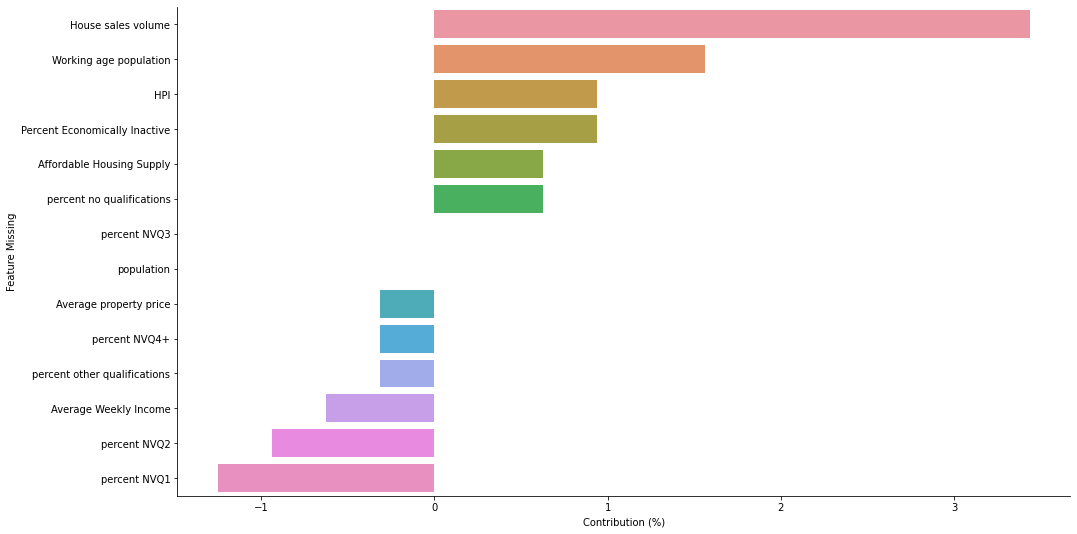

In [ ]:
#plot bar plot of contribtuion of each feature
sns.barplot( x='Contribution (%)',y='Feature Missing', data = df, orient = 'h')
sns.despine()
#plt.savefig('NB_feature_analysis.png',bbox_inches='tight')

# Random Forest Classifier

In [ ]:
df = pd.read_csv('All_Data_2011-2020.csv')
#remove comma from some numerical featueres for processing
df['Affordable Housing Supply'] = df['Affordable Housing Supply'].str.replace(',', '').astype(float)
df['Working age population'] = df['Working age population'].str.replace(',', '').astype(float)
df.head()


Unnamed: 0  Year                   Area  Crime Count  \
0           0  2011  Barking and Dagenham         28875   
1           1  2011                Barnet         40123   
2           2  2011                Bexley         20026   
3           3  2011                 Brent         45232   
4           4  2011               Bromley         33747   

   Affordable Housing Supply  Working age population  \
0                      384.0                119100.0   
1                      666.0                234200.0   
2                      357.0                146100.0   
3                      852.0                218900.0   
4                      394.0                199100.0   

   Percent Economically Inactive  percent no qualifications  percent NVQ1  \
0                           28.6                       13.9          15.6   
1                           24.7                        6.1           8.3   
2                           23.2                        8.6          18.0   
3                           30.8                       11.2           8.9   
4                           21.9                        7.5          11.3   

   percent NVQ2  percent NVQ3  percent NVQ4+  percent other qualifications  \
0          16.7          12.2           26.9                          11.5   
1          12.4          12.4           50.4                           9.4   
2          18.7          18.3           27.2                           7.0   
3          11.7          15.4           30.2                          21.0   
4          14.2          16.6           43.5                           5.3   

   House sales volume        HPI  Average property price  population  \
0                5832  74.278333             163465.0833      187029   
1               15632  73.470000             338978.0000      357538   
2               10180  76.665000             200672.0833      232774   
3                8764  70.686667             298964.4167      312245   
4               17340  73.721667             274874.5000      310554   

   Average Weekly Income  
0                  452.1  
1                  498.3  
2                  505.1  
3                  414.9  
4                  551.7

In [ ]:
#normalised features and drop crime count from normalised_df
normalized_df=(df-df.mean())/df.std()
normalized_df = normalized_df.drop('Crime Count', 1) 
normalized_df

Affordable Housing Supply Area  Average Weekly Income  \
0                     0.200790  NaN              -1.318285   
1                     1.171397  NaN              -0.726181   
2                     0.107860  NaN              -0.639031   
3                     1.811584  NaN              -1.795044   
4                     0.235209  NaN              -0.041801   
..                         ...  ...                    ...   
315                  -0.787026  NaN              -0.149456   
316                   1.646374  NaN               1.738356   
317                   0.699861  NaN               0.555430   
318                   0.335023  NaN               2.532955   
319                  -0.102094  NaN               1.903684   

     Average property price       HPI  House sales volume  \
0                 -1.381952 -1.420997           -1.623465   
1                 -0.554713 -1.462786            0.838624   
2                 -1.206585 -1.297612           -0.531102   
3                 -0.743308 -1.606678           -0.886848   
4                 -0.856850 -1.449775            1.267731   
..                      ...       ...                 ...   
315               -0.367262  1.105685           -0.782335   
316                0.044239  0.655570           -0.174350   
317               -0.025627  1.626065           -0.803439   
318                0.723385  0.434347            1.066744   
319                2.380396 -0.170344           -1.276763   

     Percent Economically Inactive  Unnamed: 0  Working age population  \
0                         1.385199   -1.723947               -1.577766   
1                         0.467372   -1.713138                1.246289   
2                         0.114361   -1.702330               -0.915303   
3                         1.902949   -1.691521                0.870894   
4                        -0.191582   -1.680713                0.385087   
..                             ...         ...                     ...   
315                      -1.250614    1.680713               -1.251442   
316                      -0.379854    1.691521                1.295361   
317                      -0.544593    1.702330                0.161813   
318                      -2.333180    1.713138                1.344432   
319                       0.161429    1.723947               -0.292097   

         Year  percent NVQ1  percent NVQ2  percent NVQ3  percent NVQ4+  \
0   -1.564249      2.447235      1.437277     -0.391356      -2.199356   
1   -1.564249      0.168287      0.296870     -0.319855      -0.048481   
2   -1.564249      3.196479      1.967699      1.789422      -2.171898   
3   -1.564249      0.355598      0.111223      0.752659      -1.897318   
4   -1.564249      1.104841      0.774250      1.181665      -0.680014   
..        ...           ...           ...           ...            ...   
315  1.564249     -0.487301      0.111223      0.252152       0.363389   
316  1.564249     -0.737049     -1.586127     -0.820361       0.994923   
317  1.564249      0.386816     -0.021383     -0.141103       0.546442   
318  1.564249     -1.455073     -1.214832     -1.392369       1.983410   
319  1.564249     -1.736040     -2.302196      0.109151       1.315266   

     percent no qualifications  percent other qualifications  population  
0                     2.355829                      1.130254   -1.425267  
1                    -0.393832                      0.414188    1.489764  
2                     0.487470                     -0.404172   -0.643208  
3                     1.404023                      4.369596    0.715432  
4                     0.099697                     -0.983844    0.686523  
..                         ...                           ...         ...  
315                  -0.323327                     -1.052040   -1.071754  
316                   0.593226                     -0.199582    1.052635  
317                  -0.957865                     -1.154335    0.111856  

In [ ]:
"""
Split crime count according to low, average and high classification in accordance
to 1 standard devtion above and below the mean.
"""
crime = df['Crime Count']
s = (np.std(crime))
m = np.mean(crime)
m, s  

low_bound = m - s
high_bound = m + s

df.loc[df['Crime Count'] <= low_bound, 'Crime Group'] = 'Low'
df.loc[df['Crime Count'] > low_bound, 'Crime Group'] = 'Average'
df.loc[df['Crime Count'] >= high_bound, 'Crime Group'] = 'High'

print(df['Crime Group'].head() )
print("mean = ", m)
low_bound, high_bound

0    Average
1    Average
2        Low
3       High
4    Average
Name: Crime Group, dtype: object
mean =  32863.2


(20716.289219990947, 45010.11078000905)

[Text(0.5, 1.0, 'plot of Crime and year')]

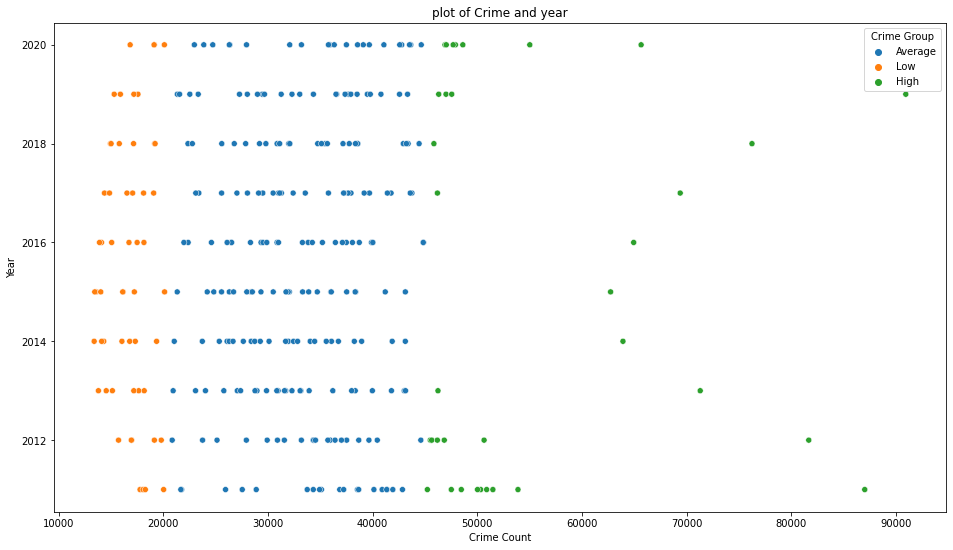

In [ ]:
sns.scatterplot(data = df, x = 'Crime Count', y = 'Year', hue = 'Crime Group').set(title='plot of Crime and year')

In [ ]:
#assign number to crime group to allow classification
df.loc[df['Crime Group'] == 'Low', 'Crime Count'] = 1
df.loc[df['Crime Group'] == 'Average', 'Crime Count'] = 2
df.loc[df['Crime Group'] == 'High', 'Crime Count'] = 3
df[['Crime Count','Crime Group']].head()

Crime Count Crime Group
0            2     Average
1            2     Average
2            1         Low
3            3        High
4            2     Average

In [ ]:
#drop year and area from normalsied_df
normalized_df = normalized_df.drop('Year', 1)
normalized_df = normalized_df.drop('Area', 1)
normalized_df.columns

Index(['Affordable Housing Supply', 'Average Weekly Income',
       'Average property price', 'HPI', 'House sales volume',
       'Percent Economically Inactive', 'Unnamed: 0', 'Working age population',
       'percent NVQ1', 'percent NVQ2', 'percent NVQ3', 'percent NVQ4+',
       'percent no qualifications', 'percent other qualifications',
       'population'],
      dtype='object')

In [ ]:
"""
Because the random forest accuracy changes each time it is run, the algorithm
is run 10 times and the mean accuracy of each of these runs is calculated.
Accuracys determined by 10-fold  cross validation.
"""

X = normalized_df.values
y = df['Crime Count'].values

RF_acc_list = []

for i in range(10):
    
    from sklearn.ensemble import RandomForestClassifier
    RF = RandomForestClassifier()

    from sklearn.model_selection import cross_val_score
    RF_acc = cross_val_score(RF, X, y, cv=10, scoring = 'accuracy')


    #print("mean accuracy of RF classifier:", RF_acc.mean())
    t = RF_acc.mean()
    RF_acc_list.append(t)

RF_acc_list = np.asarray(RF_acc_list)
avg_acc = RF_acc_list.mean()
print("average accuracy after 10 runs of 10-fold cross validation:",avg_acc)

average accuracy after 10 runs of 10-fold cross validation: 0.8612500000000001


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

RF_acc = cross_val_score(RF, X, y, cv=10, scoring = 'accuracy')
RF_f1 = cross_val_score(RF, X, y, cv=10, scoring = 'f1_weighted')
RF_roc_ovr = cross_val_score(RF, X, y, cv=10, scoring = 'roc_auc_ovr_weighted')
RF_roc_ovo = cross_val_score(RF, X, y, cv=10, scoring = 'roc_auc_ovo_weighted')


print("accuracy array:", RF_acc)
print("mean accuracy of Random Forest classifier:", RF_acc.mean())
print("\n")
print("f1 score array:", RF_f1)
print("mean f1 score of Random Forest classifier:", RF_f1.mean())
print("\n")
print("Random Forest ROC-AUC (ovr) array:", RF_roc_ovr)
print("mean ROC-AUC (ovr) of Random Forest classifier:", RF_roc_ovr.mean())
print("\n")
print("Random Forest ROC-AUC (ovo) array:", RF_roc_ovo)
print("mean ROC-AUC (ovo) of Random Forest classifier:", RF_roc_ovo.mean())
print("\n")


accuracy array: [0.59375 0.9375  0.9375  0.90625 0.90625 0.90625 0.90625 0.875   0.875
 0.9375 ]
mean accuracy of Random Forest classifier: 0.878125


f1 score array: [0.60868798 0.90641026 0.8622449  0.8622449  0.8809949  0.8809949
 0.8809949  0.85013889 0.85089962 0.88273601]
mean f1 score of Random Forest classifier: 0.8466347253062064


Random Forest ROC-AUC (ovr) array: [0.88426079 0.96443966 0.96683429 0.9454023  1.         0.98499504
 0.96949405 0.99138145 0.90321181 0.99508929]
mean ROC-AUC (ovr) of Random Forest classifier: 0.9605108666477202


Random Forest ROC-AUC (ovo) array: [0.89187047 0.95255888 0.97350543 0.91168478 0.97248641 0.95643682
 0.97134001 0.9954144  0.91231318 0.98961293]
mean ROC-AUC (ovo) of Random Forest classifier: 0.9527223320158102




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=71601d15-5610-497a-962a-b18ff738f3e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>